In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rnd
import plotly.express as px 

from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')
%config InlineBackend.figure_format = 'retina'
plt.style.use('tableau-colorblind10')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# /kaggle/input/playground-series-s3e11/sample_submission.csv
# /kaggle/input/playground-series-s3e11/train.csv
# /kaggle/input/playground-series-s3e11/test.csv

### Dataset Description
- store_sales(in millions) - store_sales(in million dollars)
- unit_sales(in millions) - unit_sales(in millions) in stores Quantity
- Total_children - TOTAL CHILDREN IN HOME
- avg_cars_at home(approx) - avg_cars_at home(approx) 
- Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
- Gross_weight - gross_weight OF ITEM
- Recyclable_package - FOOD ITEM IS recyclable_package
- Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
- Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
- Store_sqft - STORE AREA AVAILABLE IN SQFT
- Coffee_bar - COFFEE BAR available in store
- Video_store - VIDEO STORE/gaming store available
- Salad_bar - SALAD BAR available in store
- Prepared_food - food prepared available in store
- Florist - flower shelves available in store
- Cost - COST ON ACQUIRING A CUSTOMERS in dollars
- #### Source: https://www.kaggle.com/datasets/gauravduttakiit/media-campaign-cost-prediction 

### Looking into the data

In [4]:
df_train = pd.read_csv('/kaggle/input/playground-series-s3e11/train.csv')
df_train

id  store_sales(in millions)  unit_sales(in millions)  \
0            0                      8.61                      3.0   
1            1                      5.00                      2.0   
2            2                     14.08                      4.0   
3            3                      4.02                      3.0   
4            4                      2.13                      3.0   
...        ...                       ...                      ...   
360331  360331                      7.60                      4.0   
360332  360332                     14.44                      4.0   
360333  360333                     10.74                      3.0   
360334  360334                     11.04                      3.0   
360335  360335                      5.30                      2.0   

        total_children  num_children_at_home  avg_cars_at home(approx).1  \
0                  2.0                   2.0                         2.0   
1                  4.0                   0.0                         3.0   
2                  0.0                   0.0                         3.0   
3                  5.0                   0.0                         0.0   
4                  5.0                   0.0                         3.0   
...                ...                   ...                         ...   
360331             5.0                   5.0                         3.0   
360332             4.0                   0.0                         4.0   
360333             0.0                   0.0                         2.0   
360334             1.0                   0.0                         3.0   
360335             2.0                   0.0                         2.0   

        gross_weight  recyclable_package  low_fat  units_per_case  store_sqft  \
0              10.30                 1.0      0.0            32.0     36509.0   
1               6.66                 1.0      0.0             1.0     28206.0   
2              21.30                 1.0      0.0            26.0     21215.0   
3              14.80                 0.0      1.0            36.0     21215.0   
4              17.00                 1.0      1.0            20.0     27694.0   
...              ...                 ...      ...             ...         ...   
360331         13.50                 1.0      0.0            33.0     30268.0   
360332         18.80                 1.0      1.0            18.0     20319.0   
360333         11.30                 1.0      0.0            35.0     30584.0   
360334         10.20                 0.0      1.0            14.0     30584.0   
360335         10.80                 0.0      0.0            21.0     33858.0   

        coffee_bar  video_store  salad_bar  prepared_food  florist    cost  
0              0.0          0.0        0.0            0.0      0.0   62.09  
1              1.0          0.0        0.0            0.0      0.0  121.80  
2              1.0          0.0        0.0            0.0      0.0   83.51  
3              1.0          0.0        0.0            0.0      0.0   66.78  
4              1.0          1.0        1.0            1.0      1.0  111.51  
...            ...          ...        ...            ...      ...     ...  
360331         0.0          0.0        0.0            0.0      0.0  133.42  
360332         0.0          0.0        0.0            0.0      0.0   81.85  
360333         1.0          1.0        1.0            1.0      1.0   87.07  
360334         1.0          1.0        1.0            1.0      1.0  146.72  
360335         1.0          0.0        1.0            1.0      1.0  122.47  

[360336 rows x 17 columns]

In [5]:
df_train.head()

id  store_sales(in millions)  unit_sales(in millions)  total_children  \
0   0                      8.61                      3.0             2.0   
1   1                      5.00                      2.0             4.0   
2   2                     14.08                      4.0             0.0   
3   3                      4.02                      3.0             5.0   
4   4                      2.13                      3.0             5.0   

   num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                   2.0                         2.0         10.30   
1                   0.0                         3.0          6.66   
2                   0.0                         3.0         21.30   
3                   0.0                         0.0         14.80   
4                   0.0                         3.0         17.00   

   recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                 1.0      0.0            32.0     36509.0         0.0   
1                 1.0      0.0             1.0     28206.0         1.0   
2                 1.0      0.0            26.0     21215.0         1.0   
3                 0.0      1.0            36.0     21215.0         1.0   
4                 1.0      1.0            20.0     27694.0         1.0   

   video_store  salad_bar  prepared_food  florist    cost  
0          0.0        0.0            0.0      0.0   62.09  
1          0.0        0.0            0.0      0.0  121.80  
2          0.0        0.0            0.0      0.0   83.51  
3          0.0        0.0            0.0      0.0   66.78  
4          1.0        1.0            1.0      1.0  111.51

In [6]:
df_train.tail()

id  store_sales(in millions)  unit_sales(in millions)  \
360331  360331                      7.60                      4.0   
360332  360332                     14.44                      4.0   
360333  360333                     10.74                      3.0   
360334  360334                     11.04                      3.0   
360335  360335                      5.30                      2.0   

        total_children  num_children_at_home  avg_cars_at home(approx).1  \
360331             5.0                   5.0                         3.0   
360332             4.0                   0.0                         4.0   
360333             0.0                   0.0                         2.0   
360334             1.0                   0.0                         3.0   
360335             2.0                   0.0                         2.0   

        gross_weight  recyclable_package  low_fat  units_per_case  store_sqft  \
360331          13.5                 1.0      0.0            33.0     30268.0   
360332          18.8                 1.0      1.0            18.0     20319.0   
360333          11.3                 1.0      0.0            35.0     30584.0   
360334          10.2                 0.0      1.0            14.0     30584.0   
360335          10.8                 0.0      0.0            21.0     33858.0   

        coffee_bar  video_store  salad_bar  prepared_food  florist    cost  
360331         0.0          0.0        0.0            0.0      0.0  133.42  
360332         0.0          0.0        0.0            0.0      0.0   81.85  
360333         1.0          1.0        1.0            1.0      1.0   87.07  
360334         1.0          1.0        1.0            1.0      1.0  146.72  
360335         1.0          0.0        1.0            1.0      1.0  122.47

In [7]:
df_train.sample(10)

id  store_sales(in millions)  unit_sales(in millions)  \
28835    28835                      5.80                      2.0   
135744  135744                      3.60                      4.0   
289877  289877                      2.65                      5.0   
357826  357826                      6.36                      3.0   
118930  118930                      1.82                      1.0   
102306  102306                     11.67                      3.0   
113128  113128                     11.56                      4.0   
254390  254390                      1.53                      3.0   
115807  115807                      5.22                      3.0   
9817      9817                      5.34                      3.0   

        total_children  num_children_at_home  avg_cars_at home(approx).1  \
28835              2.0                   0.0                         3.0   
135744             2.0                   0.0                         2.0   
289877             2.0                   2.0                         1.0   
357826             3.0                   3.0                         3.0   
118930             4.0                   4.0                         2.0   
102306             0.0                   0.0                         1.0   
113128             3.0                   0.0                         0.0   
254390             1.0                   0.0                         1.0   
115807             2.0                   2.0                         3.0   
9817               4.0                   3.0                         3.0   

        gross_weight  recyclable_package  low_fat  units_per_case  store_sqft  \
28835          21.60                 1.0      1.0            17.0     21215.0   
135744         10.90                 1.0      0.0             9.0     36509.0   
289877         20.70                 1.0      0.0             3.0     23112.0   
357826         15.60                 1.0      0.0             2.0     38382.0   
118930         11.60                 0.0      0.0            33.0     22478.0   
102306          7.74                 0.0      0.0             6.0     23112.0   
113128         21.30                 0.0      1.0            23.0     23688.0   
254390          8.25                 1.0      1.0            33.0     39696.0   
115807         10.80                 1.0      0.0            28.0     30797.0   
9817           11.60                 1.0      0.0            31.0     34791.0   

        coffee_bar  video_store  salad_bar  prepared_food  florist    cost  
28835          1.0          0.0        0.0            0.0      0.0   90.58  
135744         0.0          0.0        0.0            0.0      0.0   96.18  
289877         1.0          1.0        1.0            1.0      1.0   60.87  
357826         0.0          0.0        0.0            0.0      0.0  148.62  
118930         1.0          0.0        0.0            0.0      0.0  136.43  
102306         1.0          0.0        0.0            0.0      0.0  144.54  
113128         1.0          1.0        1.0            1.0      1.0  106.16  
254390         0.0          0.0        1.0            1.0      0.0   68.15  
115807         1.0          1.0        1.0            1.0      1.0   92.57  
9817           0.0          0.0        1.0            1.0      0.0  144.31

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

- There are no categorical columns at all.

In [9]:
df_train.describe().style.bar()

- Boolean columns (min is 0, max is 1)
    1. Recyclable_package
    2. Low fat
    3. Coffee_bar
    4. Video_store
    5. Salad_bar
    6. Prepared_food
    7. Florist
- All of these have mean around 50%, the yes and no are perfectly balanced.

In [10]:
len(df_train.describe().columns) == len(df_train.columns)

True

### Checking missing/NaN/duplicate values

In [11]:
for i in df_train.columns:
    print("Column -->", i,"\n")
    print("NaN values: ", df_train[i].isnull().sum())
    print("Duplicate values: ", df_train[i].duplicated().sum())
    print("Frequency: ", df_train[i].value_counts())
    print("\n")

Column --> id 

NaN values:  0
Duplicate values:  0
Frequency:  0         1
240221    1
240229    1
240228    1
240227    1
         ..
120110    1
120109    1
120108    1
120107    1
360335    1
Name: id, Length: 360336, dtype: int64


Column --> store_sales(in millions) 

NaN values:  0
Duplicate values:  359292
Frequency:  5.04     2373
5.40     1988
7.41     1919
7.95     1874
5.52     1831
         ... 
3.79        1
5.45        1
16.15       1
2.02        1
5.77        1
Name: store_sales(in millions), Length: 1044, dtype: int64


Column --> unit_sales(in millions) 

NaN values:  0
Duplicate values:  360330
Frequency:  3.0    175556
4.0     94999
2.0     77240
1.0      6765
5.0      5745
6.0        31
Name: unit_sales(in millions), dtype: int64


Column --> total_children 

NaN values:  0
Duplicate values:  360330
Frequency:  1.0    74857
2.0    73902
3.0    71524
4.0    70134
0.0    36441
5.0    33478
Name: total_children, dtype: int64


Column --> num_children_at_home 

NaN val

- NaNs are 0 in all the columns.
- Below columns have very few unique values
    - unit_sales (6)
    - total_children (6)
    - num_children_at_home (6)
    - avg_cars_at home (5)
    - recyclable_package (2)
    - low_fat (2)
    - coffee_bar (2)
    - video_store (2)
    - salad_bar (2)
    - prepared_food (2)
    - florist (2)
- id is a unique column (used for submission). But not required for training the model.

In [12]:
df_train.drop(columns = ['id'], axis = 1, inplace = True)

In [13]:
df_train

store_sales(in millions)  unit_sales(in millions)  total_children  \
0                           8.61                      3.0             2.0   
1                           5.00                      2.0             4.0   
2                          14.08                      4.0             0.0   
3                           4.02                      3.0             5.0   
4                           2.13                      3.0             5.0   
...                          ...                      ...             ...   
360331                      7.60                      4.0             5.0   
360332                     14.44                      4.0             4.0   
360333                     10.74                      3.0             0.0   
360334                     11.04                      3.0             1.0   
360335                      5.30                      2.0             2.0   

        num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                        2.0                         2.0         10.30   
1                        0.0                         3.0          6.66   
2                        0.0                         3.0         21.30   
3                        0.0                         0.0         14.80   
4                        0.0                         3.0         17.00   
...                      ...                         ...           ...   
360331                   5.0                         3.0         13.50   
360332                   0.0                         4.0         18.80   
360333                   0.0                         2.0         11.30   
360334                   0.0                         3.0         10.20   
360335                   0.0                         2.0         10.80   

        recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                      1.0      0.0            32.0     36509.0         0.0   
1                      1.0      0.0             1.0     28206.0         1.0   
2                      1.0      0.0            26.0     21215.0         1.0   
3                      0.0      1.0            36.0     21215.0         1.0   
4                      1.0      1.0            20.0     27694.0         1.0   
...                    ...      ...             ...         ...         ...   
360331                 1.0      0.0            33.0     30268.0         0.0   
360332                 1.0      1.0            18.0     20319.0         0.0   
360333                 1.0      0.0            35.0     30584.0         1.0   
360334                 0.0      1.0            14.0     30584.0         1.0   
360335                 0.0      0.0            21.0     33858.0         1.0   

        video_store  salad_bar  prepared_food  florist    cost  
0               0.0        0.0            0.0      0.0   62.09  
1               0.0        0.0            0.0      0.0  121.80  
2               0.0        0.0            0.0      0.0   83.51  
3               0.0        0.0            0.0      0.0   66.78  
4               1.0        1.0            1.0      1.0  111.51  
...             ...        ...            ...      ...     ...  
360331          0.0        0.0            0.0      0.0  133.42  
360332          0.0        0.0            0.0      0.0   81.85  
360333          1.0        1.0            1.0      1.0   87.07  
360334          1.0        1.0            1.0      1.0  146.72  
360335          0.0        1.0            1.0      1.0  122.47  

[360336 rows x 16 columns]

In [14]:
df_train.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost'],
      dtype='object')

In [15]:
boolean_columns = ['recyclable_package', 'low_fat', 'coffee_bar', 
                   'video_store', 'salad_bar', 'prepared_food', 'florist'] 
numerical_columns = df_train.columns.difference(boolean_columns)

In [16]:
print("Numerical columns -->", numerical_columns.to_list())
print("\nBoolean columns -->", boolean_columns)

Numerical columns --> ['avg_cars_at home(approx).1', 'cost', 'gross_weight', 'num_children_at_home', 'store_sales(in millions)', 'store_sqft', 'total_children', 'unit_sales(in millions)', 'units_per_case']

Boolean columns --> ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']


In [17]:
df_train[numerical_columns]

avg_cars_at home(approx).1    cost  gross_weight  \
0                              2.0   62.09         10.30   
1                              3.0  121.80          6.66   
2                              3.0   83.51         21.30   
3                              0.0   66.78         14.80   
4                              3.0  111.51         17.00   
...                            ...     ...           ...   
360331                         3.0  133.42         13.50   
360332                         4.0   81.85         18.80   
360333                         2.0   87.07         11.30   
360334                         3.0  146.72         10.20   
360335                         2.0  122.47         10.80   

        num_children_at_home  store_sales(in millions)  store_sqft  \
0                        2.0                      8.61     36509.0   
1                        0.0                      5.00     28206.0   
2                        0.0                     14.08     21215.0   
3                        0.0                      4.02     21215.0   
4                        0.0                      2.13     27694.0   
...                      ...                       ...         ...   
360331                   5.0                      7.60     30268.0   
360332                   0.0                     14.44     20319.0   
360333                   0.0                     10.74     30584.0   
360334                   0.0                     11.04     30584.0   
360335                   0.0                      5.30     33858.0   

        total_children  unit_sales(in millions)  units_per_case  
0                  2.0                      3.0            32.0  
1                  4.0                      2.0             1.0  
2                  0.0                      4.0            26.0  
3                  5.0                      3.0            36.0  
4                  5.0                      3.0            20.0  
...                ...                      ...             ...  
360331             5.0                      4.0            33.0  
360332             4.0                      4.0            18.0  
360333             0.0                      3.0            35.0  
360334             1.0                      3.0            14.0  
360335             2.0                      2.0            21.0  

[360336 rows x 9 columns]

In [18]:
df_train[boolean_columns]

recyclable_package  low_fat  coffee_bar  video_store  salad_bar  \
0                      1.0      0.0         0.0          0.0        0.0   
1                      1.0      0.0         1.0          0.0        0.0   
2                      1.0      0.0         1.0          0.0        0.0   
3                      0.0      1.0         1.0          0.0        0.0   
4                      1.0      1.0         1.0          1.0        1.0   
...                    ...      ...         ...          ...        ...   
360331                 1.0      0.0         0.0          0.0        0.0   
360332                 1.0      1.0         0.0          0.0        0.0   
360333                 1.0      0.0         1.0          1.0        1.0   
360334                 0.0      1.0         1.0          1.0        1.0   
360335                 0.0      0.0         1.0          0.0        1.0   

        prepared_food  florist  
0                 0.0      0.0  
1                 0.0      0.0  
2                 0.0      0.0  
3                 0.0      0.0  
4                 1.0      1.0  
...               ...      ...  
360331            0.0      0.0  
360332            0.0      0.0  
360333            1.0      1.0  
360334            1.0      1.0  
360335            1.0      1.0  

[360336 rows x 7 columns]

In [19]:
len(numerical_columns.union(boolean_columns)) == len(df_train.columns)

True

- We did not miss any columns 

In [20]:
numerical_columns

Index(['avg_cars_at home(approx).1', 'cost', 'gross_weight',
       'num_children_at_home', 'store_sales(in millions)', 'store_sqft',
       'total_children', 'unit_sales(in millions)', 'units_per_case'],
      dtype='object')

### Column-wise distributions

#### gross_weight

In [21]:
df_train['gross_weight'].describe()

count    360336.000000
mean         13.822071
std           4.614792
min           6.000000
25%           9.710000
50%          13.600000
75%          17.700000
max          21.900000
Name: gross_weight, dtype: float64

<AxesSubplot:>

Text(0.5, 1.0, 'Box plot for gross_weight')

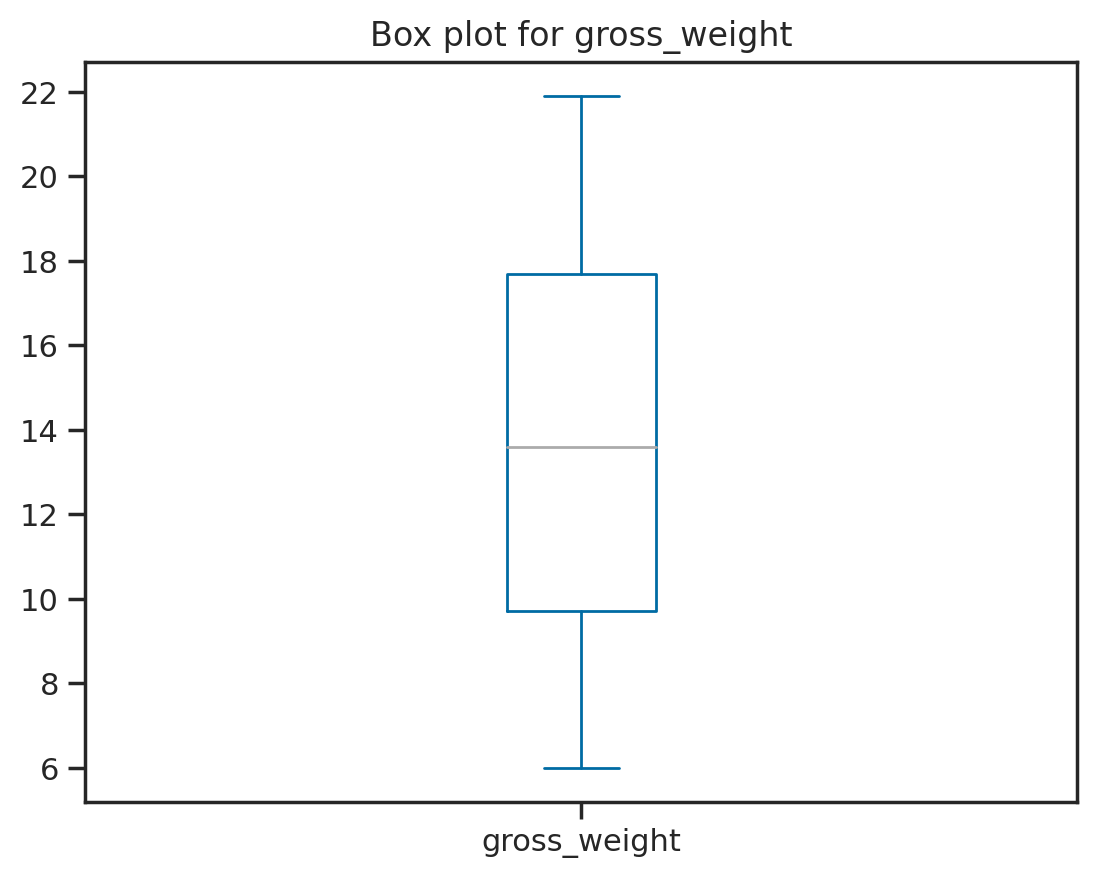

In [22]:
df_train['gross_weight'].plot.box()
plt.title("Box plot for {0}".format('gross_weight'))

- There aren't any outliers

<AxesSubplot:ylabel='gross_weight'>

Text(0.5, 1.0, 'Violin plot for gross_weight')

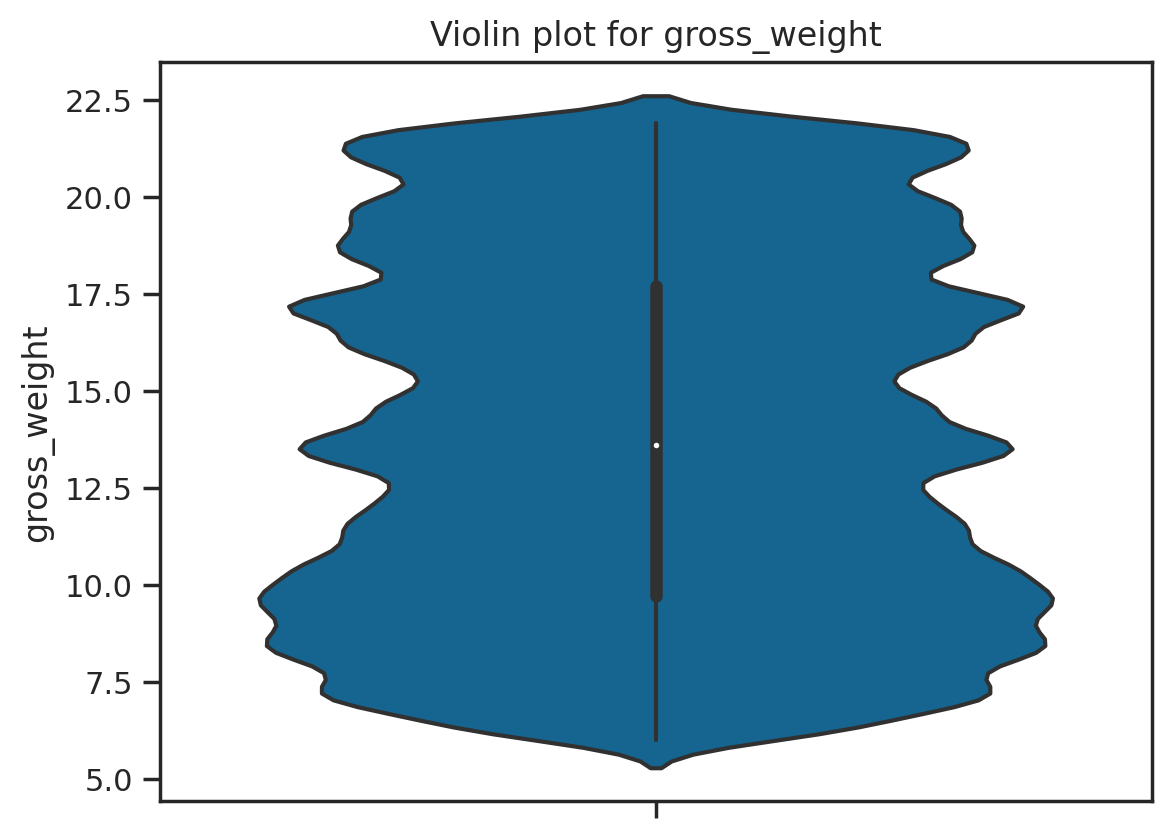

In [23]:
sns.violinplot(data = df_train, y = 'gross_weight')
plt.title("Violin plot for {0}".format('gross_weight'))

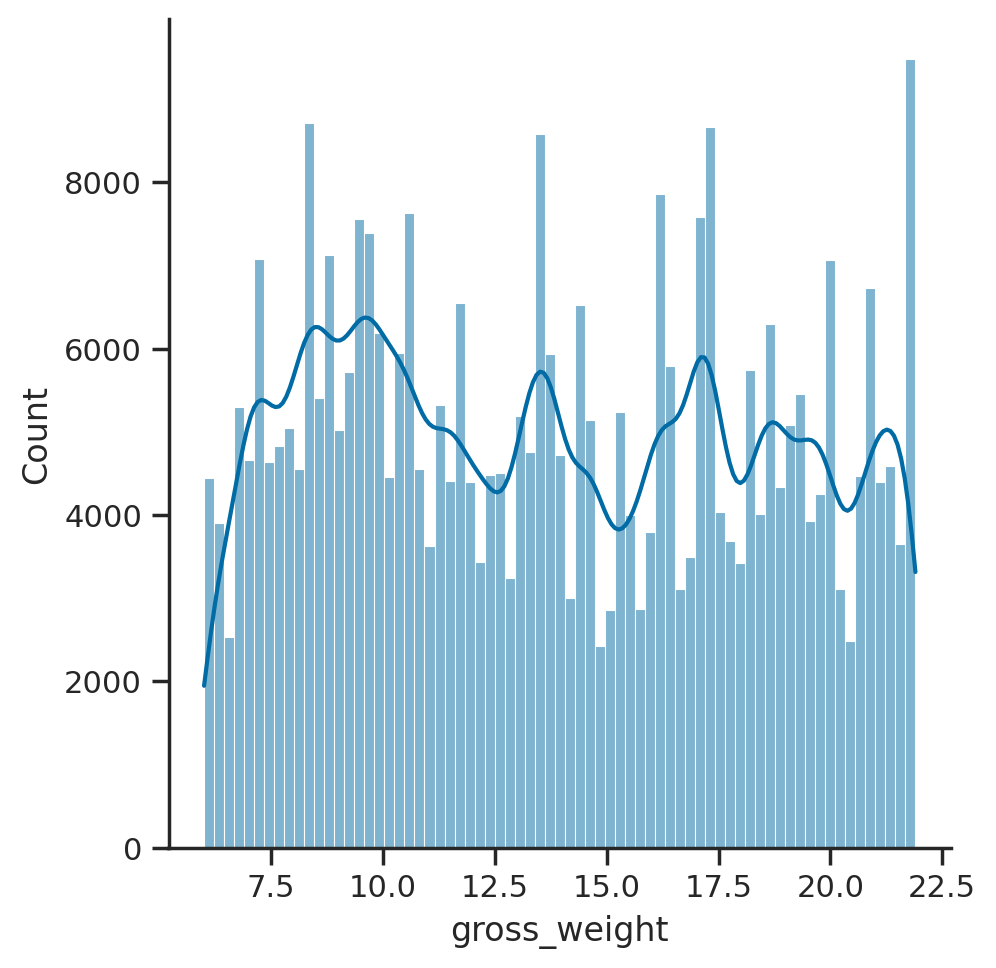

In [24]:
sns.displot(data = df_train, x = 'gross_weight', kde = True)

- It is not following any nice bell shaped curve


#### store_sales(in millions)

In [25]:
df_train['store_sales(in millions)'].describe()

count    360336.000000
mean          6.337376
std           3.307980
min           0.510000
25%           3.720000
50%           5.780000
75%           8.400000
max          22.920000
Name: store_sales(in millions), dtype: float64

<AxesSubplot:>

Text(0.5, 1.0, 'Box plot for store_sales(in millions)')

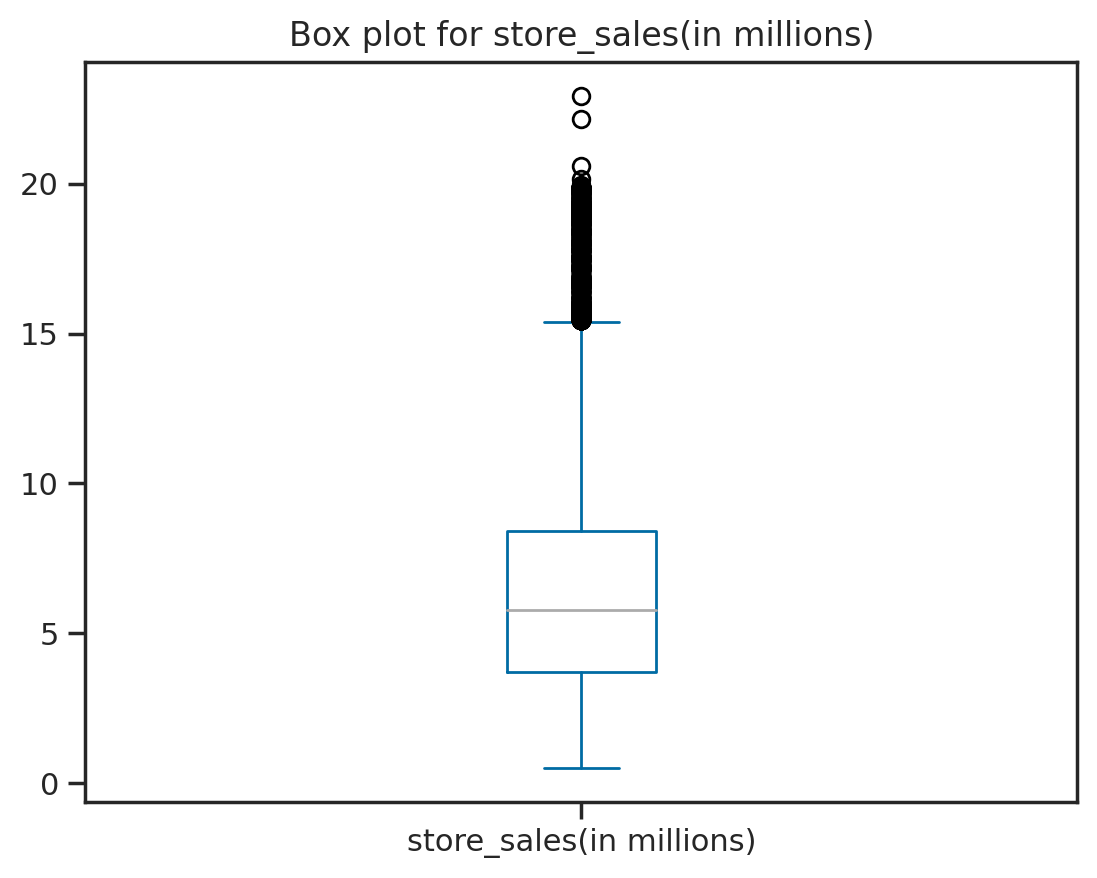

In [26]:
df_train['store_sales(in millions)'].plot.box()
plt.title("Box plot for {0}".format('store_sales(in millions)'))

<AxesSubplot:ylabel='store_sales(in millions)'>

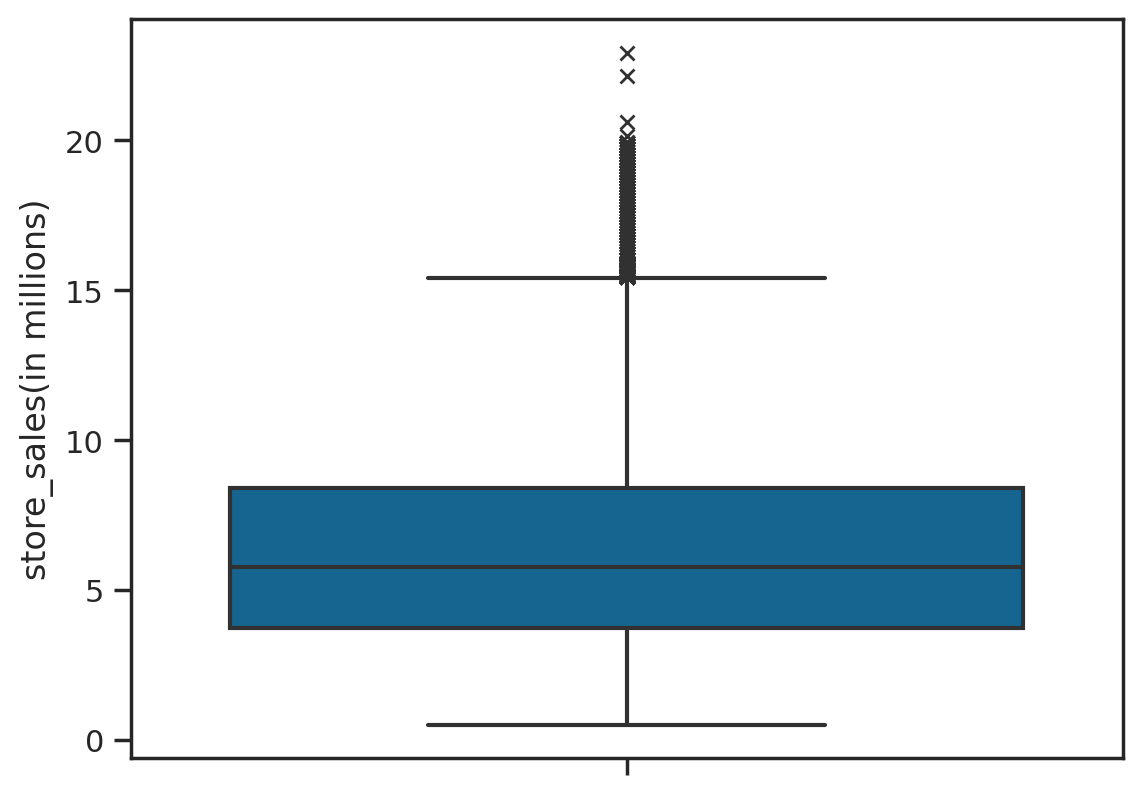

In [27]:
sns.boxplot(data = df_train, y = 'store_sales(in millions)', flierprops={"marker": "x"})

- We see good number of outliers after 15 ish

In [28]:
from matplotlib.cbook import boxplot_stats

In [29]:
boxplot_stats(df_train['store_sales(in millions)'])

[{'mean': 6.337376337640426,
  'iqr': 4.68,
  'cilo': 5.767759710802749,
  'cihi': 5.7922402891972515,
  'whishi': 15.4,
  'whislo': 0.51,
  'fliers': array([17.3 , 15.52, 17.15, ..., 16.65, 15.72, 15.64]),
  'q1': 3.72,
  'med': 5.78,
  'q3': 8.4}]

In [30]:
df_train['store_sales(in millions)'].describe()

count    360336.000000
mean          6.337376
std           3.307980
min           0.510000
25%           3.720000
50%           5.780000
75%           8.400000
max          22.920000
Name: store_sales(in millions), dtype: float64

<AxesSubplot:ylabel='store_sales(in millions)'>

Text(0.5, 1.0, 'Violin plot for store_sales(in millions)')

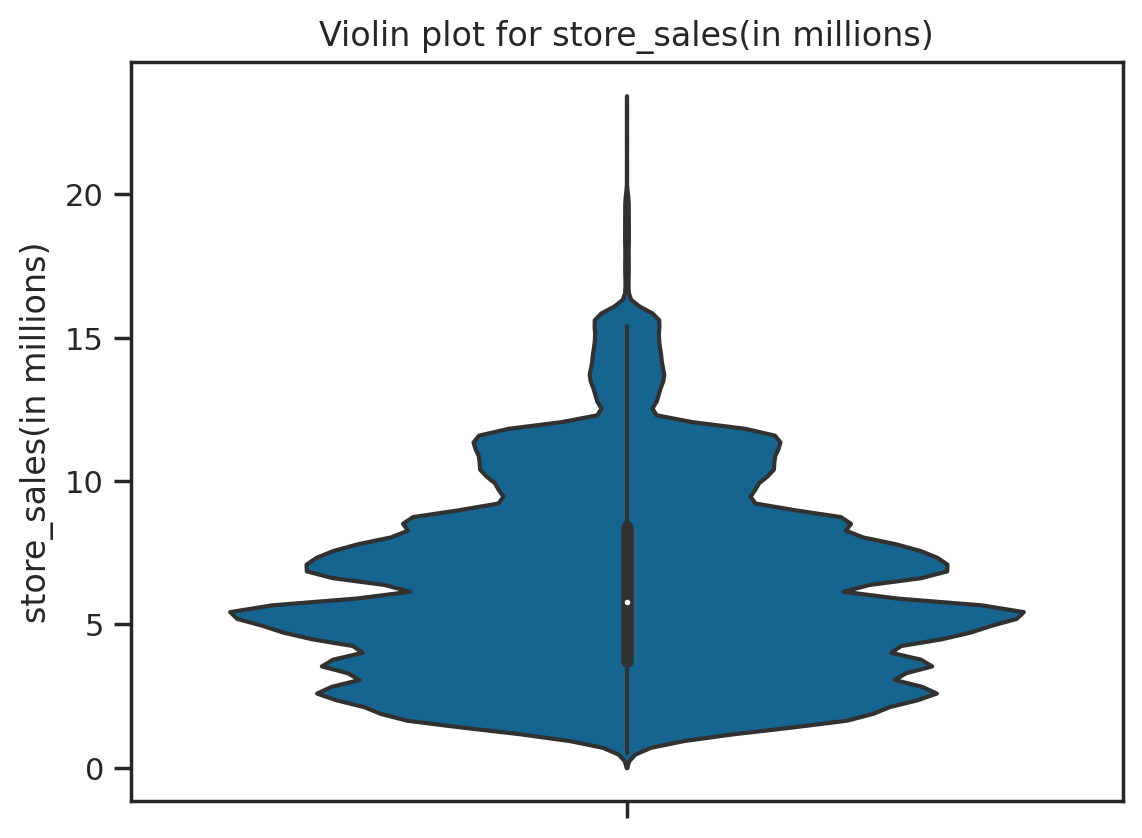

In [31]:
sns.violinplot(data = df_train, y = 'store_sales(in millions)')
plt.title("Violin plot for {0}".format('store_sales(in millions)'))

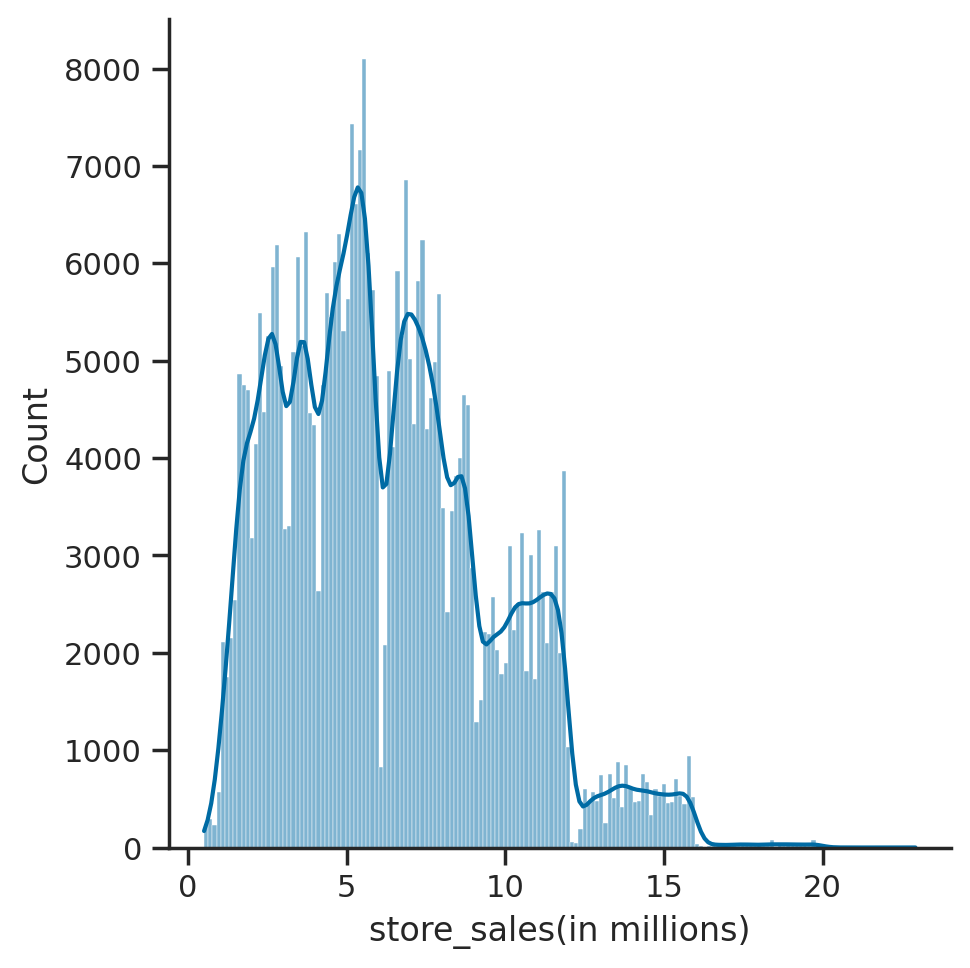

In [32]:
sns.displot(data = df_train, x = 'store_sales(in millions)', kde = True)

<AxesSubplot:xlabel='store_sales(in millions)', ylabel='Count'>

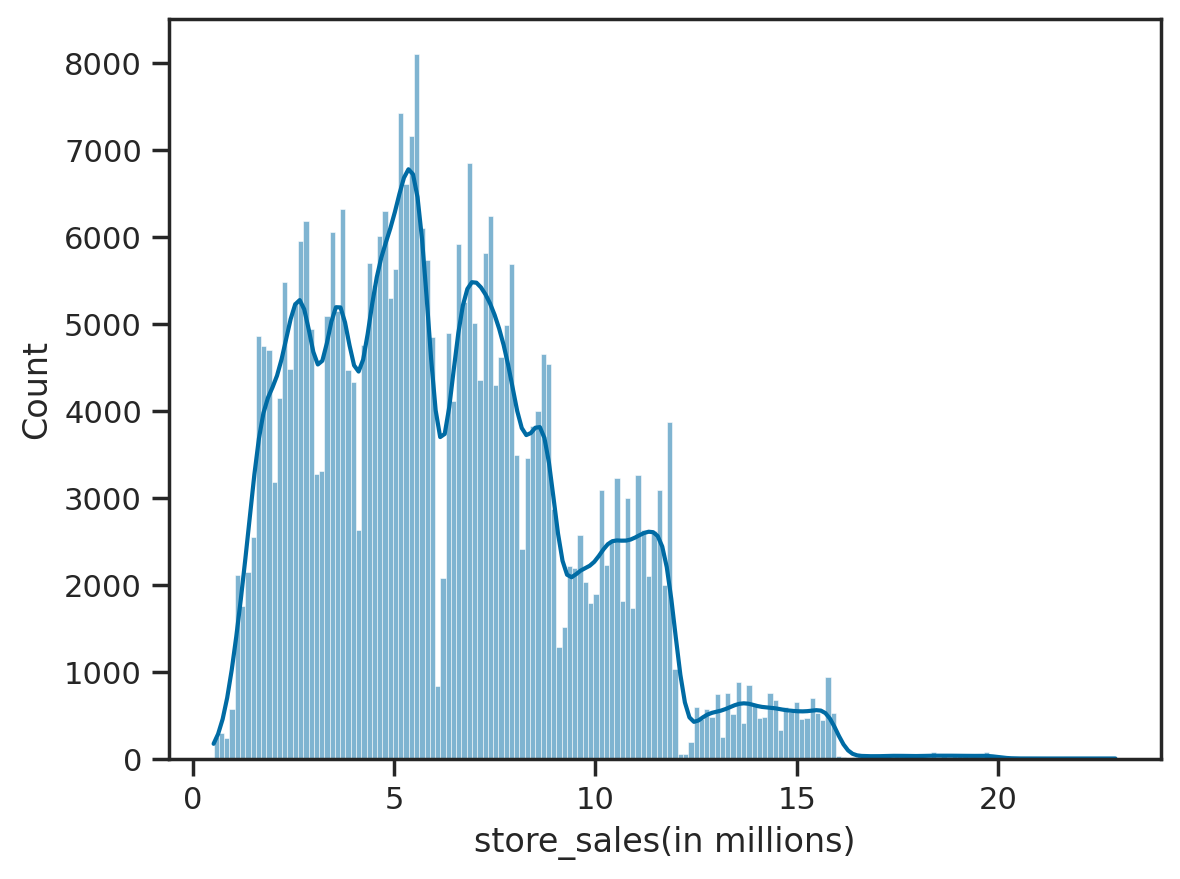

In [33]:
sns.histplot(data = df_train, x = 'store_sales(in millions)', kde = True)

In [34]:
type(boxplot_stats(df_train['store_sales(in millions)']))
boxplot_stats(df_train['store_sales(in millions)'])[0]['whishi']

list

15.4

In [35]:
# Get exact whisker value by boxplot_stats(df_train['store_sales(in millions)'])

df_train[df_train['store_sales(in millions)'] > boxplot_stats(df_train['store_sales(in millions)'])[0]['whishi']]

store_sales(in millions)  unit_sales(in millions)  total_children  \
85                         17.30                      5.0             3.0   
145                        15.52                      4.0             4.0   
326                        17.15                      5.0             5.0   
402                        19.75                      5.0             5.0   
458                        17.10                      5.0             4.0   
...                          ...                      ...             ...   
359572                     15.68                      4.0             0.0   
359638                     15.72                      4.0             5.0   
359845                     16.65                      5.0             5.0   
359848                     15.72                      4.0             3.0   
360185                     15.64                      4.0             1.0   

        num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
85                       0.0                         4.0         16.50   
145                      4.0                         1.0         10.60   
326                      2.0                         1.0          8.41   
402                      0.0                         4.0          9.95   
458                      0.0                         2.0          6.04   
...                      ...                         ...           ...   
359572                   0.0                         1.0         15.20   
359638                   5.0                         3.0         21.90   
359845                   0.0                         3.0         11.20   
359848                   0.0                         3.0         15.70   
360185                   0.0                         2.0         21.90   

        recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
85                     1.0      0.0            17.0     23598.0         0.0   
145                    0.0      1.0            28.0     23593.0         0.0   
326                    0.0      0.0            15.0     20319.0         0.0   
402                    0.0      0.0            36.0     23112.0         1.0   
458                    1.0      1.0            27.0     23759.0         1.0   
...                    ...      ...             ...         ...         ...   
359572                 1.0      0.0            20.0     30797.0         1.0   
359638                 1.0      0.0            27.0     23598.0         0.0   
359845                 0.0      1.0            18.0     33858.0         1.0   
359848                 1.0      0.0             2.0     39696.0         0.0   
360185                 1.0      0.0            33.0     23598.0         0.0   

        video_store  salad_bar  prepared_food  florist    cost  
85              0.0        0.0            0.0      1.0  143.04  
145             0.0        0.0            0.0      0.0  142.09  
326             0.0        0.0            0.0      0.0  140.19  
402             1.0        1.0            1.0      1.0  144.54  
458             0.0        1.0            1.0      1.0   65.68  
...             ...        ...            ...      ...     ...  
359572          1.0        1.0            1.0      1.0   98.81  
359638          0.0        0.0            0.0      1.0  101.84  
359845          0.0        1.0            1.0      1.0  138.81  
359848          0.0        1.0            1.0      0.0  129.50  
360185          0.0        0.0            0.0      1.0  131.81  

[3442 rows x 16 columns]

In [36]:
# We have 3442 rows
df_train.shape[0]
(3442/df_train.shape[0])*100

360336

0.9552195728431242

In [37]:
# If we remove all the 3442 values, it is ~1% of the data. There is no harm in doing it.

df_train = df_train[~(df_train['store_sales(in millions)'] >= boxplot_stats(df_train['store_sales(in millions)'])[0]['whishi'])]
df_train

store_sales(in millions)  unit_sales(in millions)  total_children  \
0                           8.61                      3.0             2.0   
1                           5.00                      2.0             4.0   
2                          14.08                      4.0             0.0   
3                           4.02                      3.0             5.0   
4                           2.13                      3.0             5.0   
...                          ...                      ...             ...   
360331                      7.60                      4.0             5.0   
360332                     14.44                      4.0             4.0   
360333                     10.74                      3.0             0.0   
360334                     11.04                      3.0             1.0   
360335                      5.30                      2.0             2.0   

        num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                        2.0                         2.0         10.30   
1                        0.0                         3.0          6.66   
2                        0.0                         3.0         21.30   
3                        0.0                         0.0         14.80   
4                        0.0                         3.0         17.00   
...                      ...                         ...           ...   
360331                   5.0                         3.0         13.50   
360332                   0.0                         4.0         18.80   
360333                   0.0                         2.0         11.30   
360334                   0.0                         3.0         10.20   
360335                   0.0                         2.0         10.80   

        recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                      1.0      0.0            32.0     36509.0         0.0   
1                      1.0      0.0             1.0     28206.0         1.0   
2                      1.0      0.0            26.0     21215.0         1.0   
3                      0.0      1.0            36.0     21215.0         1.0   
4                      1.0      1.0            20.0     27694.0         1.0   
...                    ...      ...             ...         ...         ...   
360331                 1.0      0.0            33.0     30268.0         0.0   
360332                 1.0      1.0            18.0     20319.0         0.0   
360333                 1.0      0.0            35.0     30584.0         1.0   
360334                 0.0      1.0            14.0     30584.0         1.0   
360335                 0.0      0.0            21.0     33858.0         1.0   

        video_store  salad_bar  prepared_food  florist    cost  
0               0.0        0.0            0.0      0.0   62.09  
1               0.0        0.0            0.0      0.0  121.80  
2               0.0        0.0            0.0      0.0   83.51  
3               0.0        0.0            0.0      0.0   66.78  
4               1.0        1.0            1.0      1.0  111.51  
...             ...        ...            ...      ...     ...  
360331          0.0        0.0            0.0      0.0  133.42  
360332          0.0        0.0            0.0      0.0   81.85  
360333          1.0        1.0            1.0      1.0   87.07  
360334          1.0        1.0            1.0      1.0  146.72  
360335          0.0        1.0            1.0      1.0  122.47  

[356721 rows x 16 columns]

<AxesSubplot:xlabel='store_sales(in millions)', ylabel='Count'>

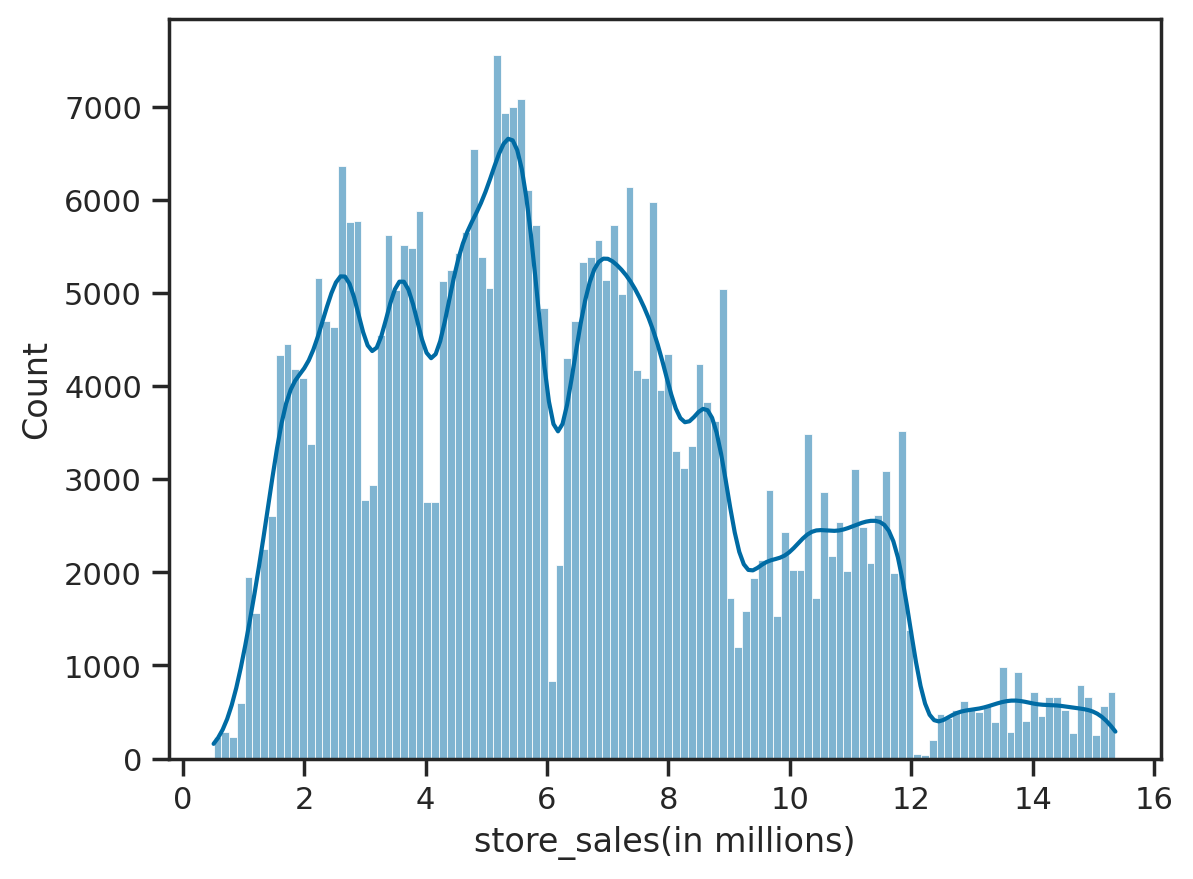

In [38]:
# Now plot the values

sns.histplot(data = df_train, x = 'store_sales(in millions)', kde = True)

<AxesSubplot:ylabel='store_sales(in millions)'>

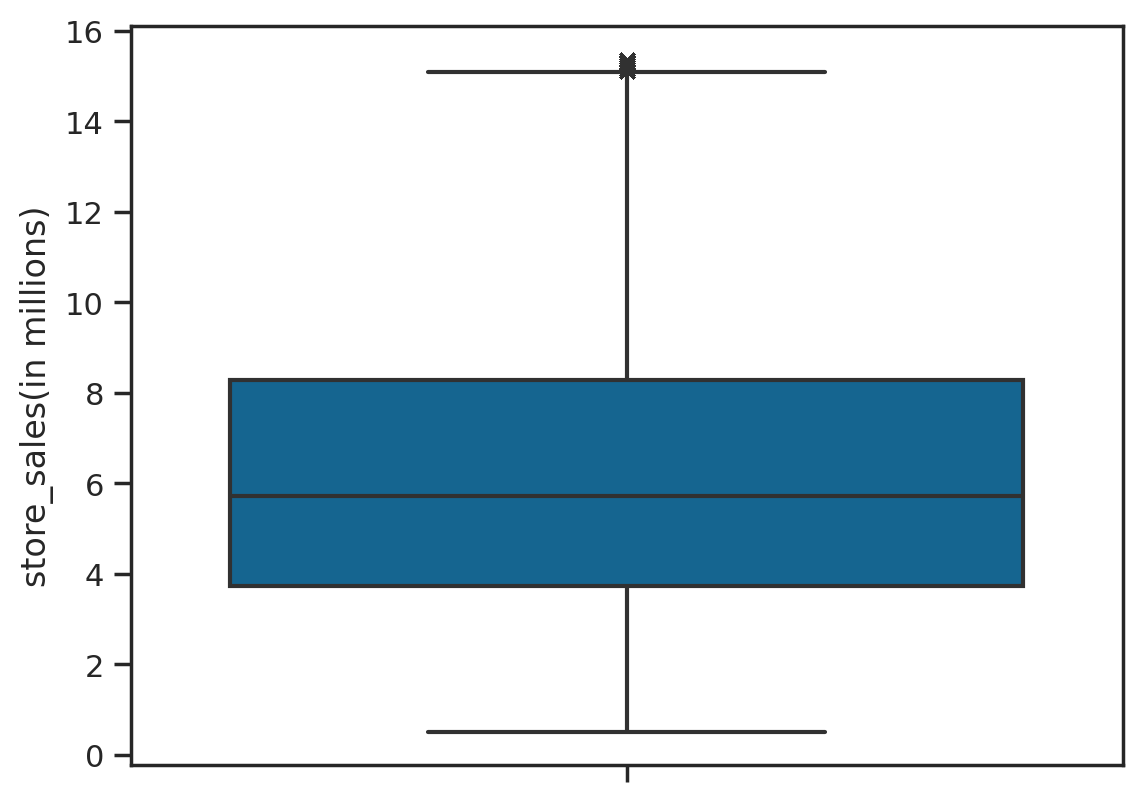

In [39]:
sns.boxplot(data = df_train, y = 'store_sales(in millions)', flierprops={"marker": "x"})

Now we don't see any outliers

#### avg_cars_at home(approx).1

In [40]:
df_train['avg_cars_at home(approx).1'].describe()

count    356721.000000
mean          2.203184
std           1.084356
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: avg_cars_at home(approx).1, dtype: float64

<AxesSubplot:>

Text(0.5, 1.0, 'Box plot for avg_cars_at home(approx).1')

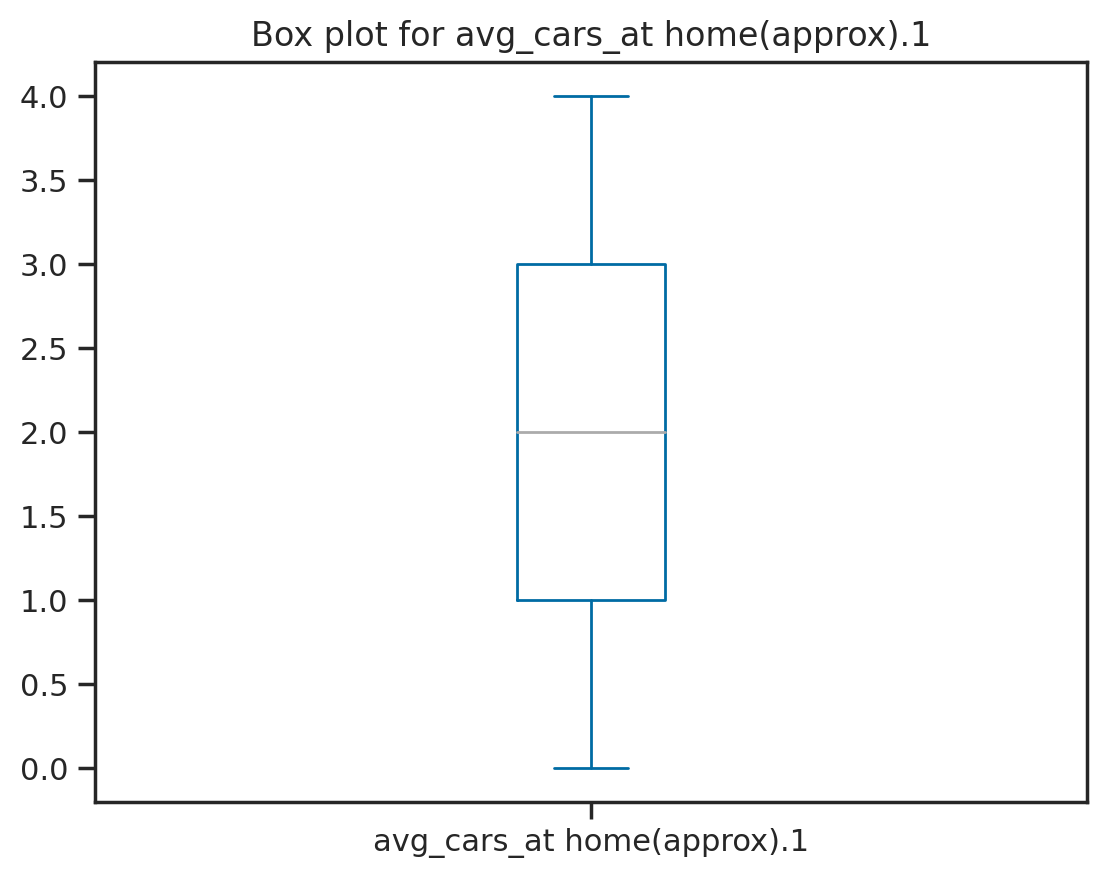

In [41]:
df_train['avg_cars_at home(approx).1'].plot.box()
plt.title("Box plot for {0}".format('avg_cars_at home(approx).1'))

<AxesSubplot:xlabel='avg_cars_at home(approx).1', ylabel='count'>

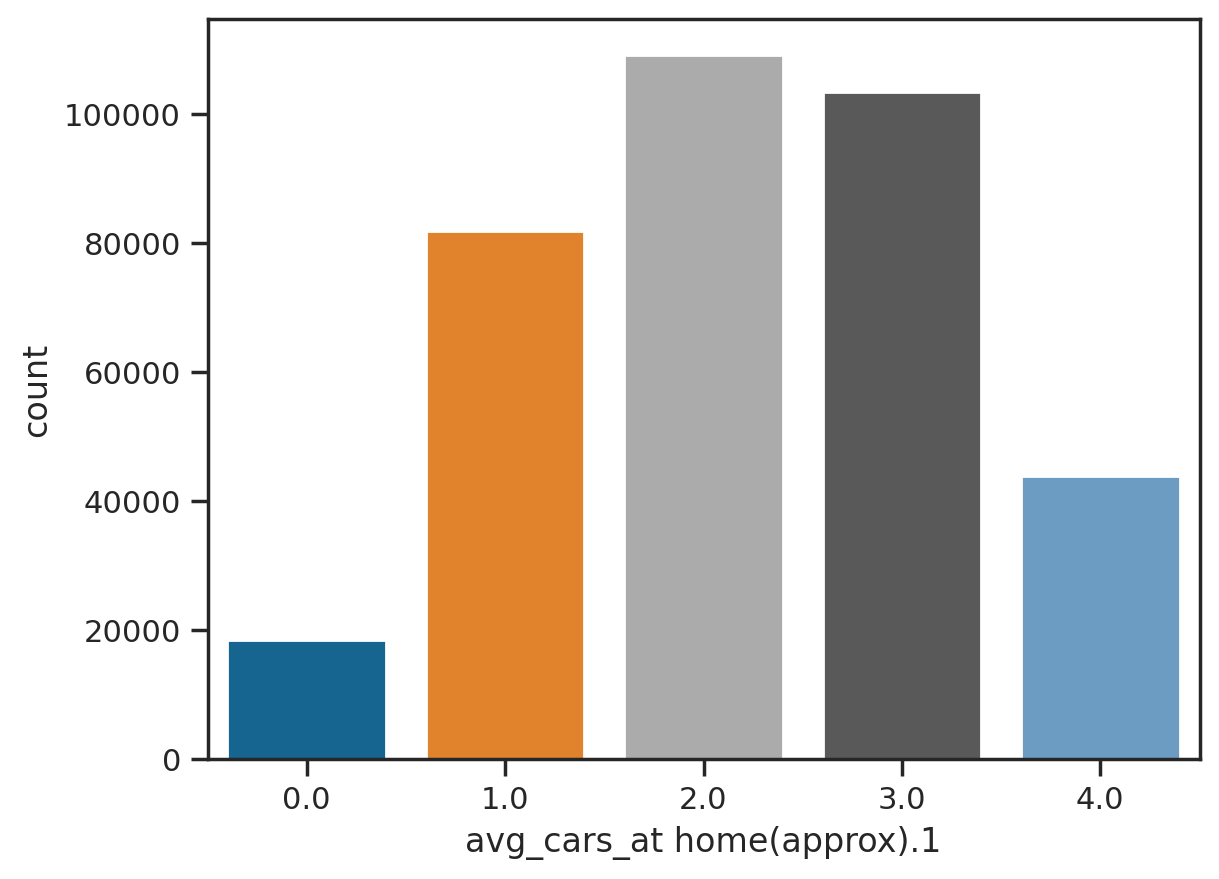

In [42]:
sns.countplot(data = df_train, x = 'avg_cars_at home(approx).1')

- Here we have only 5 unique values

In [43]:
df_train['avg_cars_at home(approx).1'].value_counts()

2.0    109258
3.0    103361
1.0     81867
4.0     43864
0.0     18371
Name: avg_cars_at home(approx).1, dtype: int64

In [44]:
pd.crosstab(df_train['avg_cars_at home(approx).1'], df_train['cost'])

cost                        50.79   51.00   51.12   51.16   51.27   51.47   \
avg_cars_at home(approx).1                                                   
0.0                            112      54     171       2      87      59   
1.0                            204     334     757     100     208     169   
2.0                            406     466     677      69     263     181   
3.0                            330     411     701     123     121     320   
4.0                            174     166     149      24      63      46   

cost                        52.06   52.42   52.77   52.97   ...  146.41  \
avg_cars_at home(approx).1                                  ...           
0.0                             42       2       1      98  ...      19   
1.0                            356      31     261     218  ...      85   
2.0                            615     107      16     319  ...     208   
3.0                            483      73     117     267  ...     351   
4.0                            181      15      62     145  ...     130   

cost                        146.72  147.17  147.18  147.35  147.82  148.62  \
avg_cars_at home(approx).1                                                   
0.0                            171      69      28     123      89      67   
1.0                            405     194      20      19     579     671   
2.0                           1505     471     673     259     916     679   
3.0                           1289     364      97     248     309     488   
4.0                             30     166     171     128     240      89   

cost                        148.87  149.08  149.75  
avg_cars_at home(approx).1                          
0.0                              4      44      12  
1.0                            221     446     166  
2.0                            166     561     209  
3.0                            527     850     134  
4.0                             40     177     317  

[5 rows x 328 columns]

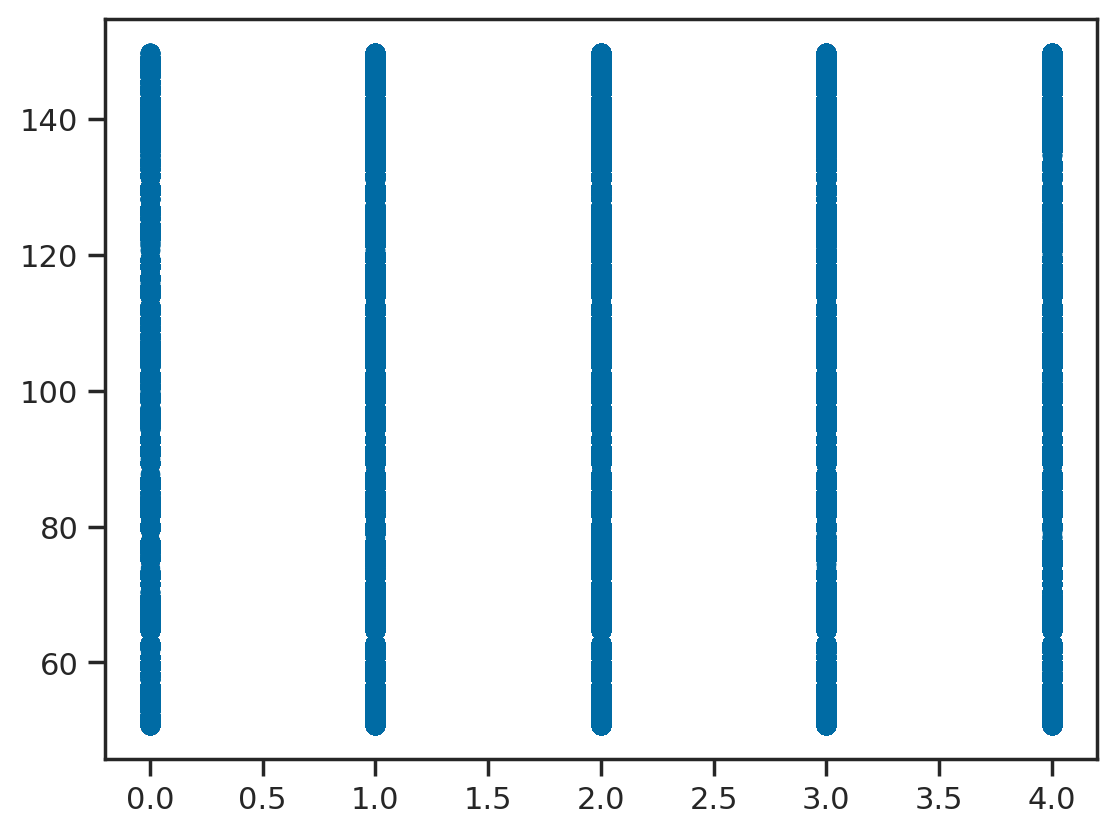

In [45]:
plt.scatter(df_train['avg_cars_at home(approx).1'], df_train['cost'])

#### store_sqft

<AxesSubplot:>

Text(0.5, 1.0, 'Box plot for store_sqft')

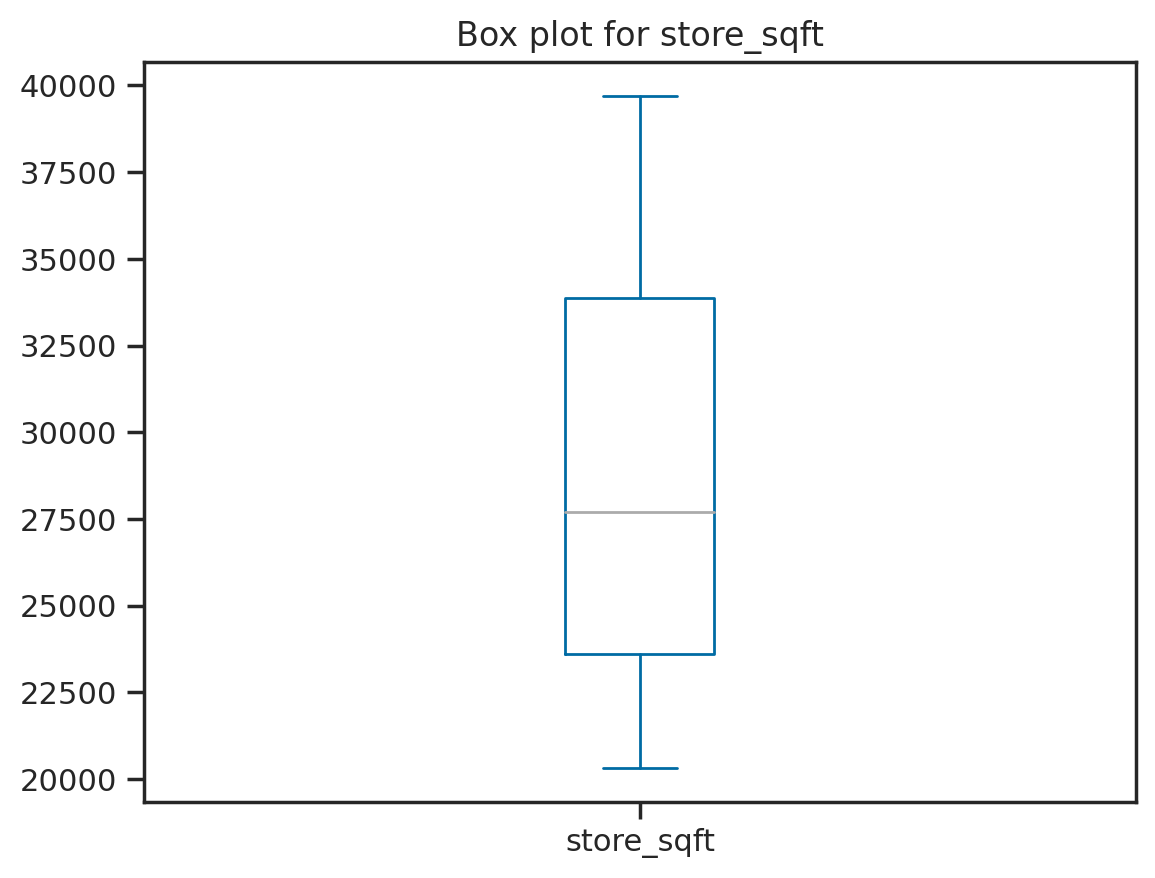

In [46]:
df_train['store_sqft'].plot.box()
plt.title("Box plot for {0}".format('store_sqft'))

<AxesSubplot:ylabel='store_sqft'>

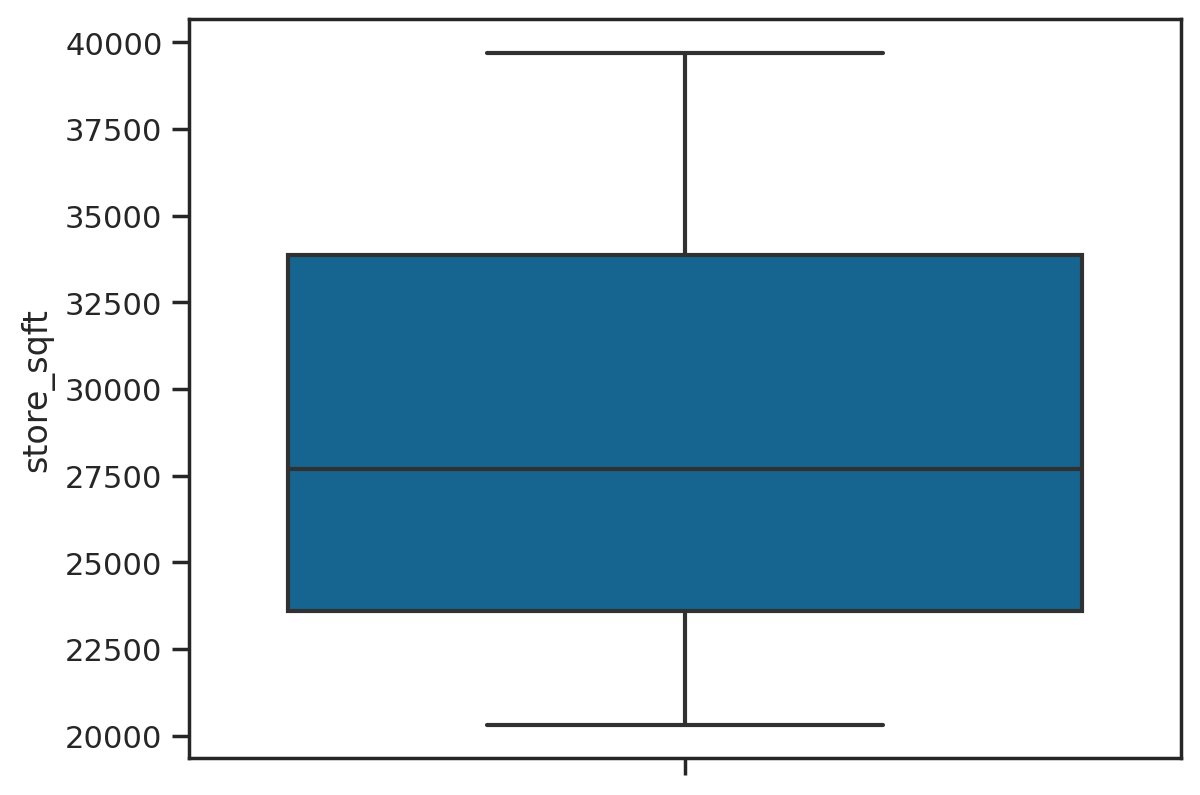

In [47]:
sns.boxplot(data = df_train, y = 'store_sqft', flierprops={"marker": "x"})

In [48]:
df_train['store_sqft'].describe()

count    356721.000000
mean      28179.196047
std        5967.920587
min       20319.000000
25%       23593.000000
50%       27694.000000
75%       33858.000000
max       39696.000000
Name: store_sqft, dtype: float64

In [49]:
boxplot_stats(df_train['store_sqft'])

[{'mean': 28179.196046770445,
  'iqr': 10265.0,
  'cilo': 27667.01674934214,
  'cihi': 27720.98325065786,
  'whishi': 39696.0,
  'whislo': 20319.0,
  'fliers': array([], dtype=float64),
  'q1': 23593.0,
  'med': 27694.0,
  'q3': 33858.0}]

<AxesSubplot:xlabel='store_sqft'>

Text(0.5, 1.0, 'Violin plot for store_sqft')

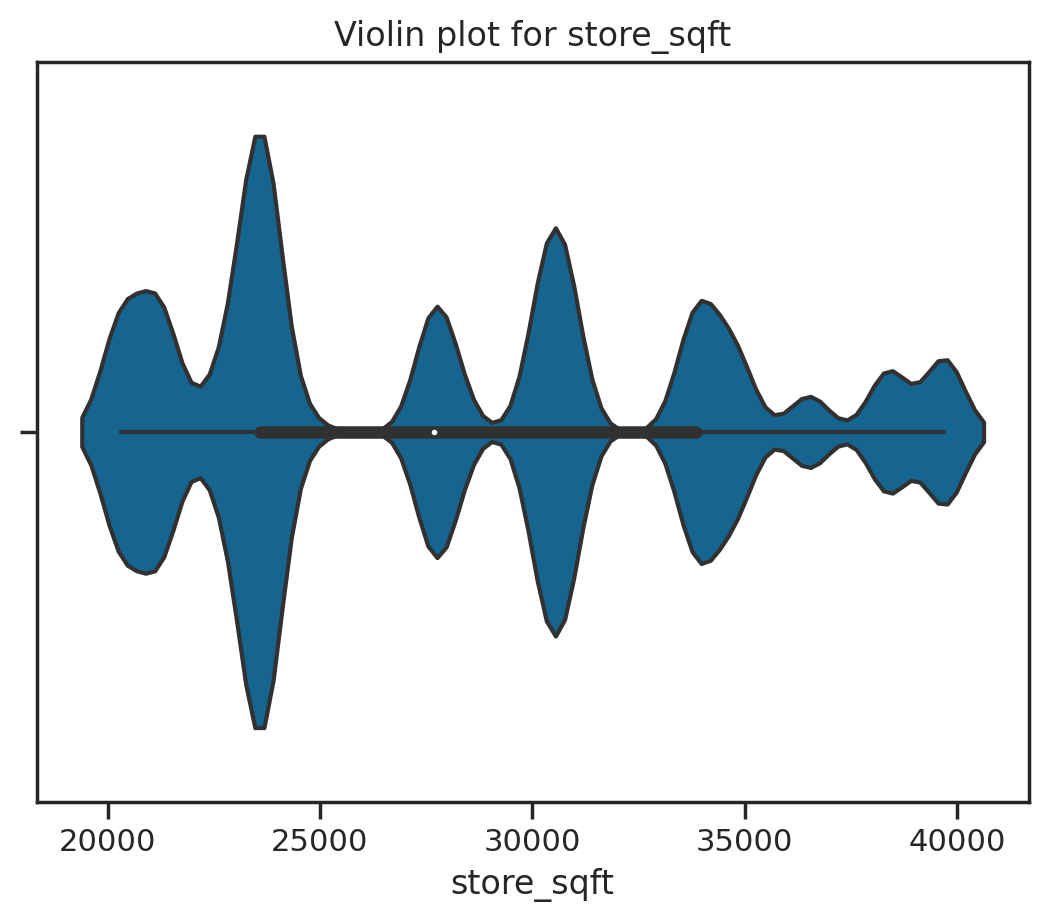

In [50]:
sns.violinplot(data = df_train, x = 'store_sqft')
plt.title("Violin plot for {0}".format('store_sqft'))

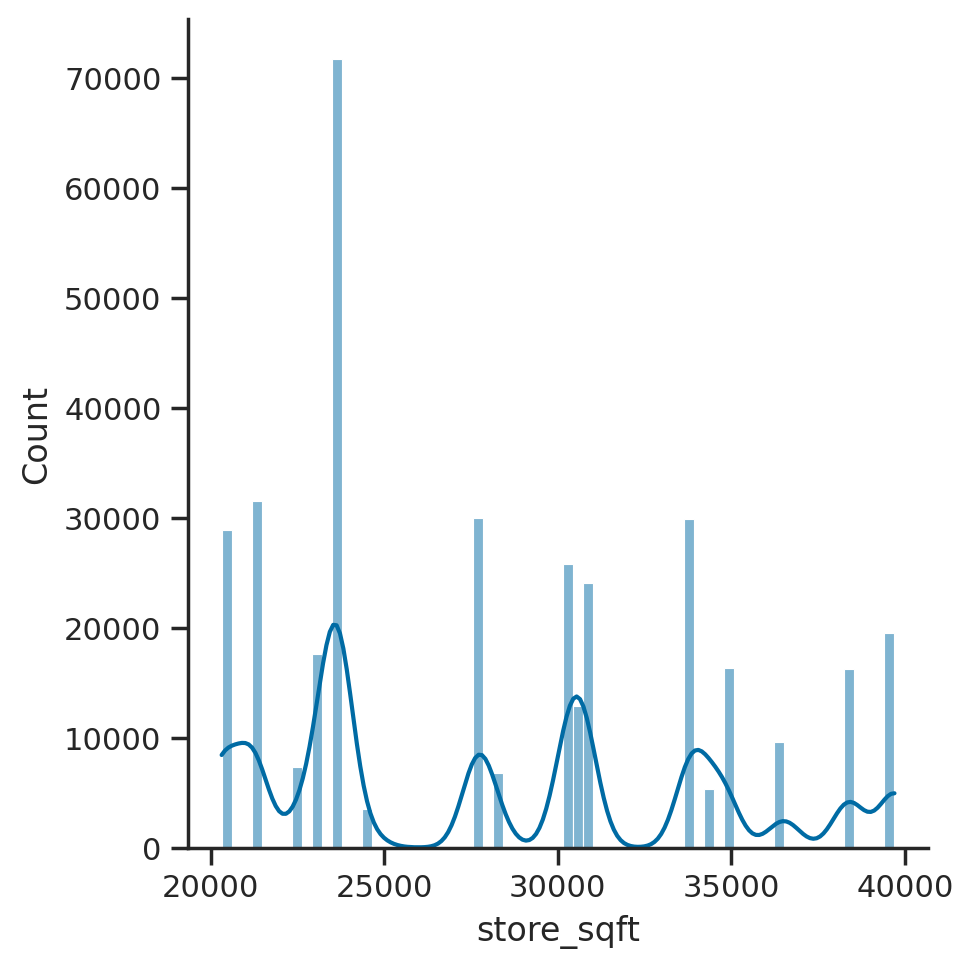

In [51]:
sns.displot(data = df_train, x = 'store_sqft', kde = True)

In [52]:
df_train['store_sqft'].unique()

array([36509., 28206., 21215., 27694., 33858., 23688., 38382., 30797.,
       20319., 23598., 23112., 22478., 30584., 39696., 23759., 34791.,
       24597., 23593., 30268., 34452.])

In [53]:
df_train['store_sqft'].value_counts()

21215.0    31488
27694.0    29972
33858.0    29902
23598.0    29294
20319.0    28902
30268.0    25740
30797.0    24034
39696.0    19490
23112.0    17580
34791.0    16330
38382.0    16250
23688.0    15887
23759.0    14771
30584.0    12882
23593.0    11755
36509.0     9606
22478.0     7307
28206.0     6774
34452.0     5274
24597.0     3483
Name: store_sqft, dtype: int64

- There are very few unique values. So, bar plot is better for this.

<AxesSubplot:xlabel='count', ylabel='store_sqft'>

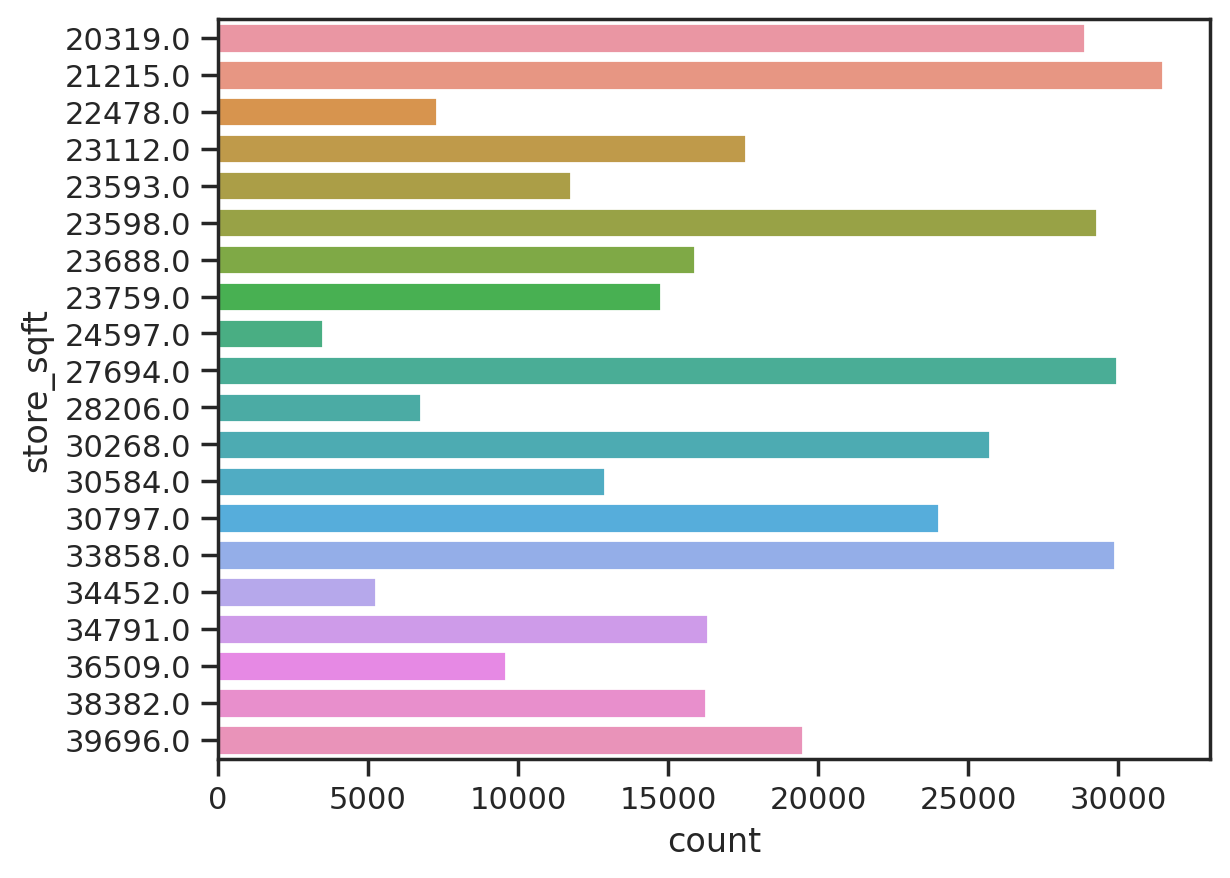

In [54]:
sns.countplot(data = df_train, y = 'store_sqft')

#### unit_sales(in millions)

<AxesSubplot:>

Text(0.5, 1.0, 'Box plot for unit_sales(in millions)')

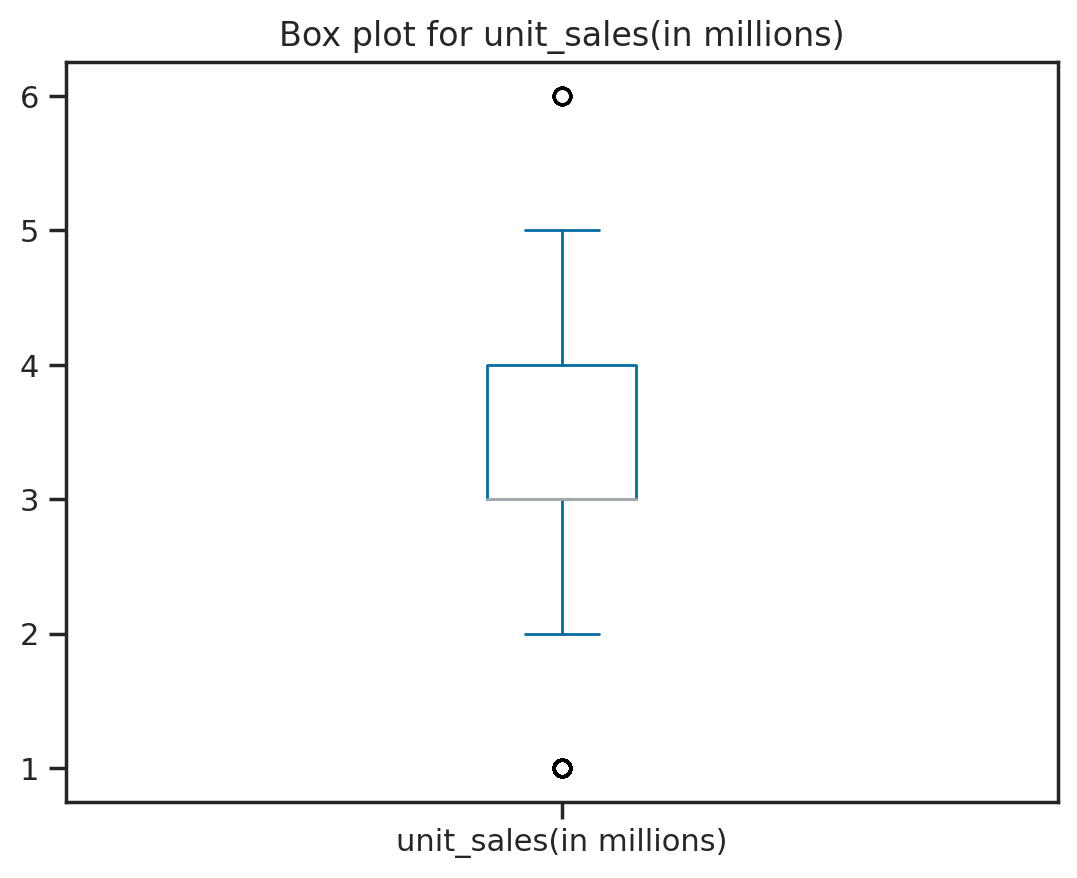

In [55]:
df_train['unit_sales(in millions)'].plot.box()
plt.title("Box plot for {0}".format('unit_sales(in millions)'))

<AxesSubplot:ylabel='unit_sales(in millions)'>

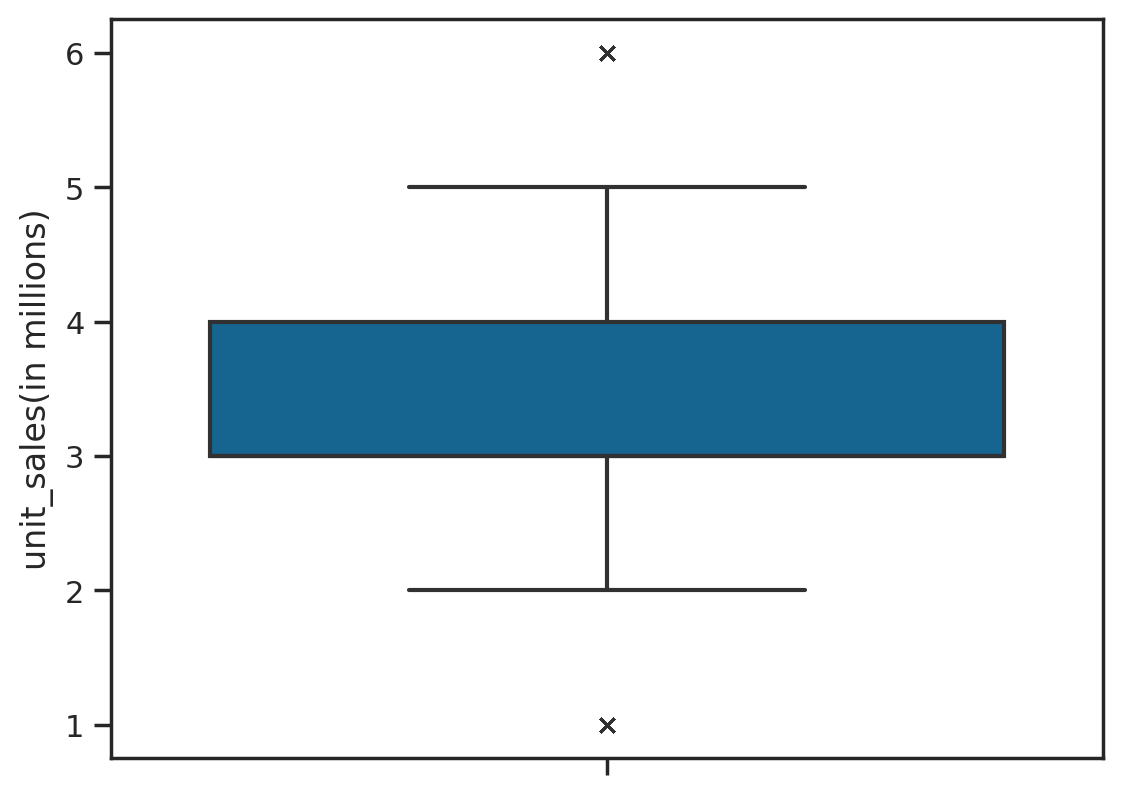

In [56]:
sns.boxplot(data = df_train, y = 'unit_sales(in millions)', flierprops={"marker": "x"})

In [57]:
boxplot_stats(df_train['unit_sales(in millions)'])

[{'mean': 3.03156248160327,
  'iqr': 1.0,
  'cilo': 2.997371334568158,
  'cihi': 3.002628665431842,
  'whishi': 5.0,
  'whislo': 2.0,
  'fliers': array([1., 1., 1., ..., 6., 6., 6.]),
  'q1': 3.0,
  'med': 3.0,
  'q3': 4.0}]

In [58]:
df_train['unit_sales(in millions)'].describe()

count    356721.000000
mean          3.031562
std           0.777670
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: unit_sales(in millions), dtype: float64

<AxesSubplot:xlabel='unit_sales(in millions)'>

Text(0.5, 1.0, 'Violin plot for unit_sales(in millions)')

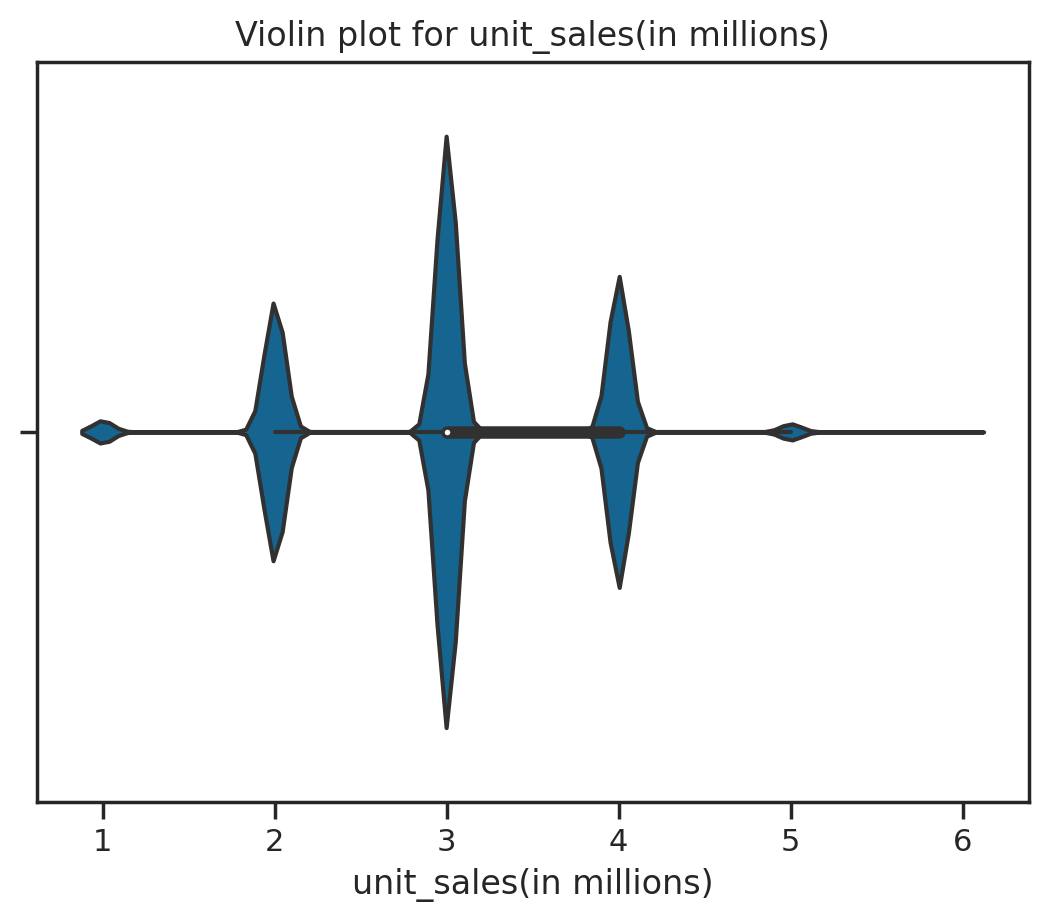

In [59]:
sns.violinplot(data = df_train, x = 'unit_sales(in millions)')
plt.title("Violin plot for {0}".format('unit_sales(in millions)'))

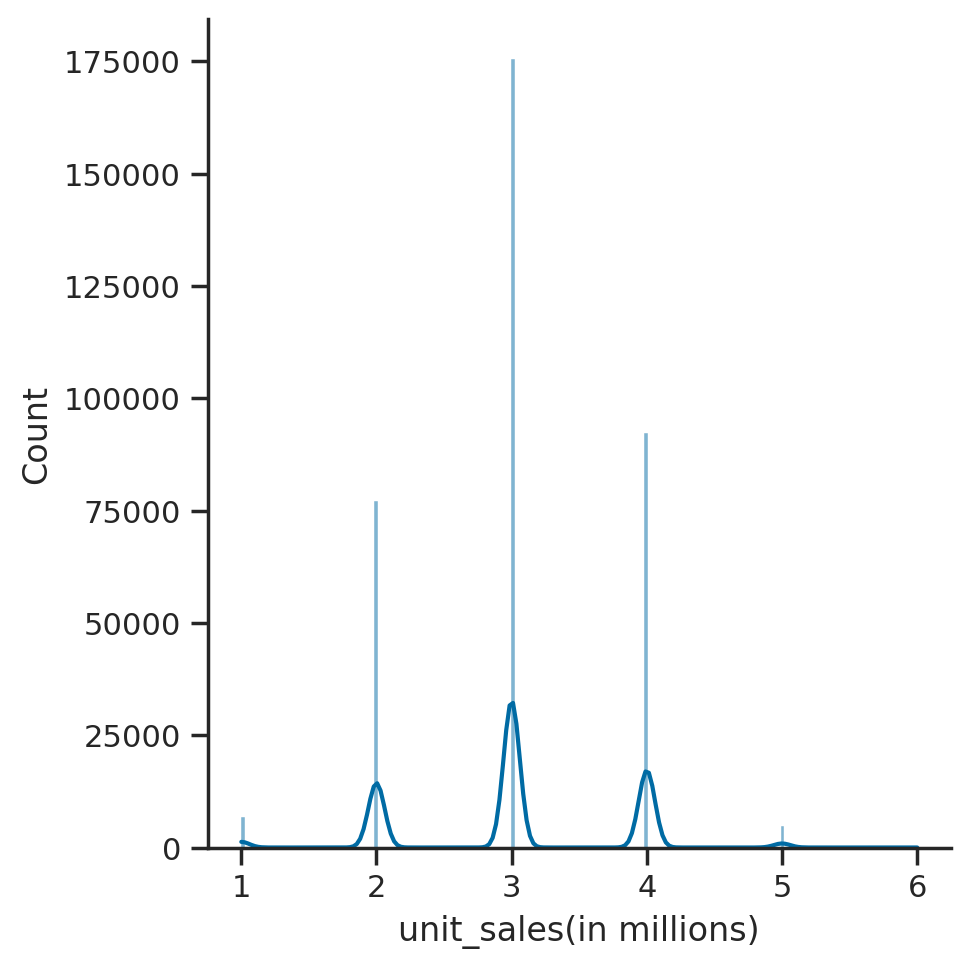

In [60]:
sns.displot(data = df_train, x = 'unit_sales(in millions)', kde = True)

- We see there are 5 curves and gaps in between. 
- This means we have some unique values.

In [61]:
df_train['unit_sales(in millions)'].unique()

array([3., 2., 4., 1., 5., 6.])

- There are only 6 unique values.

<AxesSubplot:xlabel='unit_sales(in millions)', ylabel='count'>

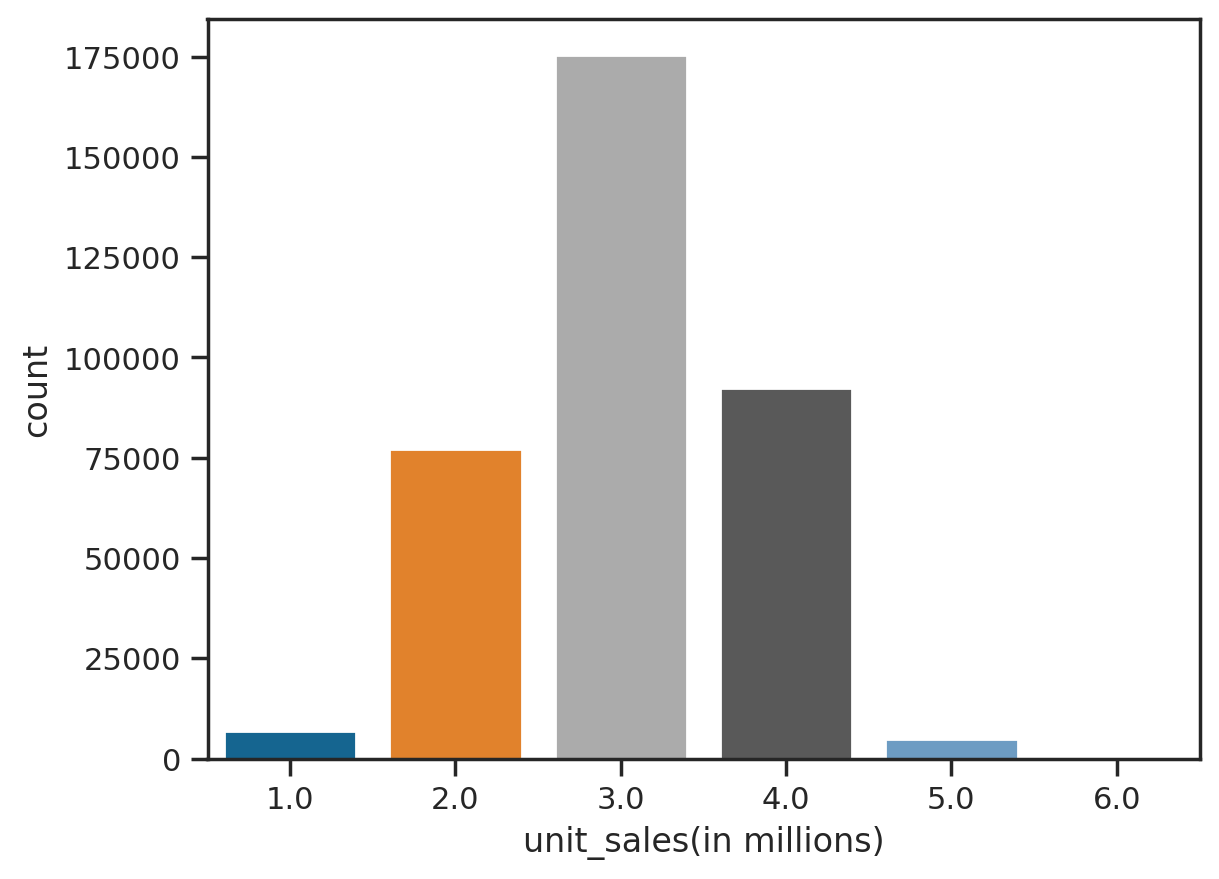

In [62]:
sns.countplot(data = df_train, x = 'unit_sales(in millions)')

In [63]:
df_train['unit_sales(in millions)'].value_counts()

3.0    175552
4.0     92326
2.0     77238
1.0      6765
5.0      4819
6.0        21
Name: unit_sales(in millions), dtype: int64

#### total_children

<AxesSubplot:>

Text(0.5, 1.0, 'Box plot for total_children')

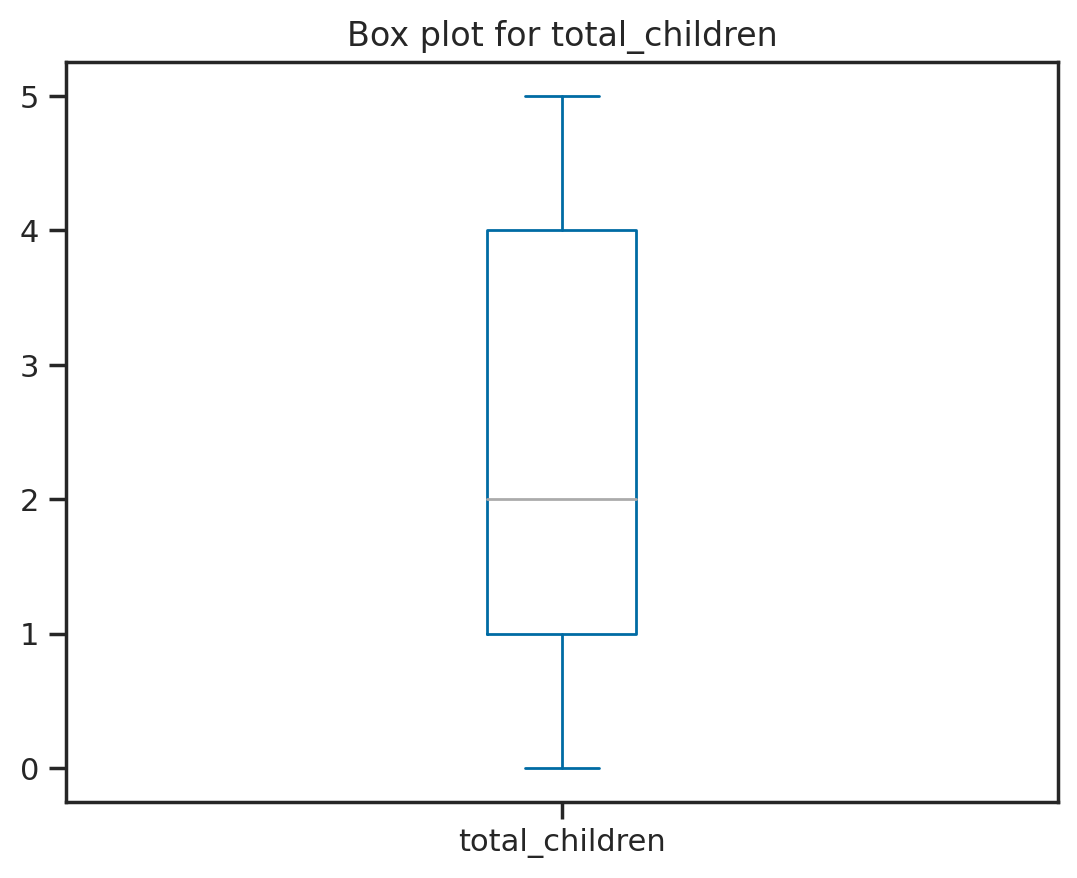

In [64]:
df_train['total_children'].plot.box()
plt.title("Box plot for {0}".format('total_children'))

In [65]:
df_train['total_children'].describe()

count    356721.000000
mean          2.450464
std           1.488054
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           5.000000
Name: total_children, dtype: float64

<AxesSubplot:xlabel='total_children'>

Text(0.5, 1.0, 'Violin plot for total_children')

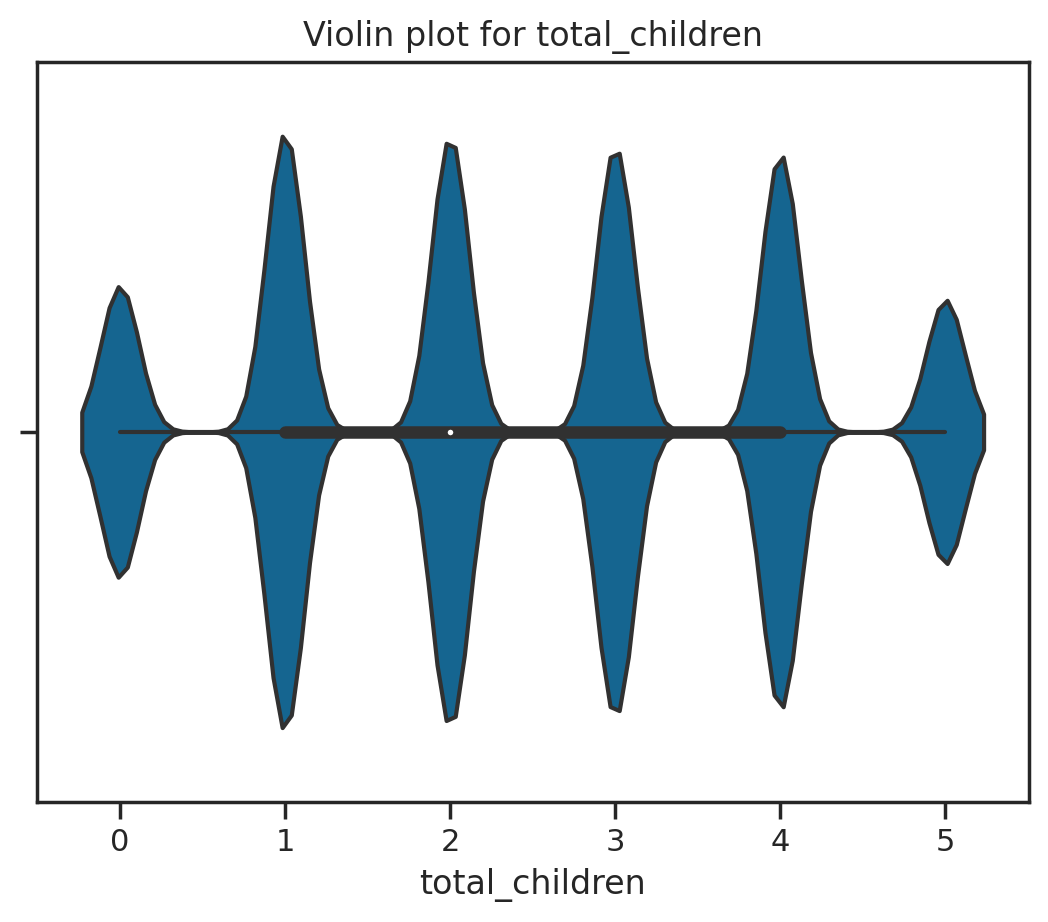

In [66]:
sns.violinplot(data = df_train, x = 'total_children')
plt.title("Violin plot for {0}".format('total_children'))

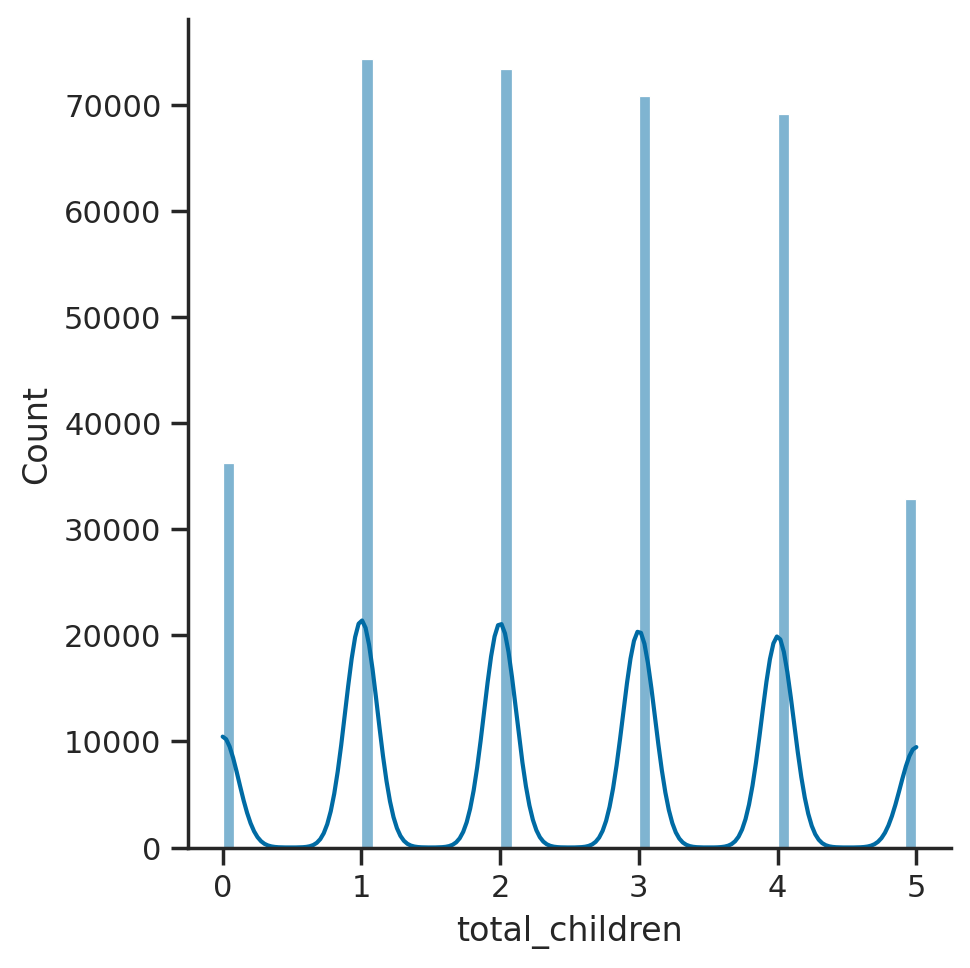

In [67]:
sns.displot(data = df_train, x = 'total_children', kde = True)

In [68]:
df_train['total_children'].unique()

array([2., 4., 0., 5., 1., 3.])

- Here also, there are only 6 unique values.

In [69]:
df_train['total_children'].value_counts()

1.0    74336
2.0    73348
3.0    70824
4.0    69092
0.0    36269
5.0    32852
Name: total_children, dtype: int64

<AxesSubplot:xlabel='total_children', ylabel='count'>

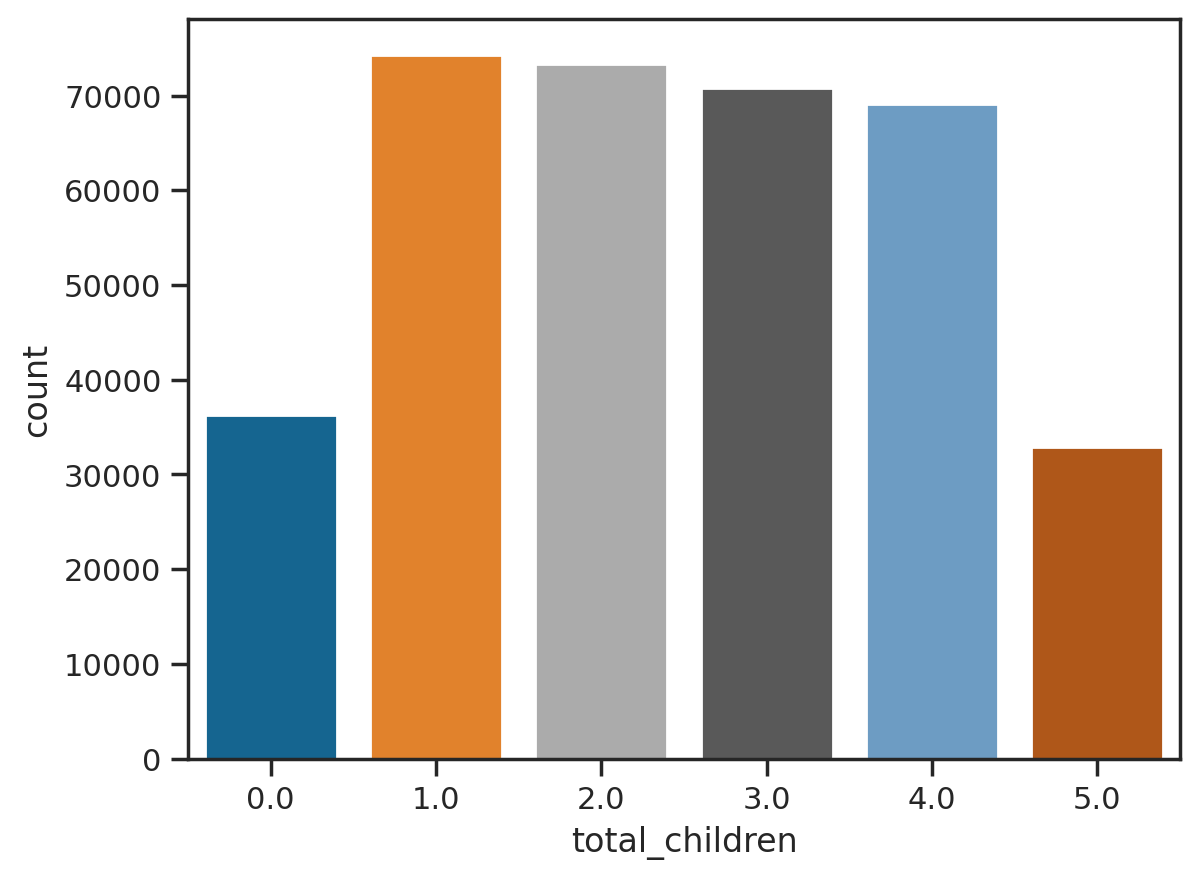

In [70]:
sns.countplot(data = df_train, x = 'total_children')

#### num_children_at_home

<AxesSubplot:>

Text(0.5, 1.0, 'Box plot for num_children_at_home')

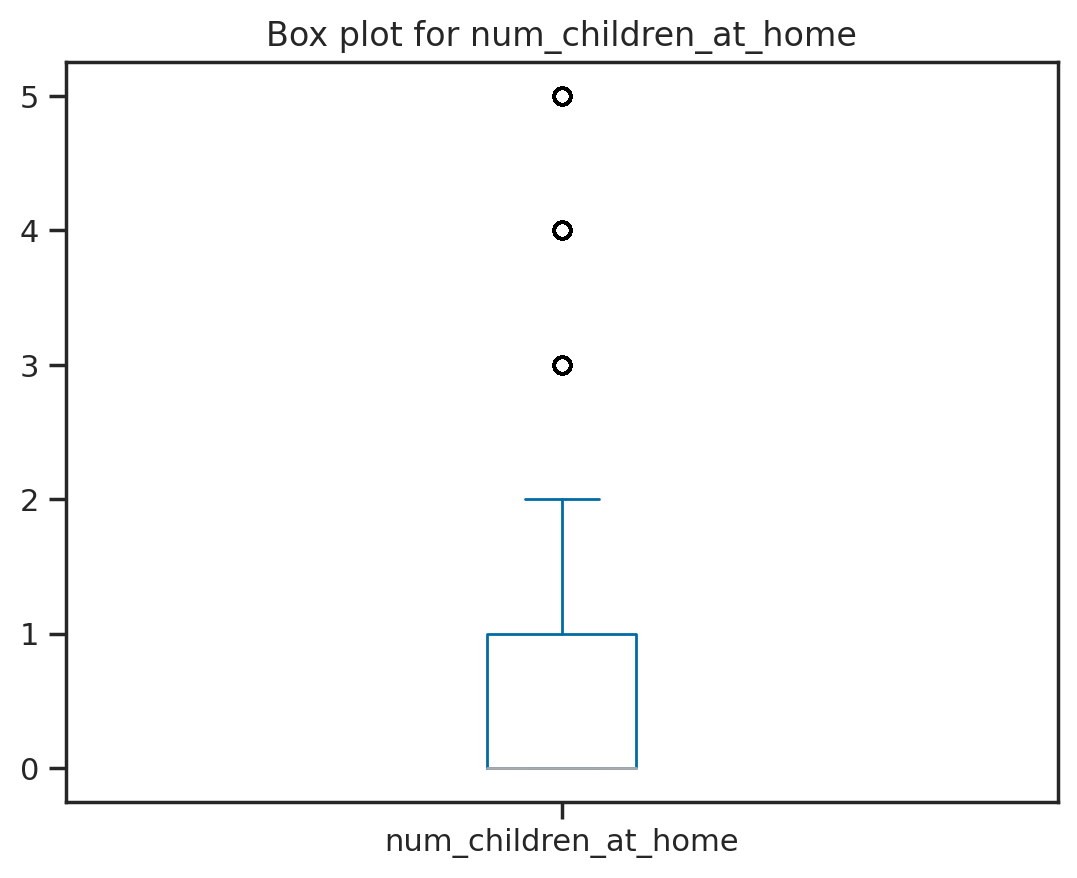

In [71]:
df_train['num_children_at_home'].plot.box()
plt.title("Box plot for {0}".format('num_children_at_home'))

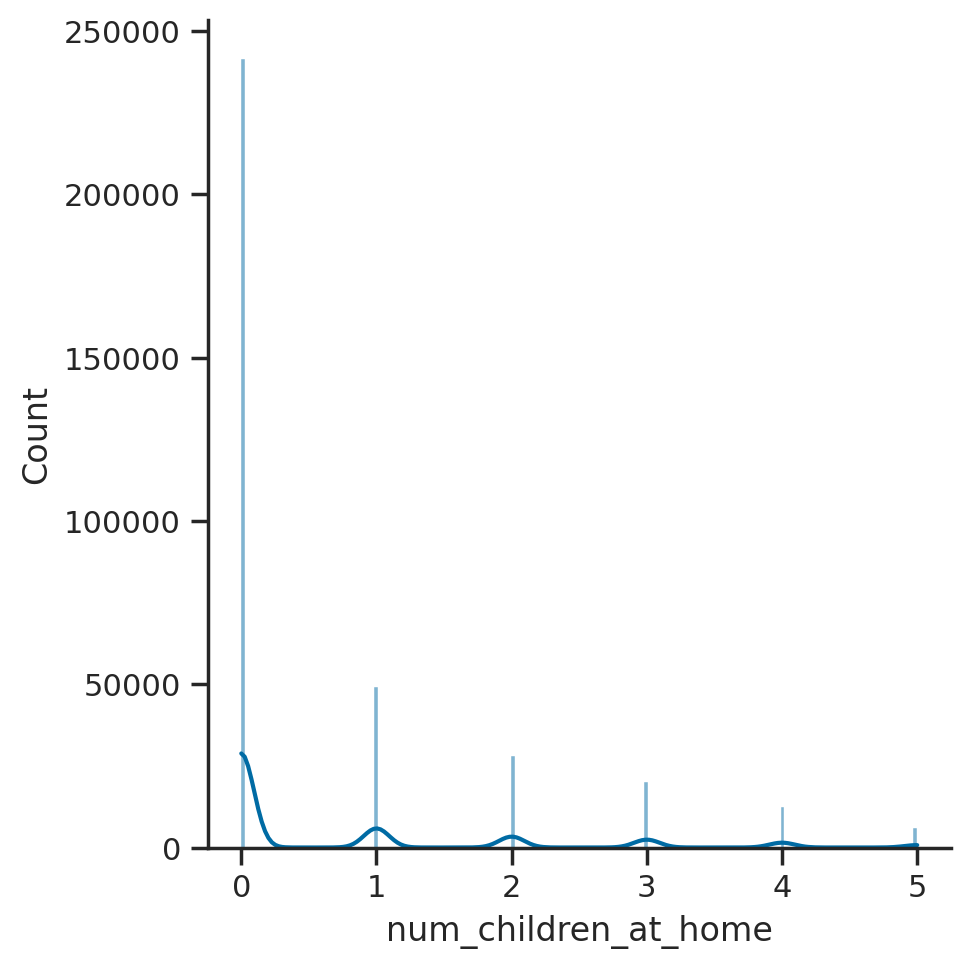

In [72]:
sns.displot(data = df_train, x = 'num_children_at_home', kde = True)

<AxesSubplot:xlabel='num_children_at_home', ylabel='count'>

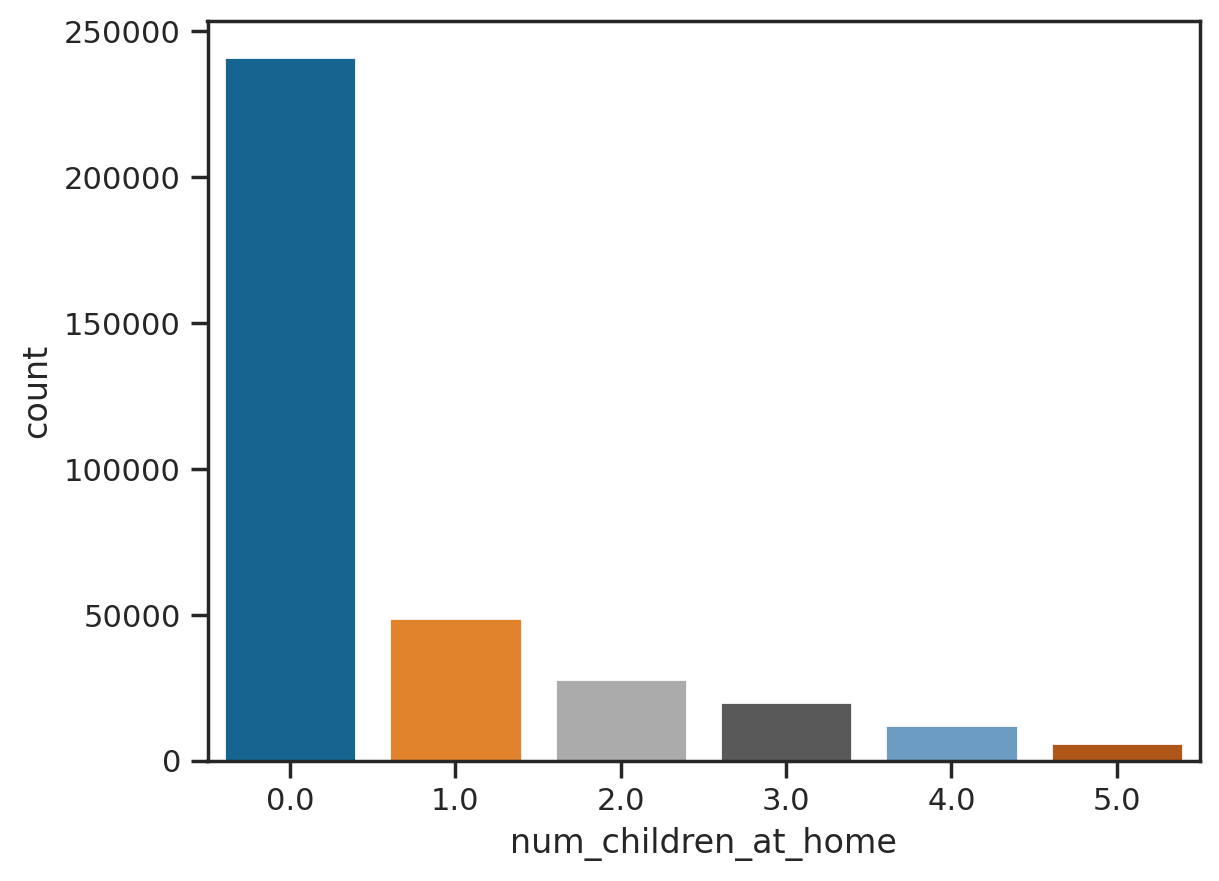

In [73]:
sns.countplot(data = df_train, x = 'num_children_at_home')

- We see there are 6 unique values here.

#### units_per_case

<AxesSubplot:>

Text(0.5, 1.0, 'Box plot for units_per_case')

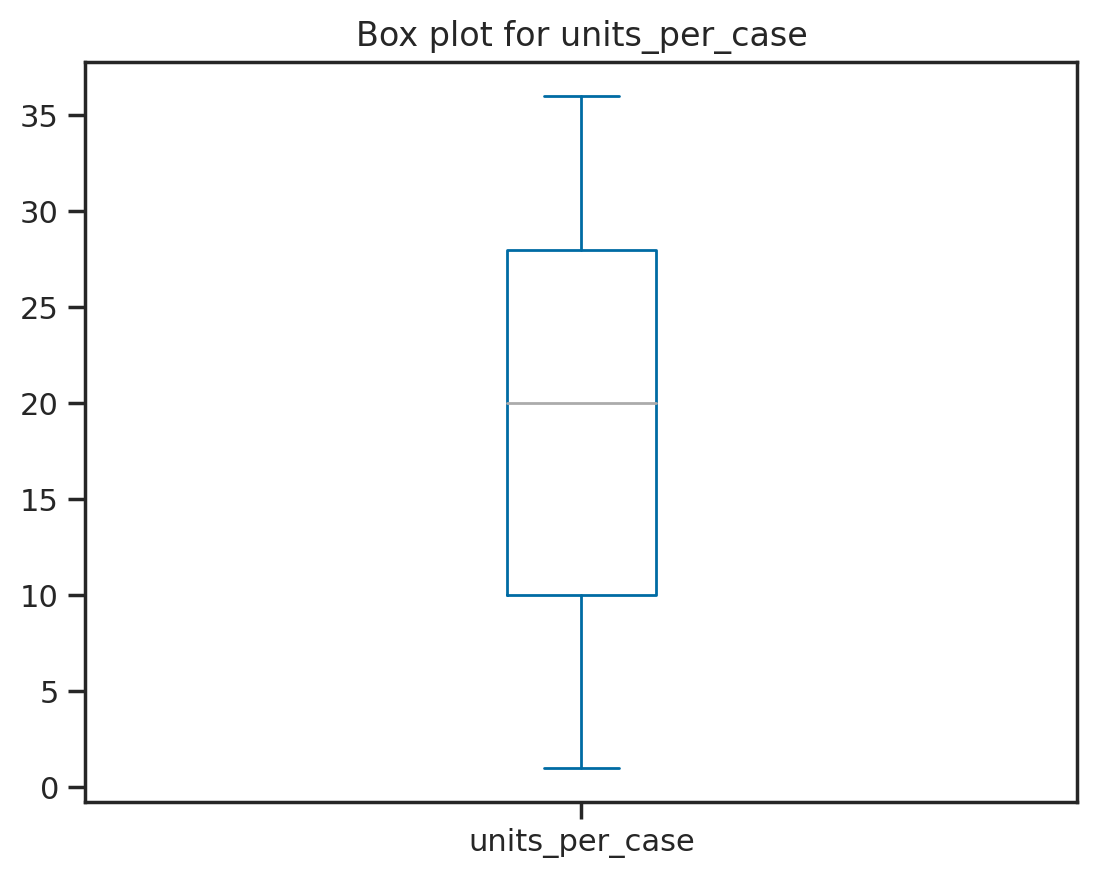

In [74]:
df_train['units_per_case'].plot.box()
plt.title("Box plot for {0}".format('units_per_case'))

<AxesSubplot:xlabel='count', ylabel='units_per_case'>

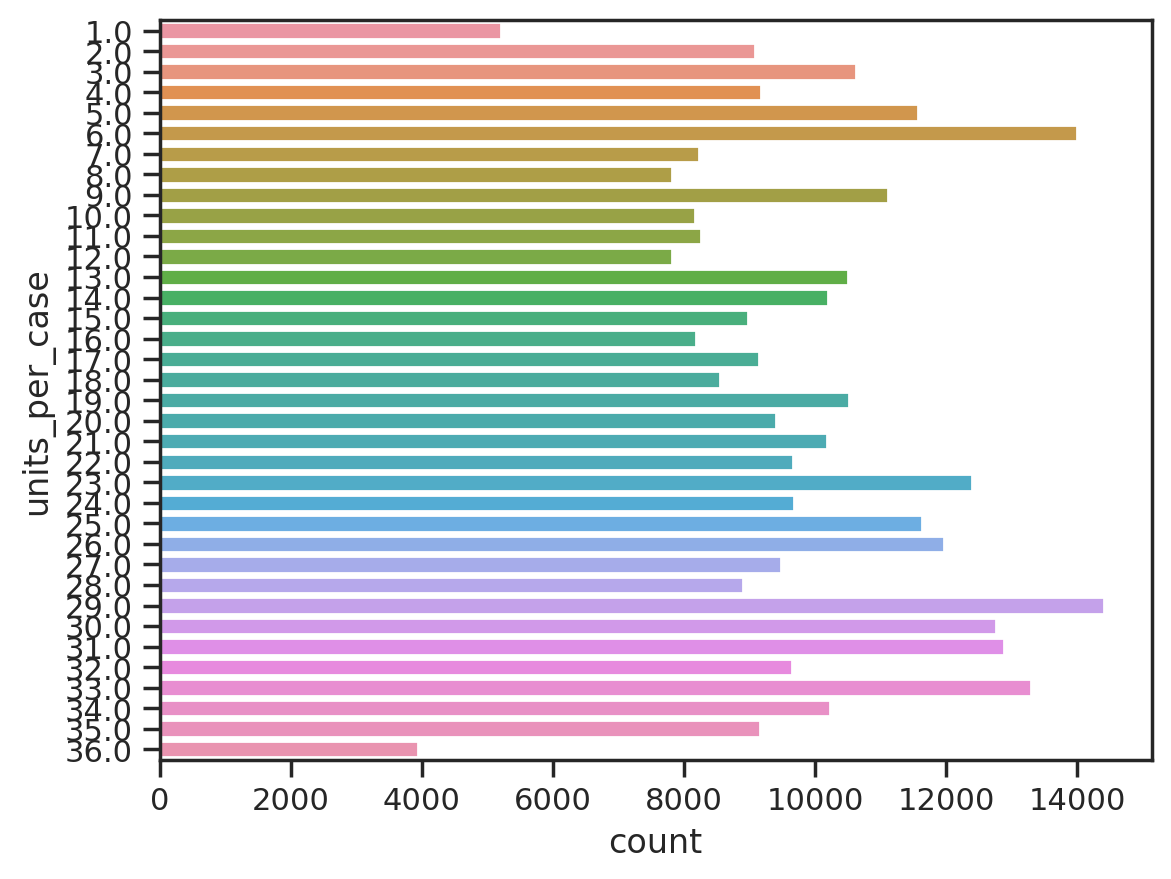

In [75]:
sns.countplot(data = df_train, y = 'units_per_case')

- There are 36 unique values

### Feature Engineering

#### Finding correlation among all the columns

In [76]:
df_train[numerical_columns].corr().style.bar()

In [77]:
# sns.pairplot(df_train[numerical_columns])

#### Filtering only >=0.3 values

In [78]:
df_train.corr().style.highlight_between(left=0.3, right=1, props='font-style:italic;background-image: linear-gradient(to right, red , yellow);')  

#### Filtering only >=0.3 values in numeric columns

In [79]:
df_train[numerical_columns].corr().style.highlight_between(left=0.3, right=1, props='font-style:italic;background-image: linear-gradient(to right, red , yellow);')

#### Numeric columns- Visualization using Clustered heatmap

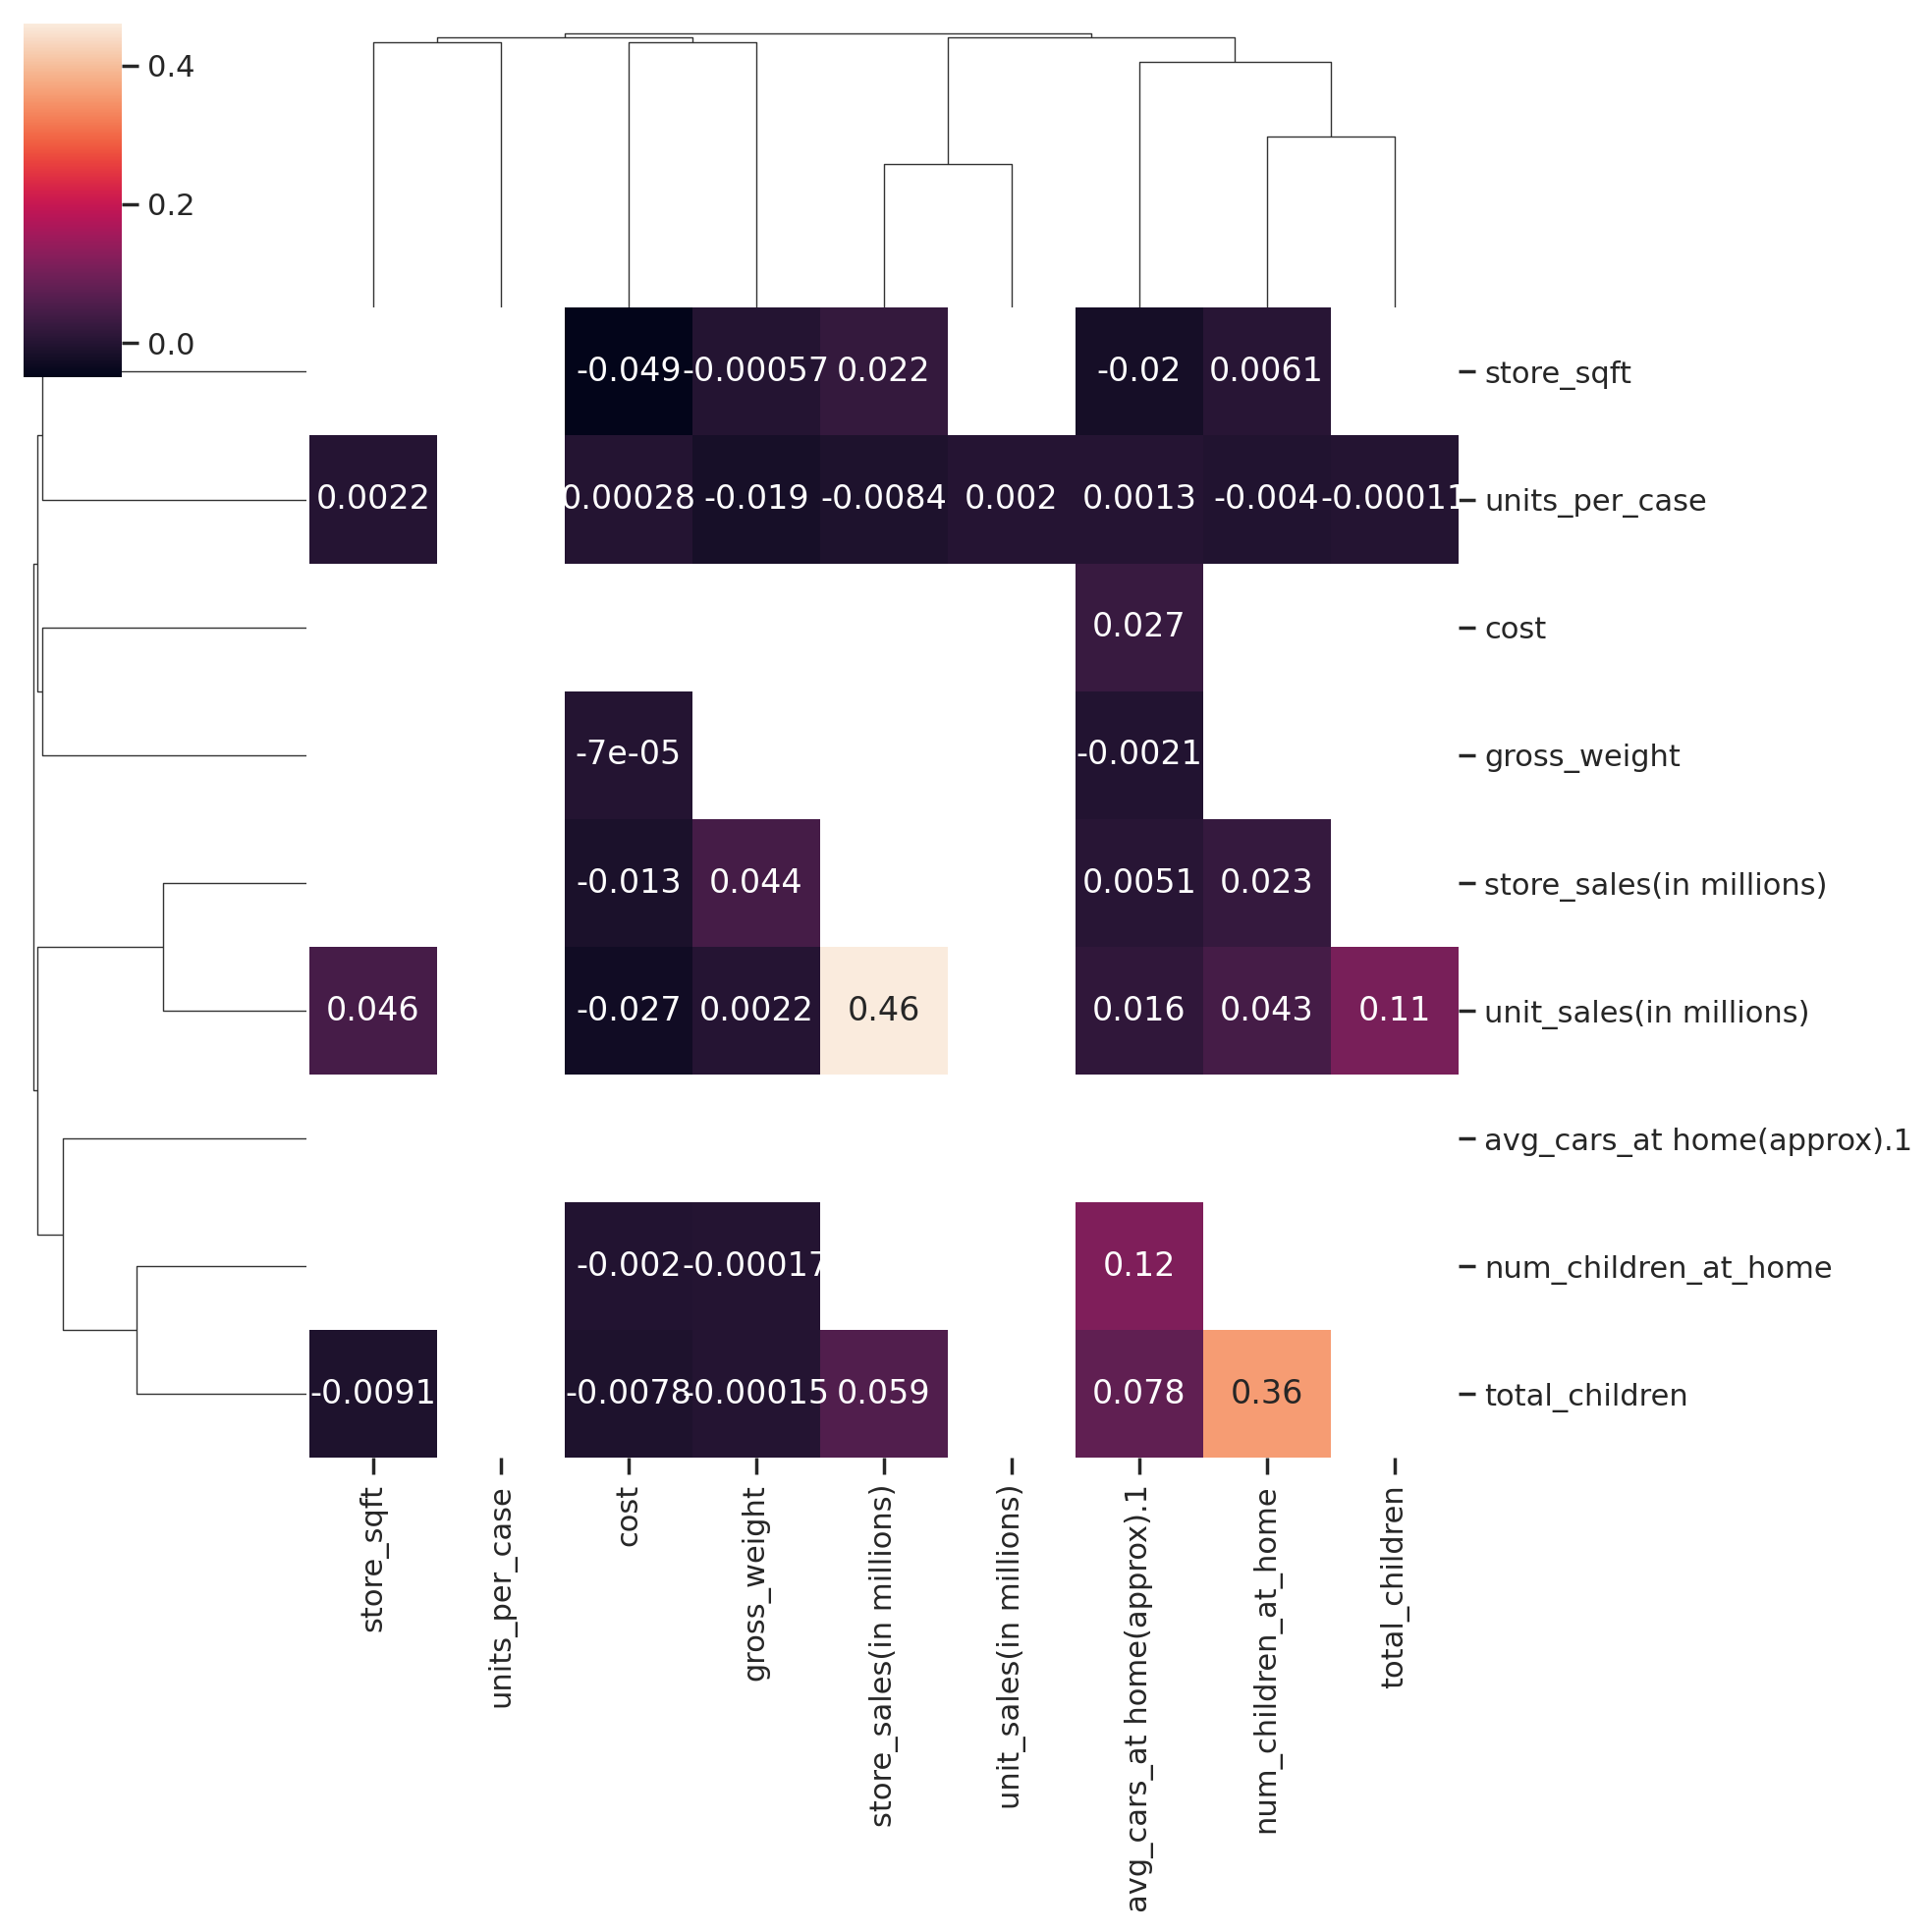

In [80]:
sns.clustermap(df_train[numerical_columns].corr(), annot = True, mask = np.triu(df_train[numerical_columns].corr()))

- Store sales and unit sales have 46% correlation
- Number of children at home and Total children have ~36% correlation

#### Boolean columns- Visualization using Clustered heatmap

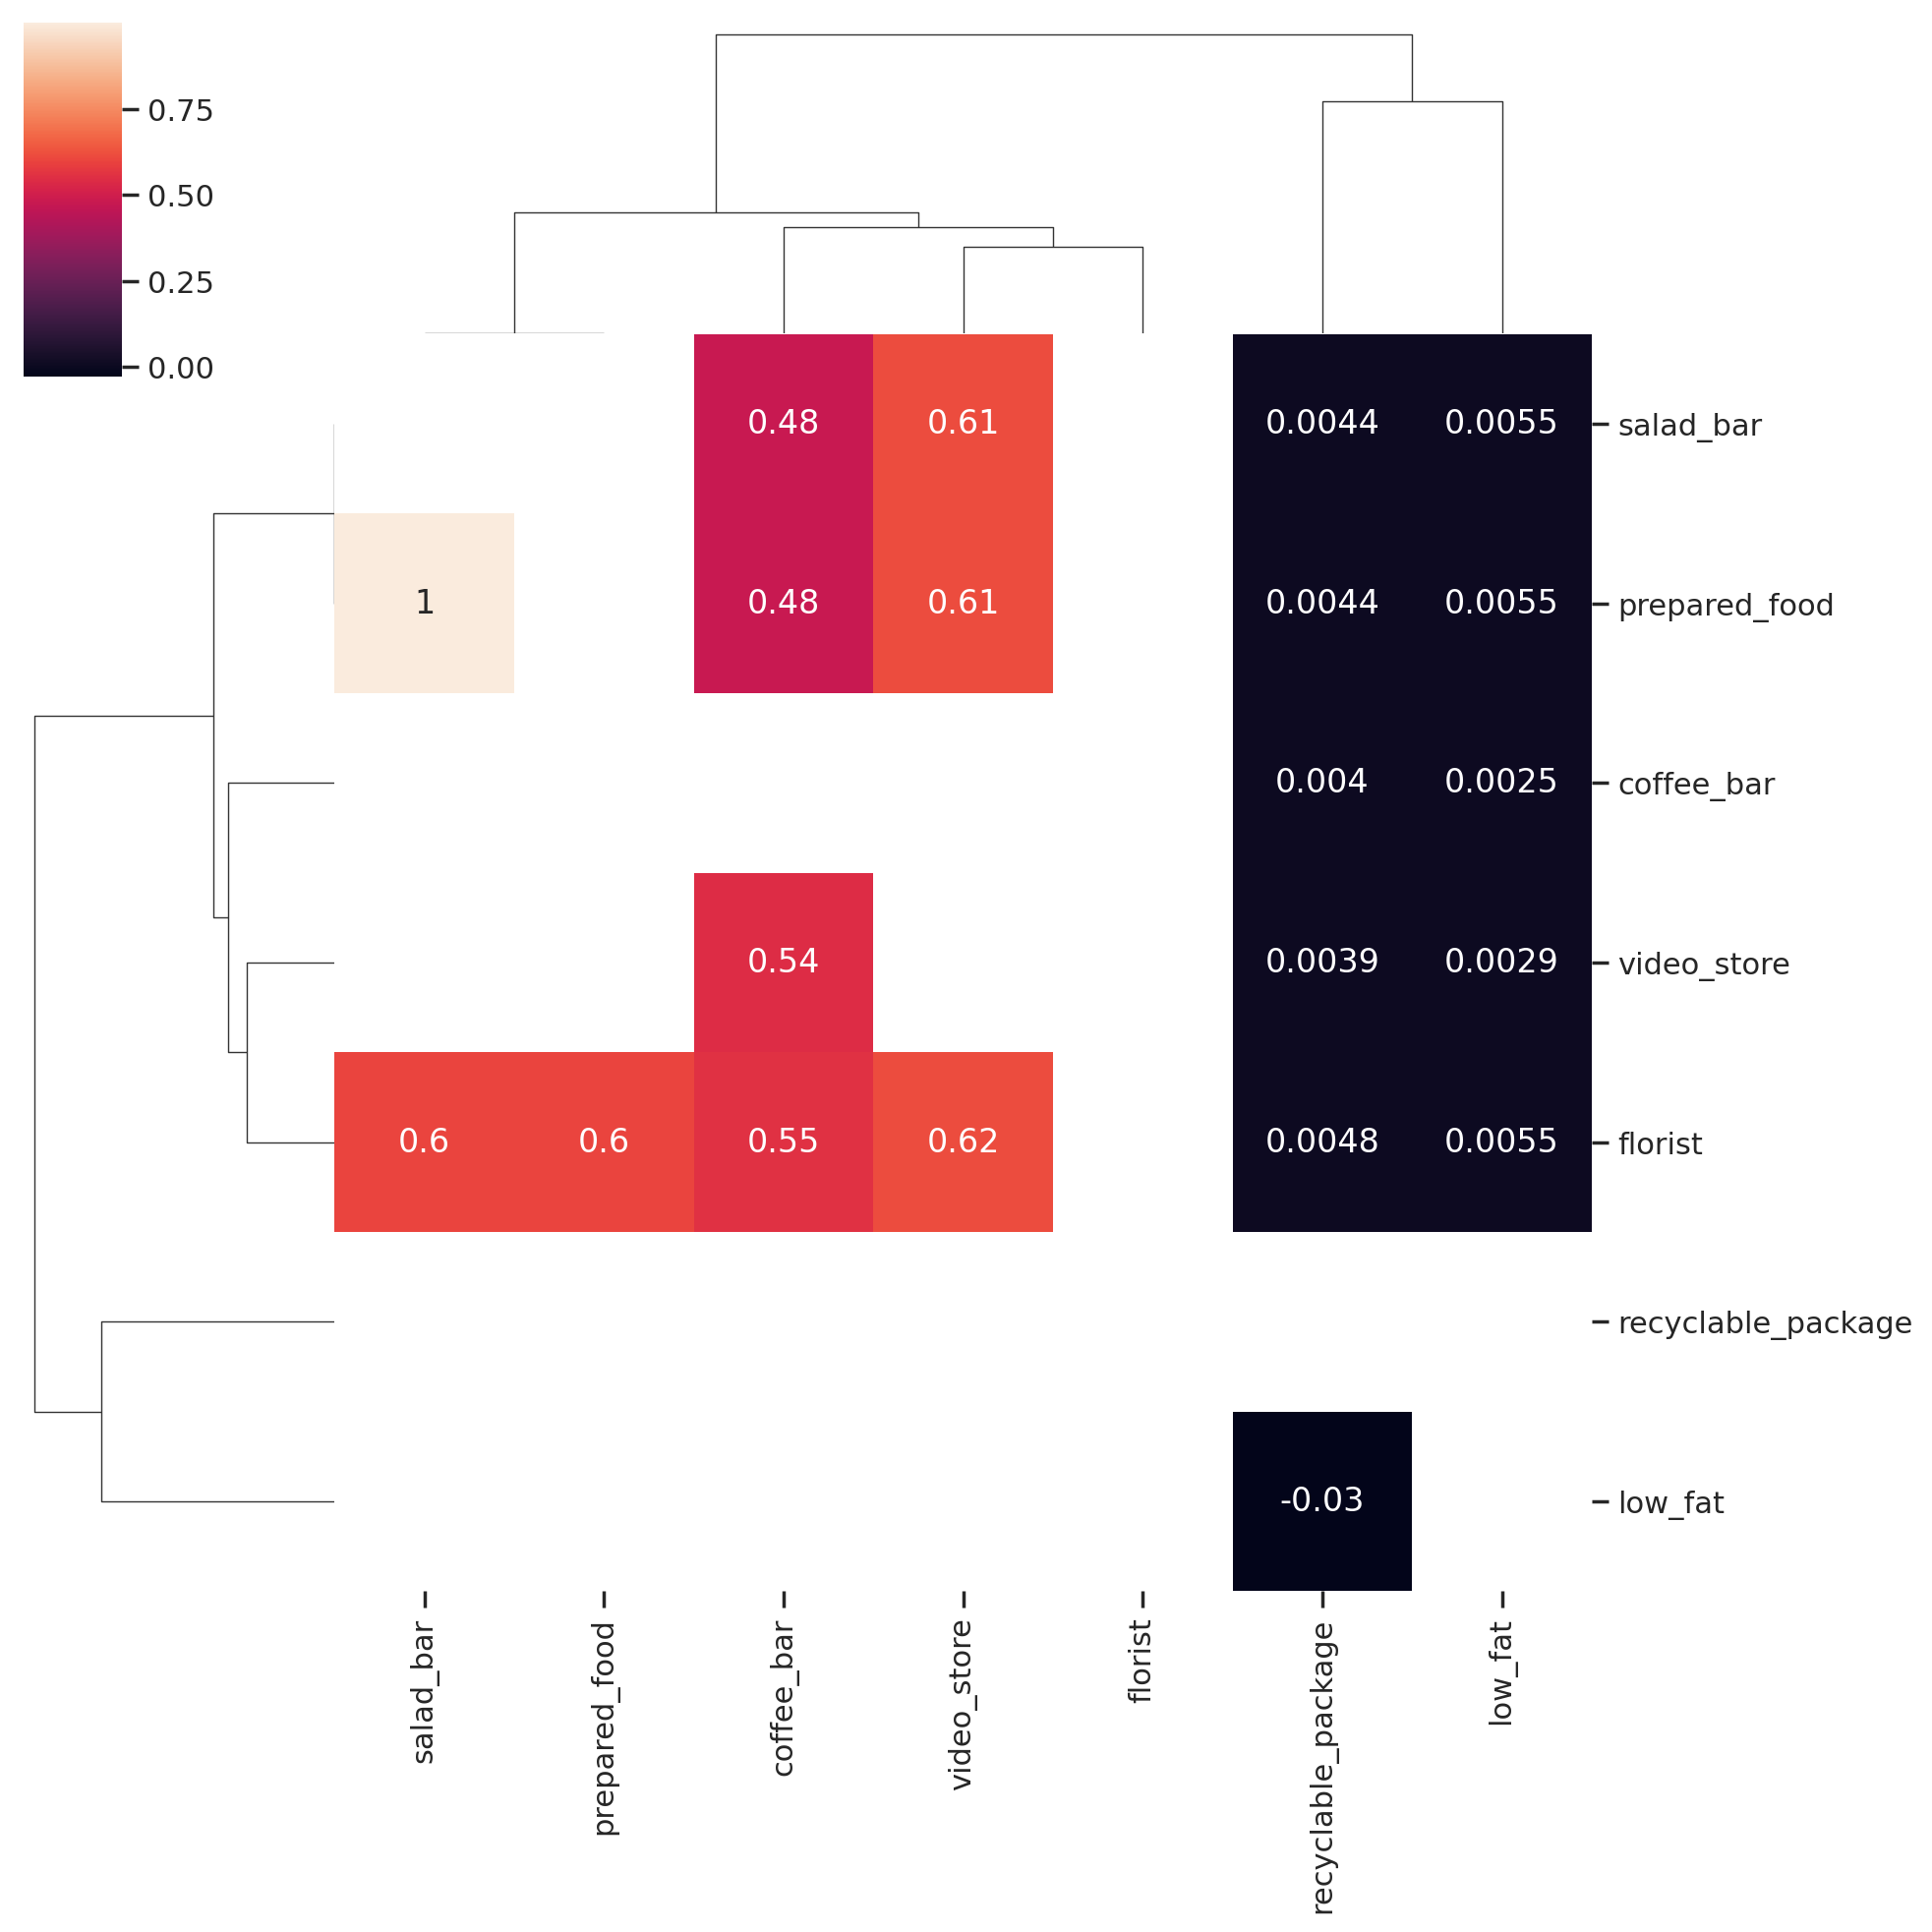

In [81]:
sns.clustermap(df_train[boolean_columns].corr(), annot = True, mask = np.triu(df_train[boolean_columns].corr()))

- Salad bar and prepared food have 100% correlation
    - It is better to remove any one column.
- There are various columns that have good correlation

In [82]:
df_train[boolean_columns].corr().style.highlight_between(left=0.3, right=1, props='font-style:italic;background-image: linear-gradient(to right, red , yellow);')  

<AxesSubplot:xlabel='salad_bar', ylabel='count'>

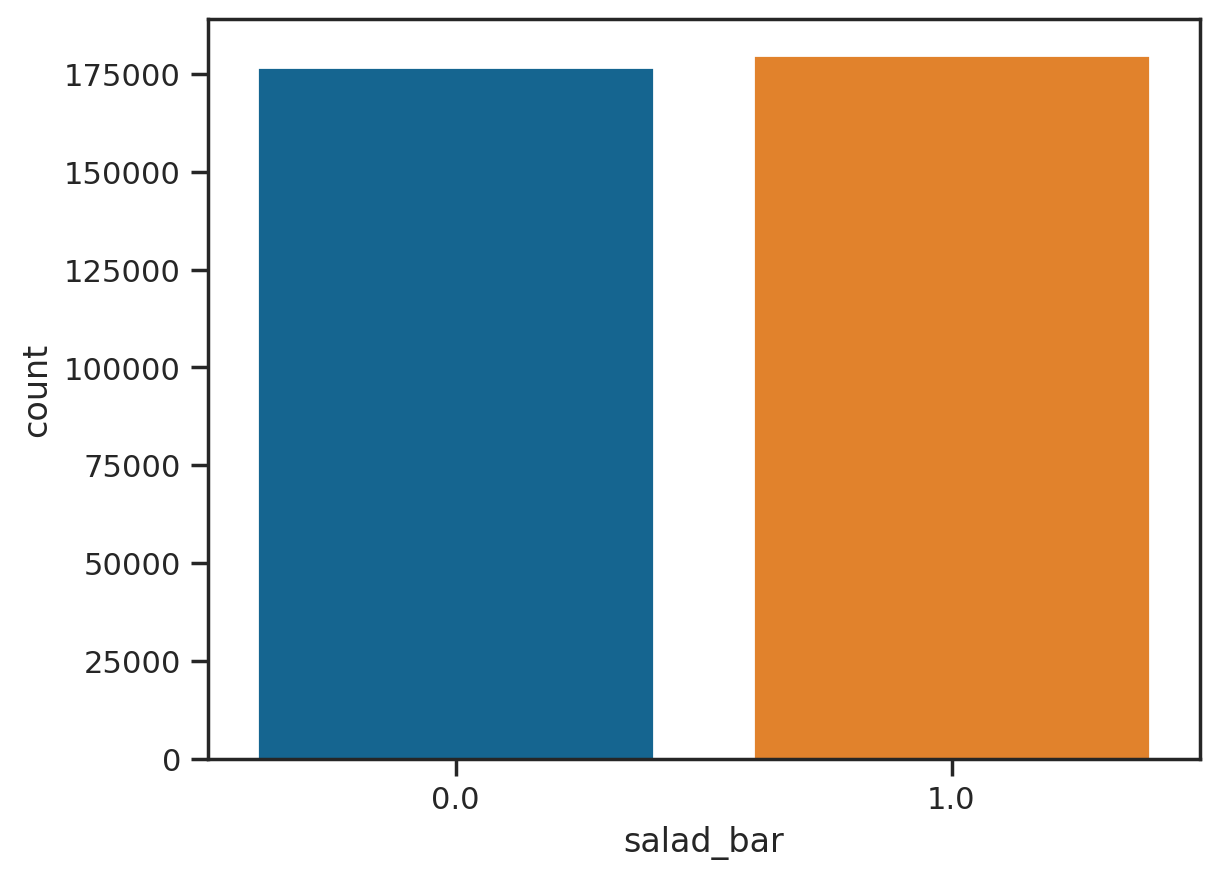

In [83]:
sns.countplot(data=df_train, x = 'salad_bar')

<AxesSubplot:xlabel='prepared_food', ylabel='count'>

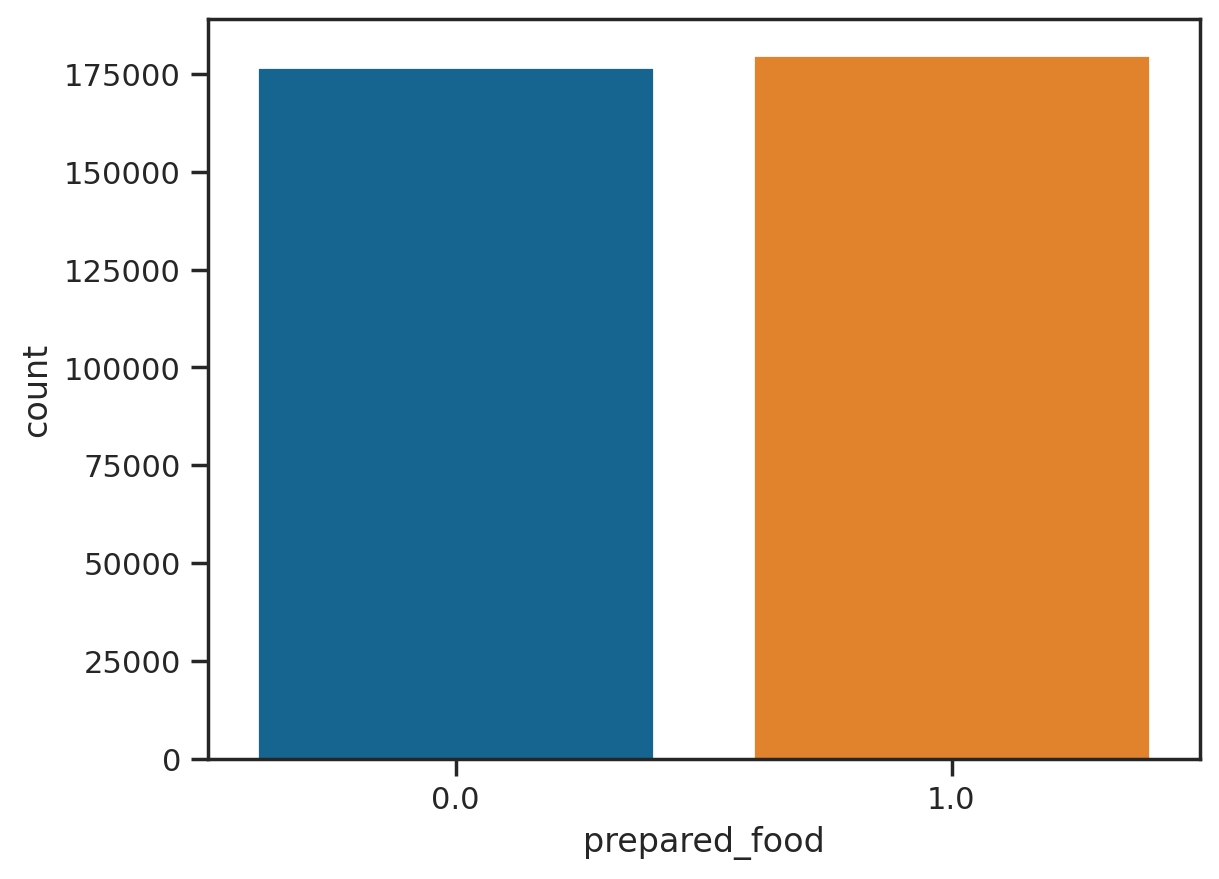

In [84]:
sns.countplot(data=df_train, x = 'prepared_food')

In [85]:
df_train[['salad_bar', 'prepared_food']]

salad_bar  prepared_food
0             0.0            0.0
1             0.0            0.0
2             0.0            0.0
3             0.0            0.0
4             1.0            1.0
...           ...            ...
360331        0.0            0.0
360332        0.0            0.0
360333        1.0            1.0
360334        1.0            1.0
360335        1.0            1.0

[356721 rows x 2 columns]

In [86]:
((df_train['salad_bar'] != df_train['prepared_food']).sum() / df_train.shape[0]) * 100

0.008129602686693521

- We see that only 0.008% difference in salad_bar and prepared_food columns.
- So, removing prepared_food 

In [87]:
df_train.drop(['prepared_food'], axis = 1, inplace = True)
df_train

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


store_sales(in millions)  unit_sales(in millions)  total_children  \
0                           8.61                      3.0             2.0   
1                           5.00                      2.0             4.0   
2                          14.08                      4.0             0.0   
3                           4.02                      3.0             5.0   
4                           2.13                      3.0             5.0   
...                          ...                      ...             ...   
360331                      7.60                      4.0             5.0   
360332                     14.44                      4.0             4.0   
360333                     10.74                      3.0             0.0   
360334                     11.04                      3.0             1.0   
360335                      5.30                      2.0             2.0   

        num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                        2.0                         2.0         10.30   
1                        0.0                         3.0          6.66   
2                        0.0                         3.0         21.30   
3                        0.0                         0.0         14.80   
4                        0.0                         3.0         17.00   
...                      ...                         ...           ...   
360331                   5.0                         3.0         13.50   
360332                   0.0                         4.0         18.80   
360333                   0.0                         2.0         11.30   
360334                   0.0                         3.0         10.20   
360335                   0.0                         2.0         10.80   

        recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                      1.0      0.0            32.0     36509.0         0.0   
1                      1.0      0.0             1.0     28206.0         1.0   
2                      1.0      0.0            26.0     21215.0         1.0   
3                      0.0      1.0            36.0     21215.0         1.0   
4                      1.0      1.0            20.0     27694.0         1.0   
...                    ...      ...             ...         ...         ...   
360331                 1.0      0.0            33.0     30268.0         0.0   
360332                 1.0      1.0            18.0     20319.0         0.0   
360333                 1.0      0.0            35.0     30584.0         1.0   
360334                 0.0      1.0            14.0     30584.0         1.0   
360335                 0.0      0.0            21.0     33858.0         1.0   

        video_store  salad_bar  florist    cost  
0               0.0        0.0      0.0   62.09  
1               0.0        0.0      0.0  121.80  
2               0.0        0.0      0.0   83.51  
3               0.0        0.0      0.0   66.78  
4               1.0        1.0      1.0  111.51  
...             ...        ...      ...     ...  
360331          0.0        0.0      0.0  133.42  
360332          0.0        0.0      0.0   81.85  
360333          1.0        1.0      1.0   87.07  
360334          1.0        1.0      1.0  146.72  
360335          0.0        1.0      1.0  122.47  

[356721 rows x 15 columns]

In [88]:
boolean_columns.remove('prepared_food')

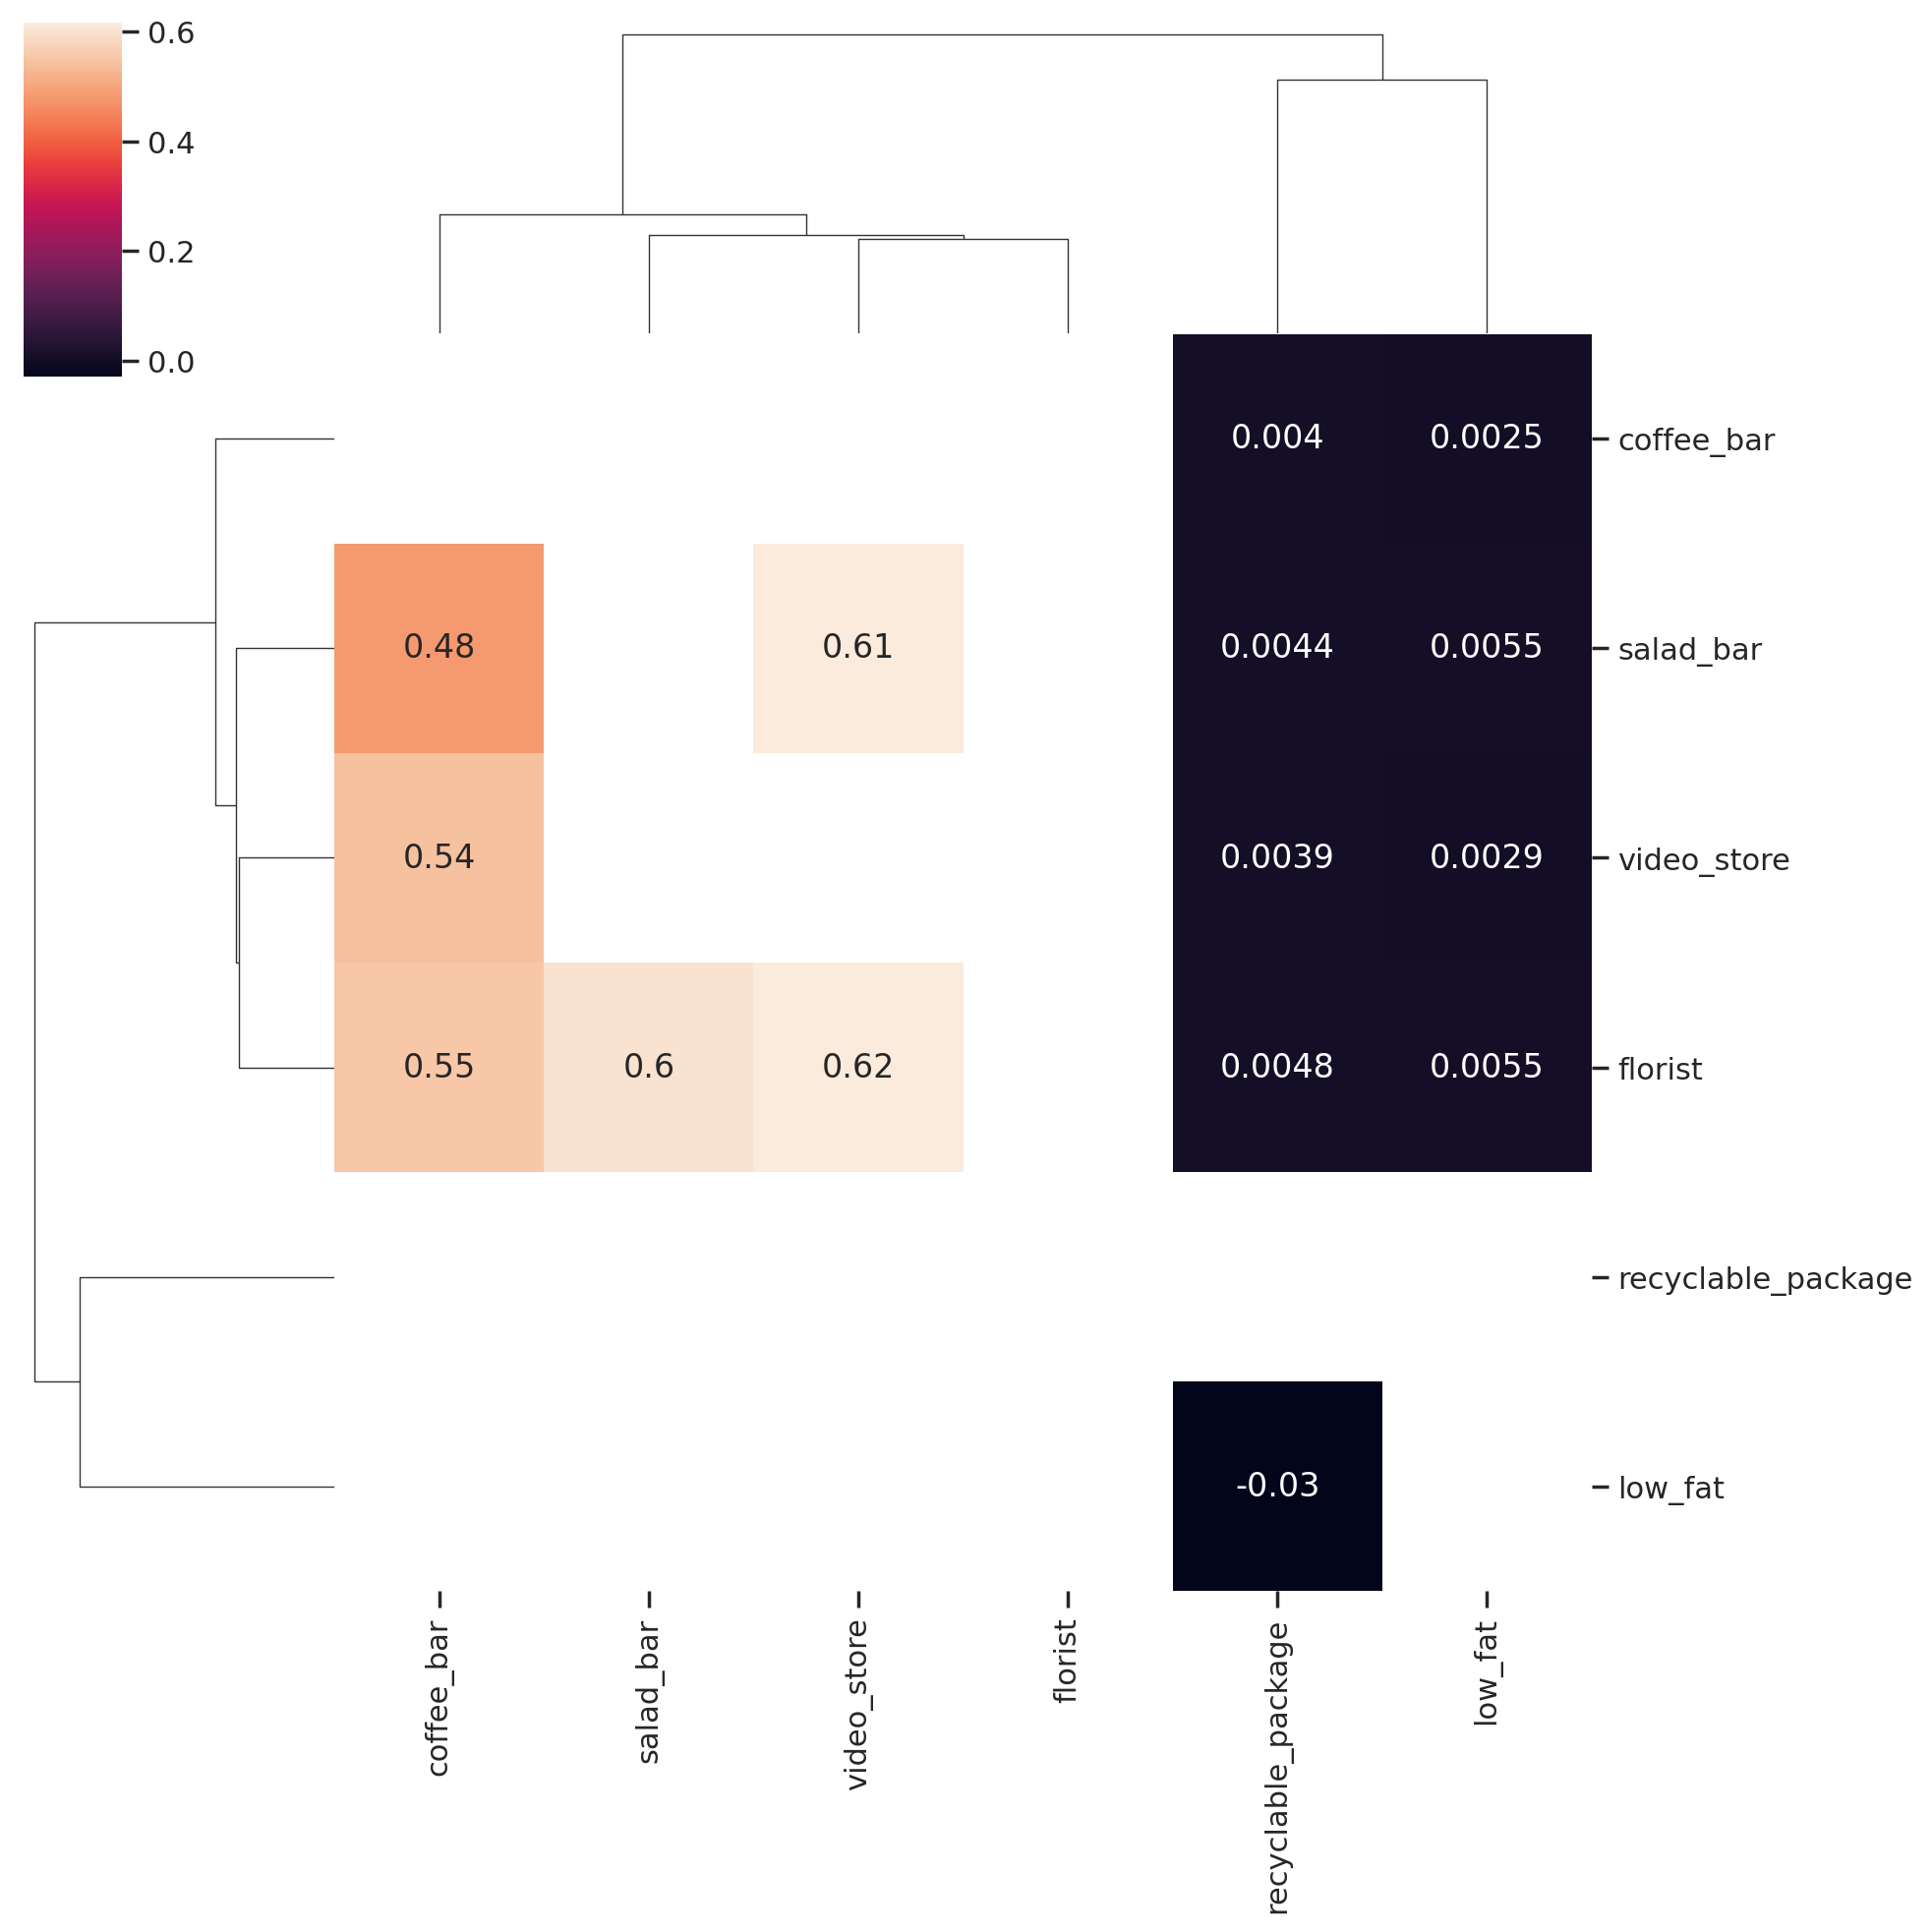

In [89]:
sns.clustermap(df_train[boolean_columns].corr(), annot = True, mask = np.triu(df_train[boolean_columns].corr()))

<AxesSubplot:xlabel='video_store', ylabel='florist'>

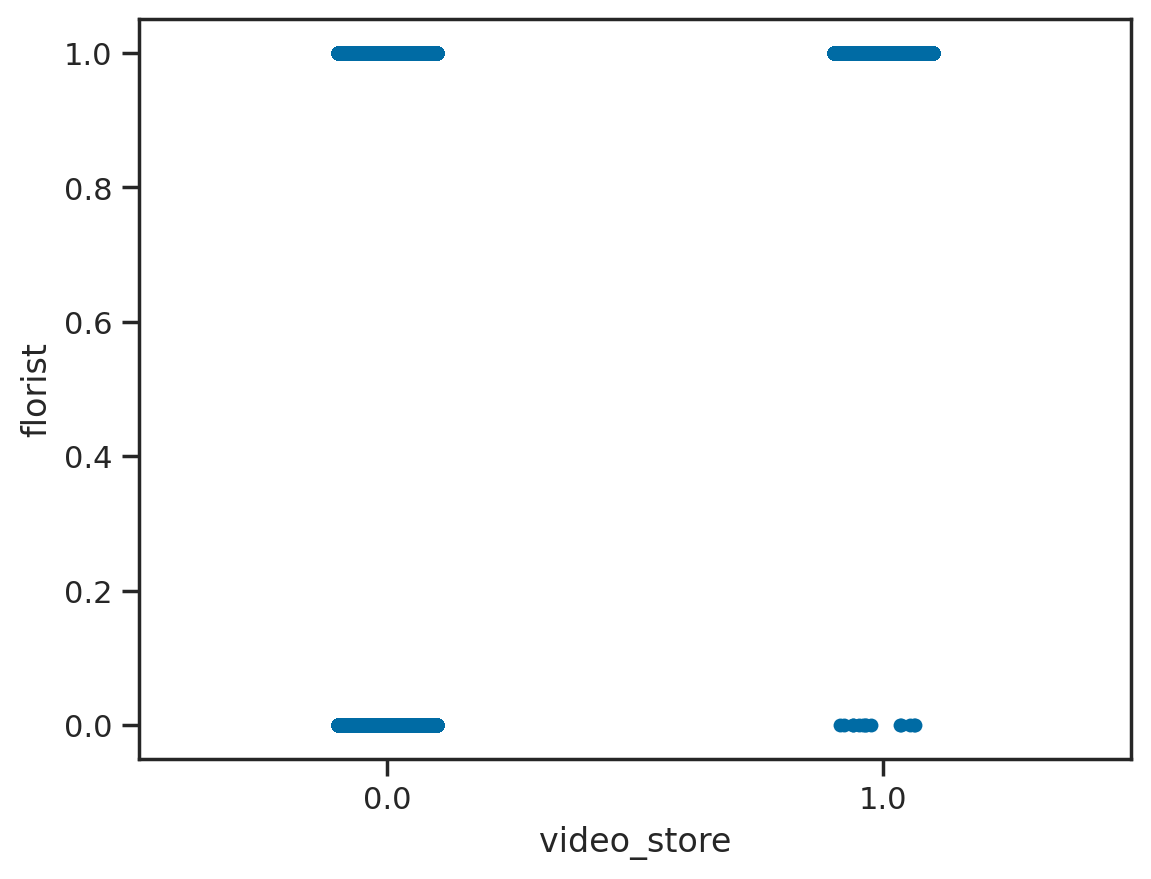

In [90]:
# Using stripplot instead of scatter as points are overlapping
sns.stripplot(data = df_train, x = 'video_store', y = 'florist')

Since points are overlapping, trying in 3D version

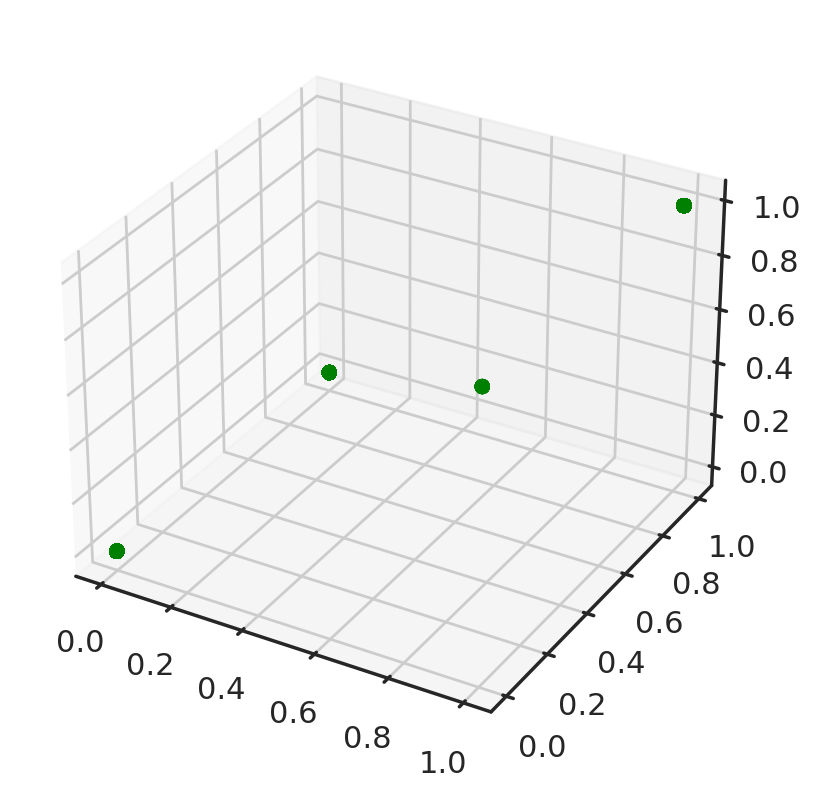

In [91]:
plt.axes(projection ="3d").scatter3D(df_train['video_store'] , df_train['florist'] , df_train['video_store'], color = "green")

In [92]:
for i in numerical_columns:
    df_train[i].value_counts()

2.0    109258
3.0    103361
1.0     81867
4.0     43864
0.0     18371
Name: avg_cars_at home(approx).1, dtype: int64

101.84    4711
69.63     4237
81.79     4125
59.86     3894
131.81    3490
          ... 
69.15       98
101.57      96
77.70       83
101.75      83
84.11       67
Name: cost, Length: 328, dtype: int64

17.10    4367
14.70    3904
19.90    3785
17.20    3556
13.70    3503
         ... 
12.01       1
10.98       1
10.01       1
9.08        1
9.60        1
Name: gross_weight, Length: 384, dtype: int64

0.0    241300
1.0     48996
2.0     27874
3.0     20112
4.0     12327
5.0      6112
Name: num_children_at_home, dtype: int64

5.04     2373
5.40     1988
7.41     1919
7.95     1874
5.52     1831
         ... 
5.45        1
12.36       1
3.41        1
2.53        1
5.77        1
Name: store_sales(in millions), Length: 943, dtype: int64

21215.0    31488
27694.0    29972
33858.0    29902
23598.0    29294
20319.0    28902
30268.0    25740
30797.0    24034
39696.0    19490
23112.0    17580
34791.0    16330
38382.0    16250
23688.0    15887
23759.0    14771
30584.0    12882
23593.0    11755
36509.0     9606
22478.0     7307
28206.0     6774
34452.0     5274
24597.0     3483
Name: store_sqft, dtype: int64

1.0    74336
2.0    73348
3.0    70824
4.0    69092
0.0    36269
5.0    32852
Name: total_children, dtype: int64

3.0    175552
4.0     92326
2.0     77238
1.0      6765
5.0      4819
6.0        21
Name: unit_sales(in millions), dtype: int64

29.0    14412
6.0     13997
33.0    13300
31.0    12877
30.0    12762
23.0    12393
26.0    11961
25.0    11623
5.0     11570
9.0     11106
3.0     10626
19.0    10510
13.0    10508
34.0    10221
14.0    10202
21.0    10178
24.0     9678
22.0     9663
32.0     9646
27.0     9482
20.0     9402
4.0      9171
35.0     9156
17.0     9147
2.0      9080
15.0     8978
28.0     8906
18.0     8547
11.0     8257
7.0      8227
16.0     8189
10.0     8168
8.0      7812
12.0     7809
1.0      5212
36.0     3945
Name: units_per_case, dtype: int64

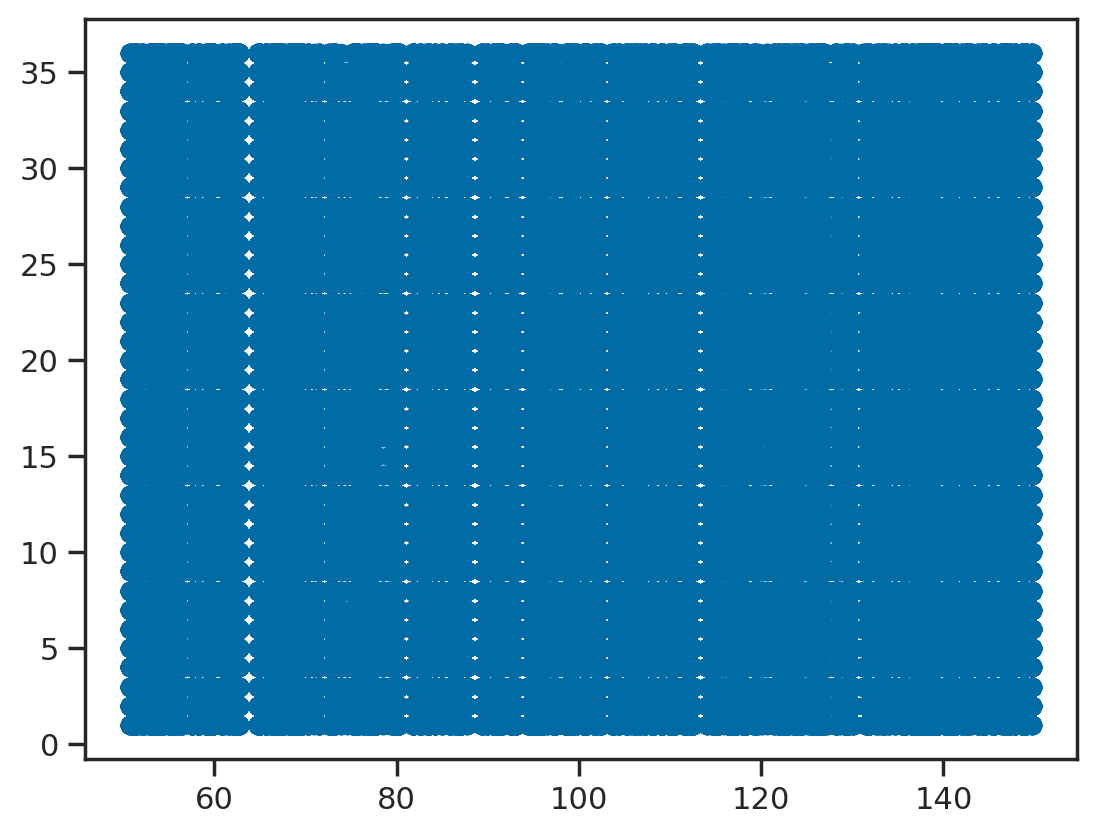

In [93]:
plt.scatter(df_train['cost'],df_train['units_per_case'])

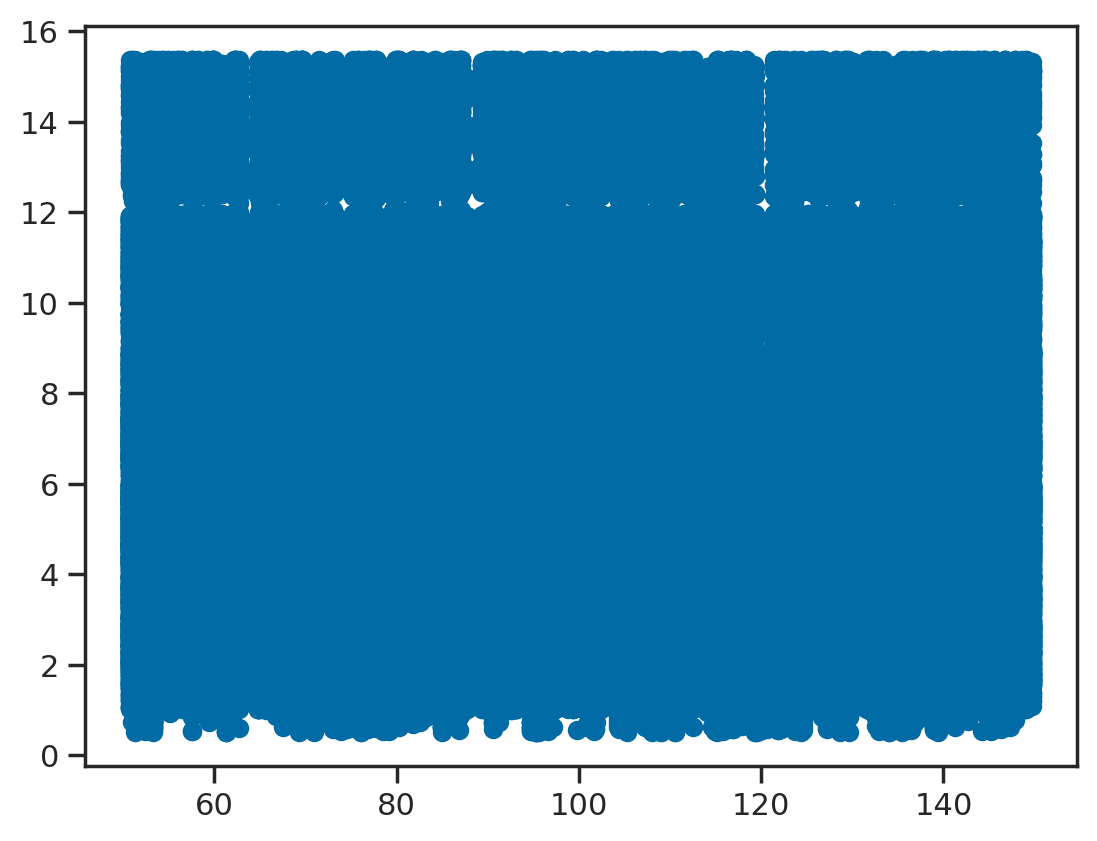

In [94]:
plt.scatter(df_train['cost'],df_train['store_sales(in millions)'])

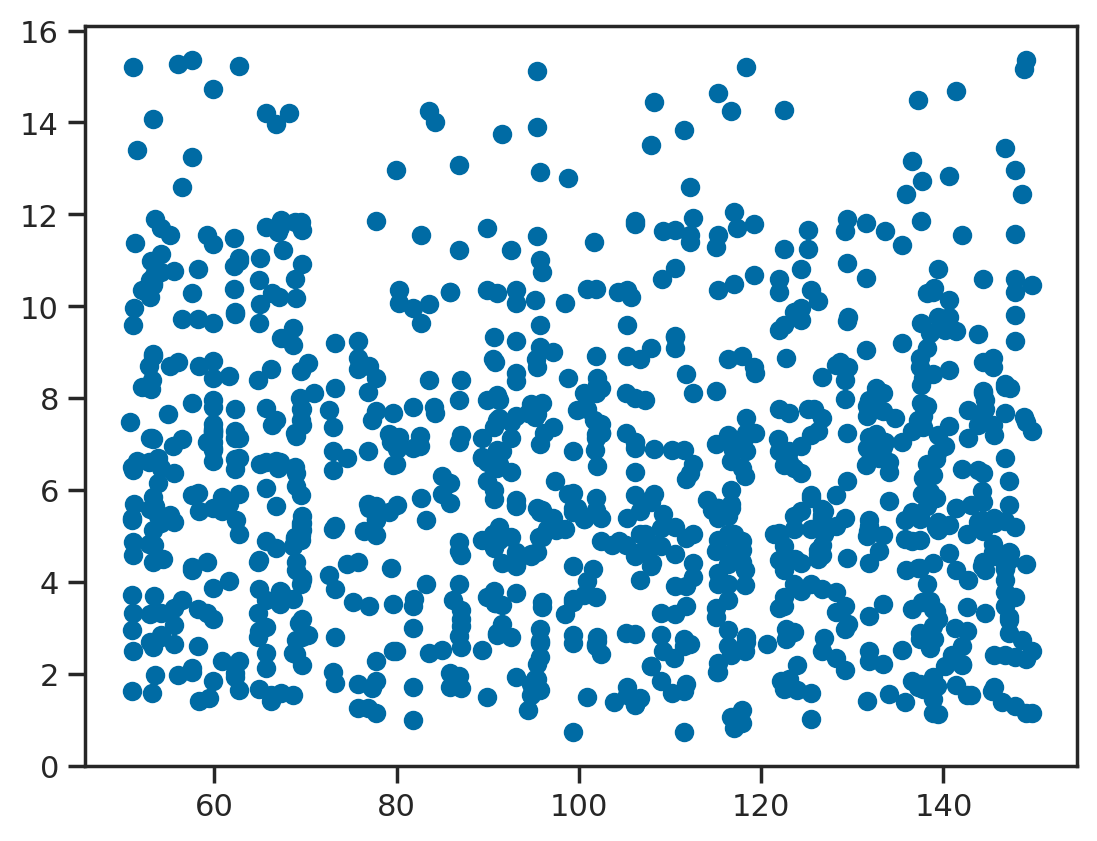

In [95]:
plt.scatter(df_train['cost'].sample(1000), df_train['store_sales(in millions)'].sample(1000))

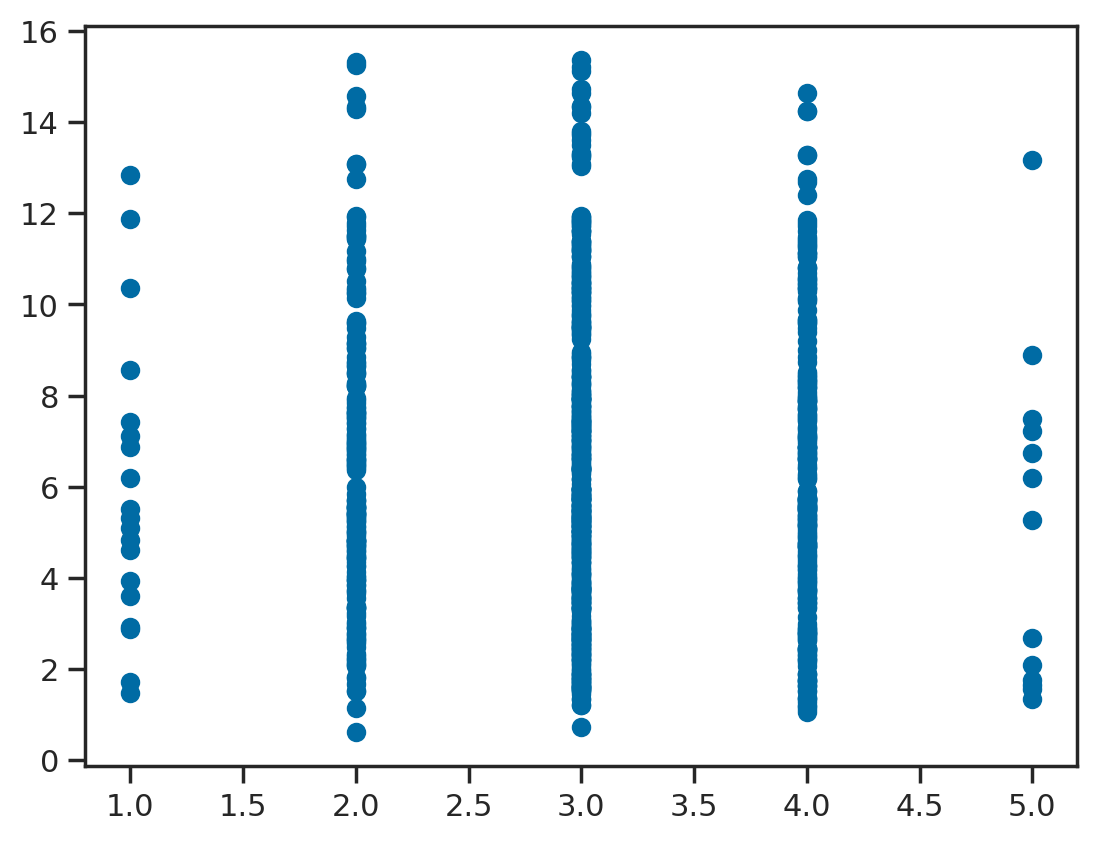

In [96]:
plt.scatter(df_train['unit_sales(in millions)'].sample(1000), df_train['store_sales(in millions)'].sample(1000))

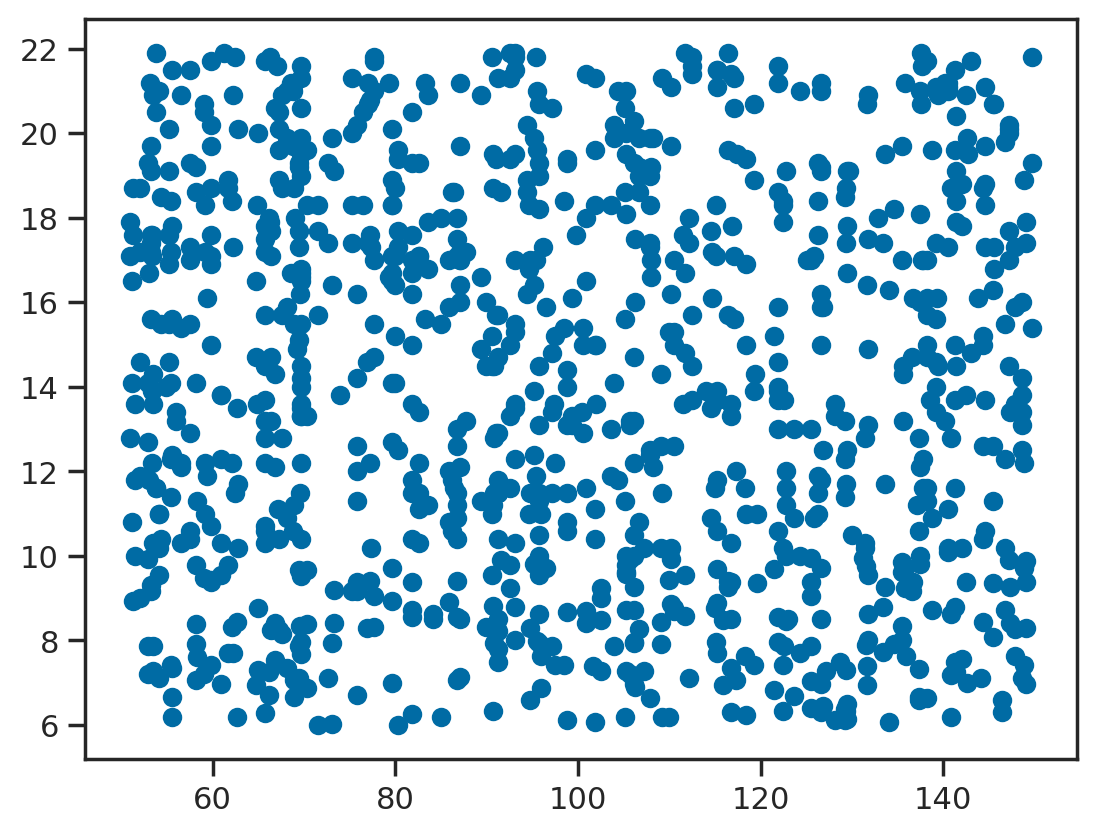

In [97]:
plt.scatter(df_train['cost'].sample(1000), df_train['gross_weight'].sample(1000))

<AxesSubplot:xlabel='cost', ylabel='store_sales(in millions)'>

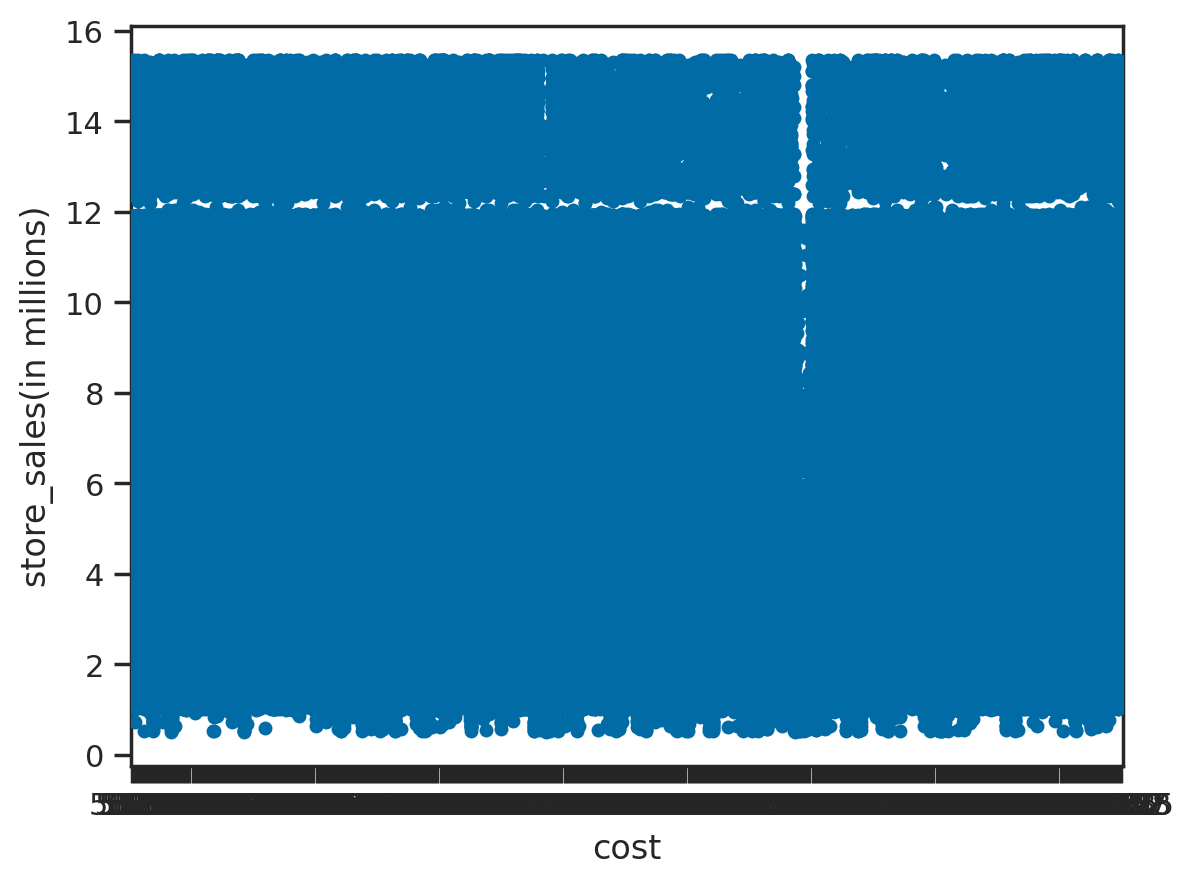

In [98]:
sns.stripplot(data = df_train, x = 'cost', y = 'store_sales(in millions)')

<AxesSubplot:xlabel='store_sales(in millions)', ylabel='cost'>

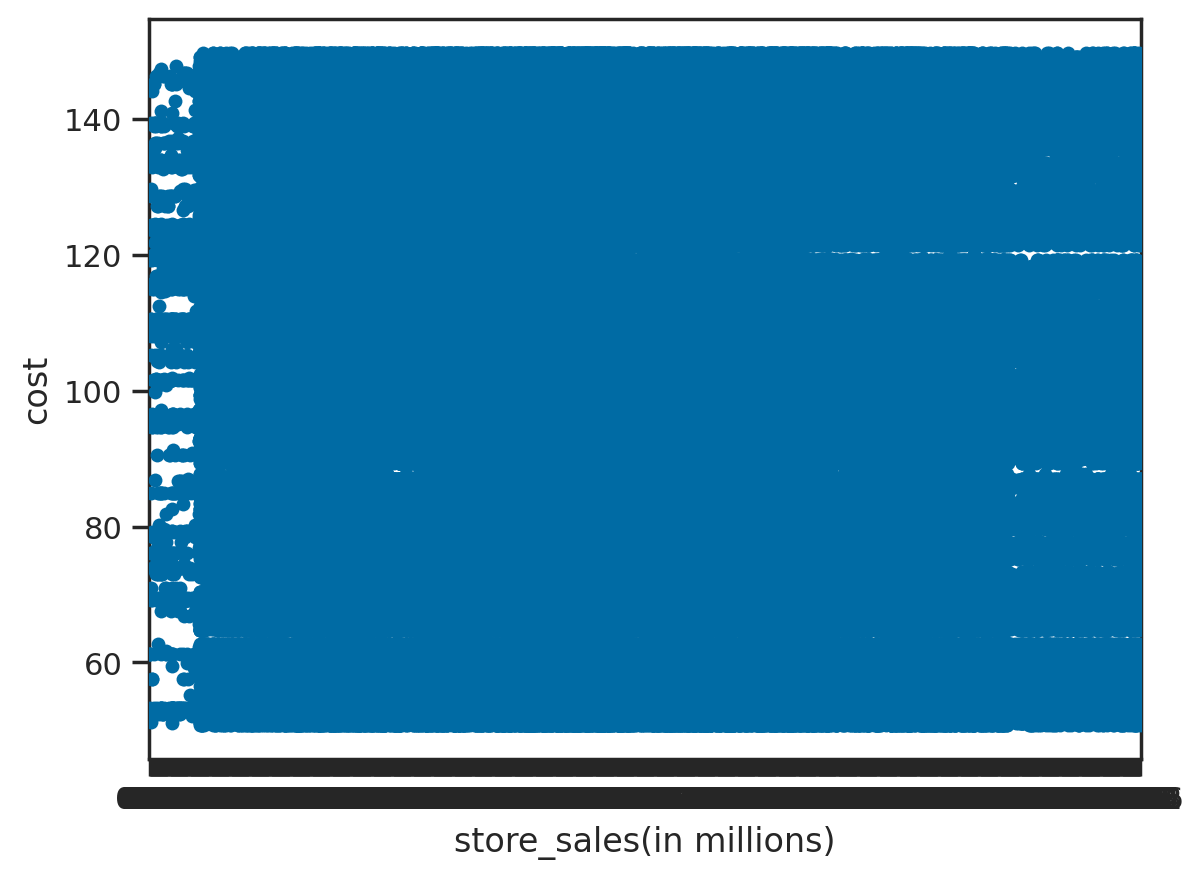

In [99]:
sns.stripplot(data = df_train, x = 'store_sales(in millions)', y = 'cost')

In [100]:
plt.style.use('tableau-colorblind10')

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'florist', 'cost'],
      dtype='object')

<AxesSubplot:xlabel='store_sales(in millions)'>

[Text(0.5, 0, 'store_sales(in millions)')]

<AxesSubplot:xlabel='store_sales(in millions)', ylabel='Density'>

[Text(0.5, 0, 'store_sales(in millions)')]

<AxesSubplot:xlabel='unit_sales(in millions)'>

[Text(0.5, 0, 'unit_sales(in millions)')]

<AxesSubplot:xlabel='unit_sales(in millions)', ylabel='Density'>

[Text(0.5, 0, 'unit_sales(in millions)')]

<AxesSubplot:xlabel='total_children'>

[Text(0.5, 0, 'total_children')]

<AxesSubplot:xlabel='total_children', ylabel='Density'>

[Text(0.5, 0, 'total_children')]

<AxesSubplot:xlabel='num_children_at_home'>

[Text(0.5, 0, 'num_children_at_home')]

<AxesSubplot:xlabel='num_children_at_home', ylabel='Density'>

[Text(0.5, 0, 'num_children_at_home')]

<AxesSubplot:xlabel='avg_cars_at home(approx).1'>

[Text(0.5, 0, 'avg_cars_at home(approx).1')]

<AxesSubplot:xlabel='avg_cars_at home(approx).1', ylabel='Density'>

[Text(0.5, 0, 'avg_cars_at home(approx).1')]

<AxesSubplot:xlabel='gross_weight'>

[Text(0.5, 0, 'gross_weight')]

<AxesSubplot:xlabel='gross_weight', ylabel='Density'>

[Text(0.5, 0, 'gross_weight')]

<AxesSubplot:xlabel='recyclable_package'>

[Text(0.5, 0, 'recyclable_package')]

<AxesSubplot:xlabel='recyclable_package', ylabel='Density'>

[Text(0.5, 0, 'recyclable_package')]

<AxesSubplot:xlabel='low_fat'>

[Text(0.5, 0, 'low_fat')]

<AxesSubplot:xlabel='low_fat', ylabel='Density'>

[Text(0.5, 0, 'low_fat')]

<AxesSubplot:xlabel='units_per_case'>

[Text(0.5, 0, 'units_per_case')]

<AxesSubplot:xlabel='units_per_case', ylabel='Density'>

[Text(0.5, 0, 'units_per_case')]

<AxesSubplot:xlabel='store_sqft'>

[Text(0.5, 0, 'store_sqft')]

<AxesSubplot:xlabel='store_sqft', ylabel='Density'>

[Text(0.5, 0, 'store_sqft')]

<AxesSubplot:xlabel='coffee_bar'>

[Text(0.5, 0, 'coffee_bar')]

<AxesSubplot:xlabel='coffee_bar', ylabel='Density'>

[Text(0.5, 0, 'coffee_bar')]

<AxesSubplot:xlabel='video_store'>

[Text(0.5, 0, 'video_store')]

<AxesSubplot:xlabel='video_store', ylabel='Density'>

[Text(0.5, 0, 'video_store')]

<AxesSubplot:xlabel='salad_bar'>

[Text(0.5, 0, 'salad_bar')]

<AxesSubplot:xlabel='salad_bar', ylabel='Density'>

[Text(0.5, 0, 'salad_bar')]

<AxesSubplot:xlabel='florist'>

[Text(0.5, 0, 'florist')]

<AxesSubplot:xlabel='florist', ylabel='Density'>

[Text(0.5, 0, 'florist')]

<AxesSubplot:xlabel='cost'>

[Text(0.5, 0, 'cost')]

<AxesSubplot:xlabel='cost', ylabel='Density'>

[Text(0.5, 0, 'cost')]

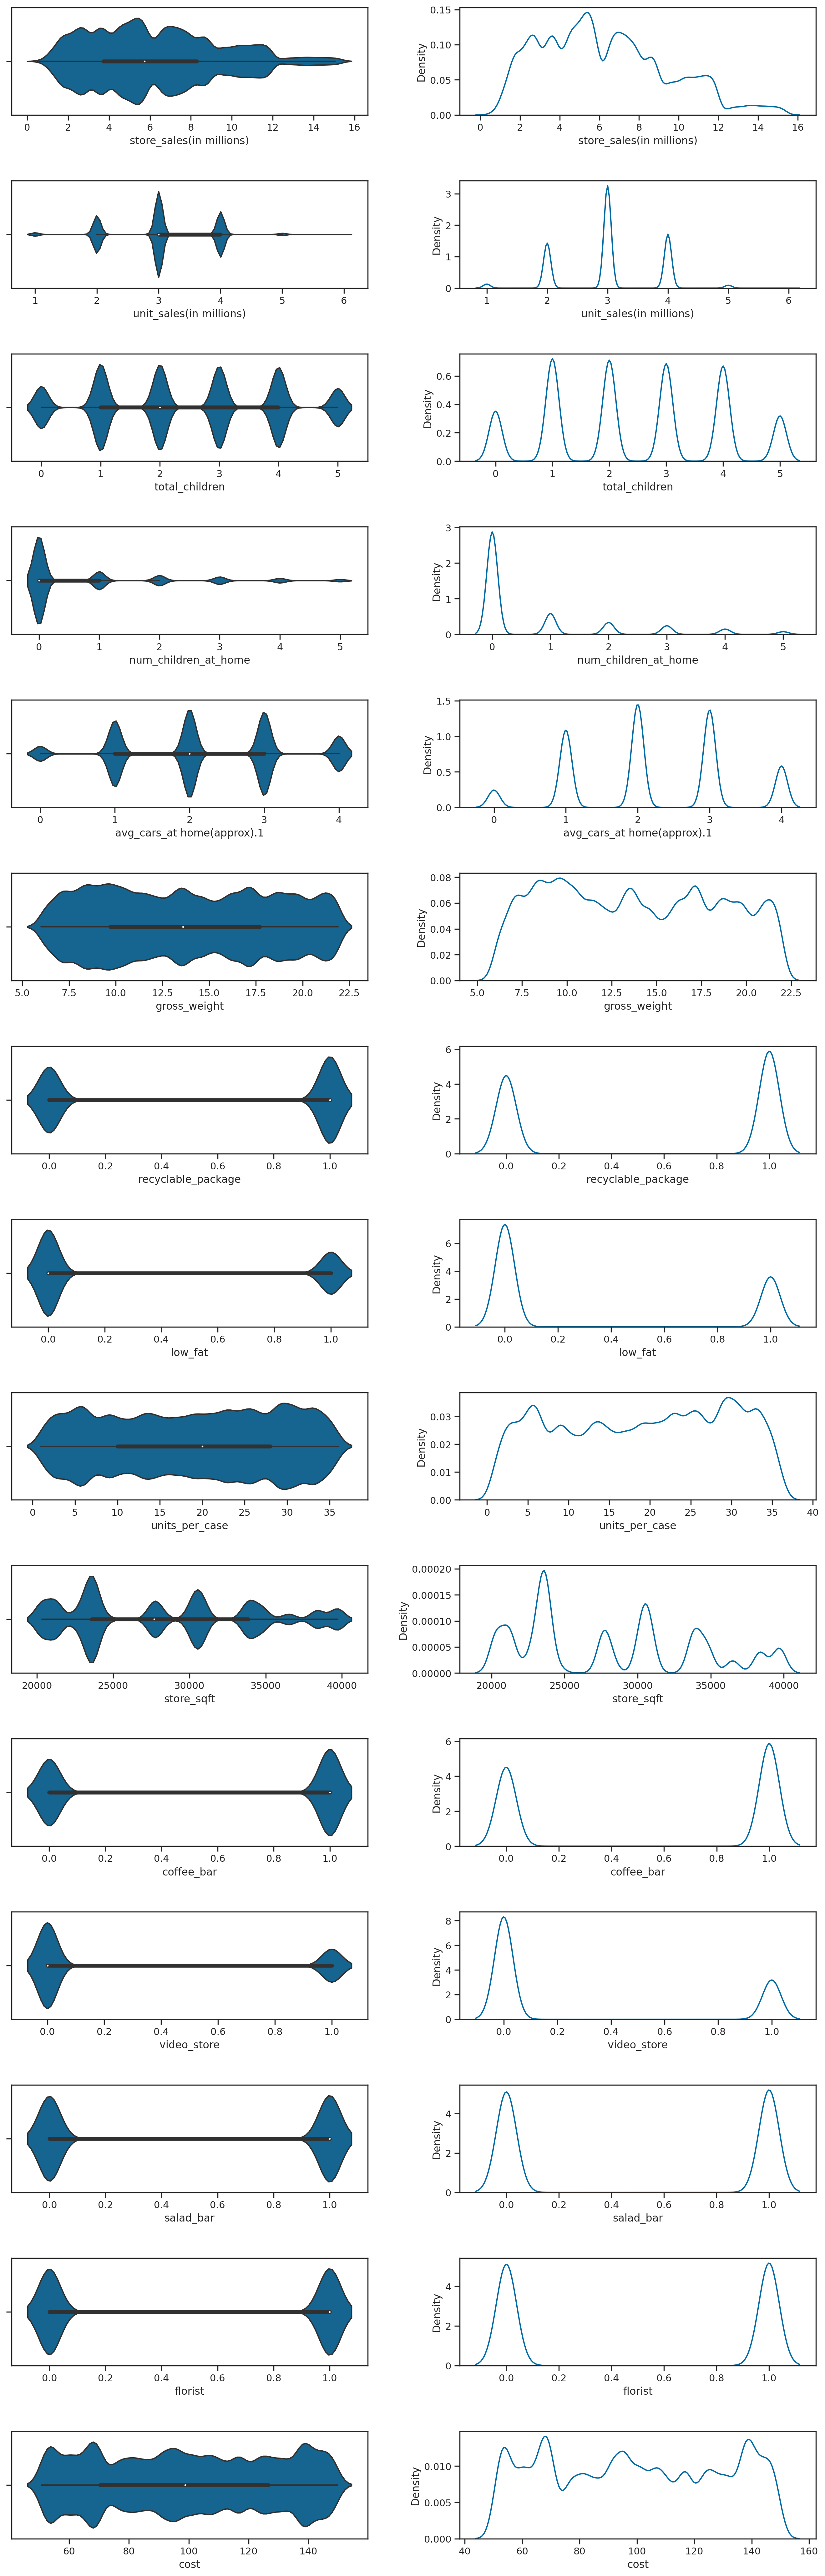

In [101]:
fig, ax = plt.subplots(nrows = len(df_train.columns), ncols = 2, figsize = (14,42))
cols = df_train.columns
cols

for col in range(len(df_train.columns)):
    sns.violinplot(x = df_train.iloc[:, col], ax = ax[col][0])
    ax[col][0].set(xlabel = df_train.columns[col])
    
    sns.kdeplot(data = df_train.iloc[:, col], ax = ax[col][1])
    ax[col][1].set(xlabel = df_train.columns[col])
    
plt.tight_layout(pad = 3)

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'store_sales(in millions)')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'unit_sales(in millions)')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'total_children')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'num_children_at_home')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'avg_cars_at home(approx).1')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'gross_weight')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'recyclable_package')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'low_fat')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'units_per_case')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'store_sqft')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'coffee_bar')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'video_store')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'salad_bar')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'florist')

<Figure size 1200x300 with 0 Axes>

Text(0.5, 1.0, 'cost')

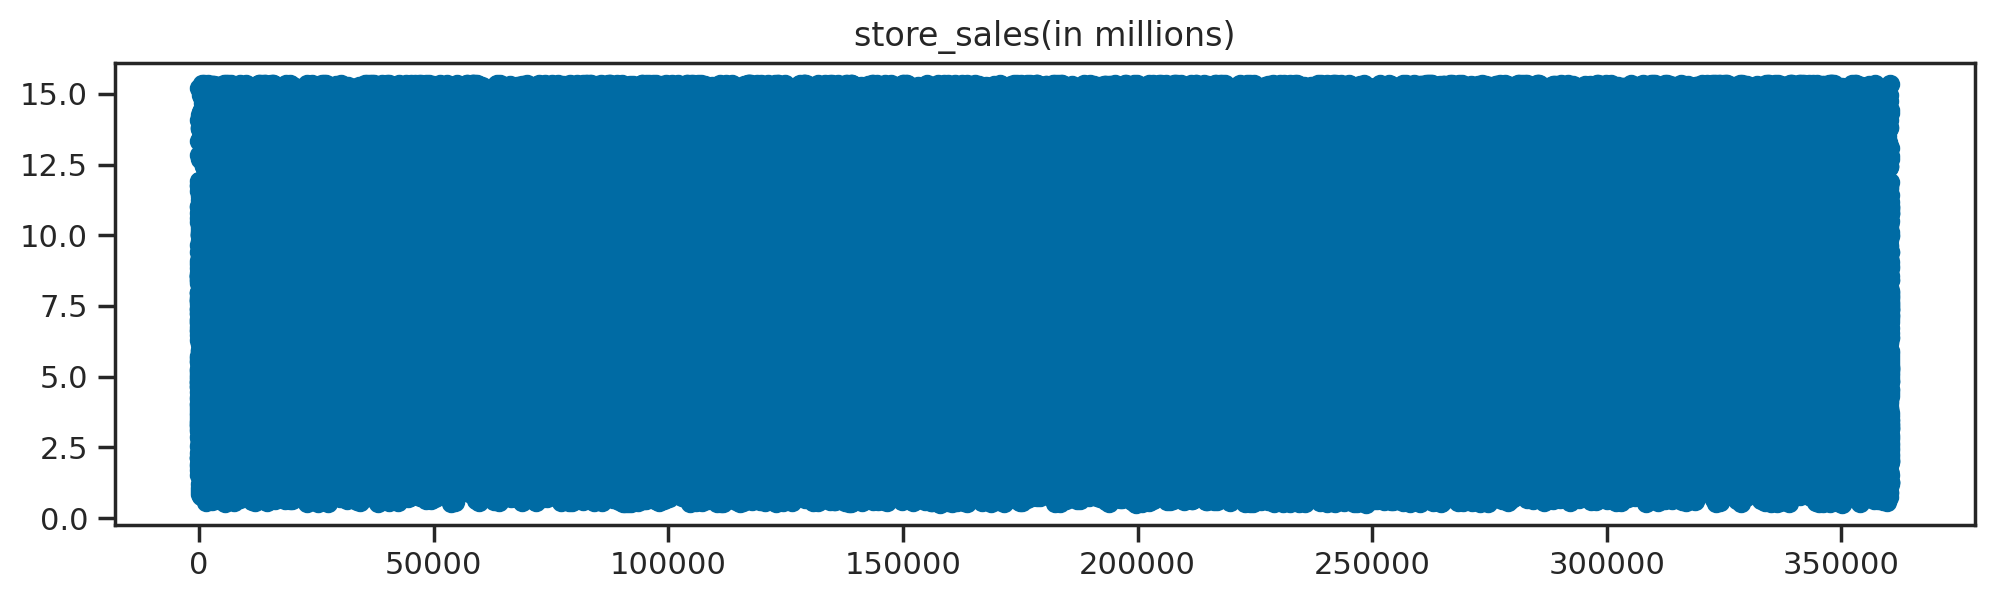

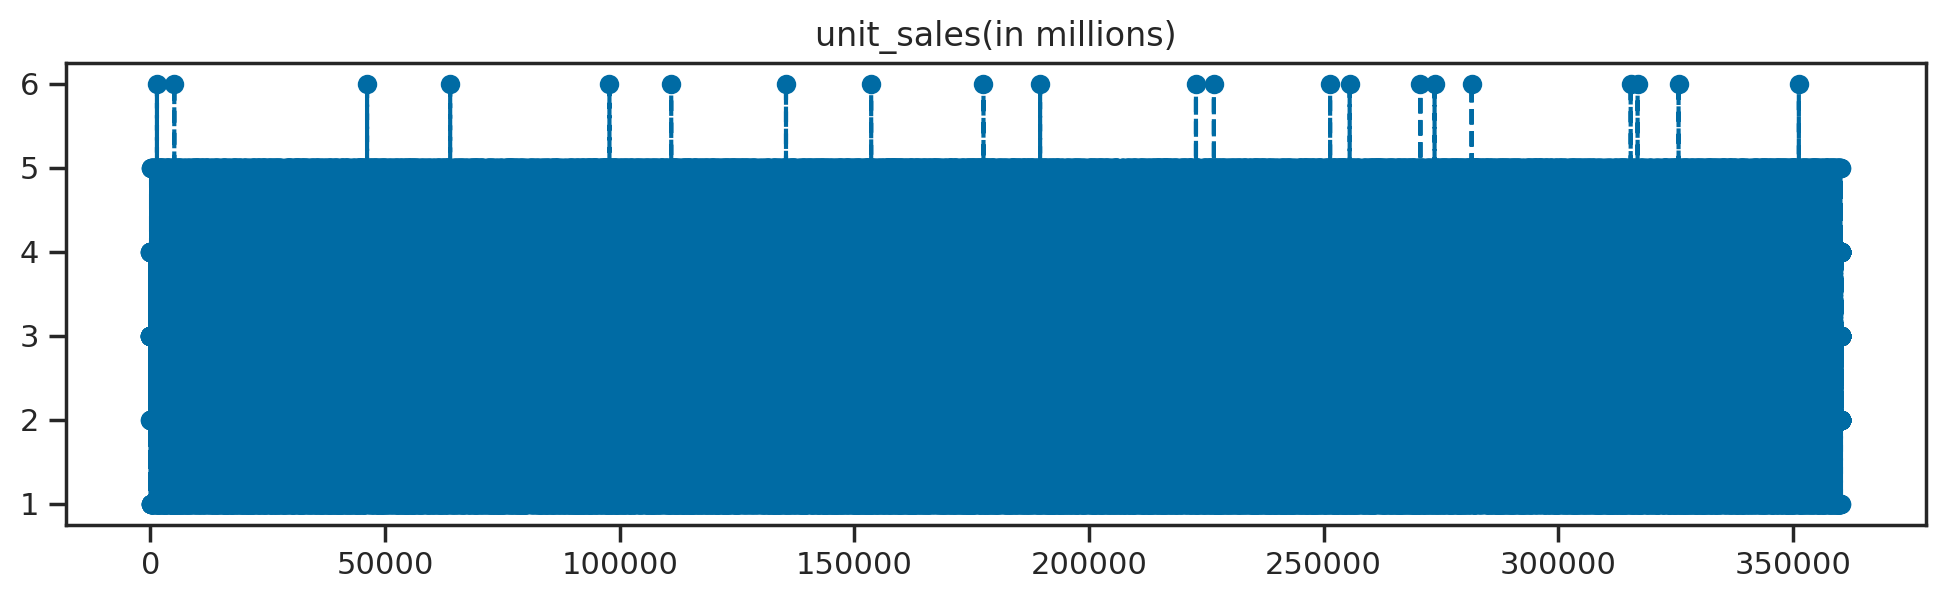

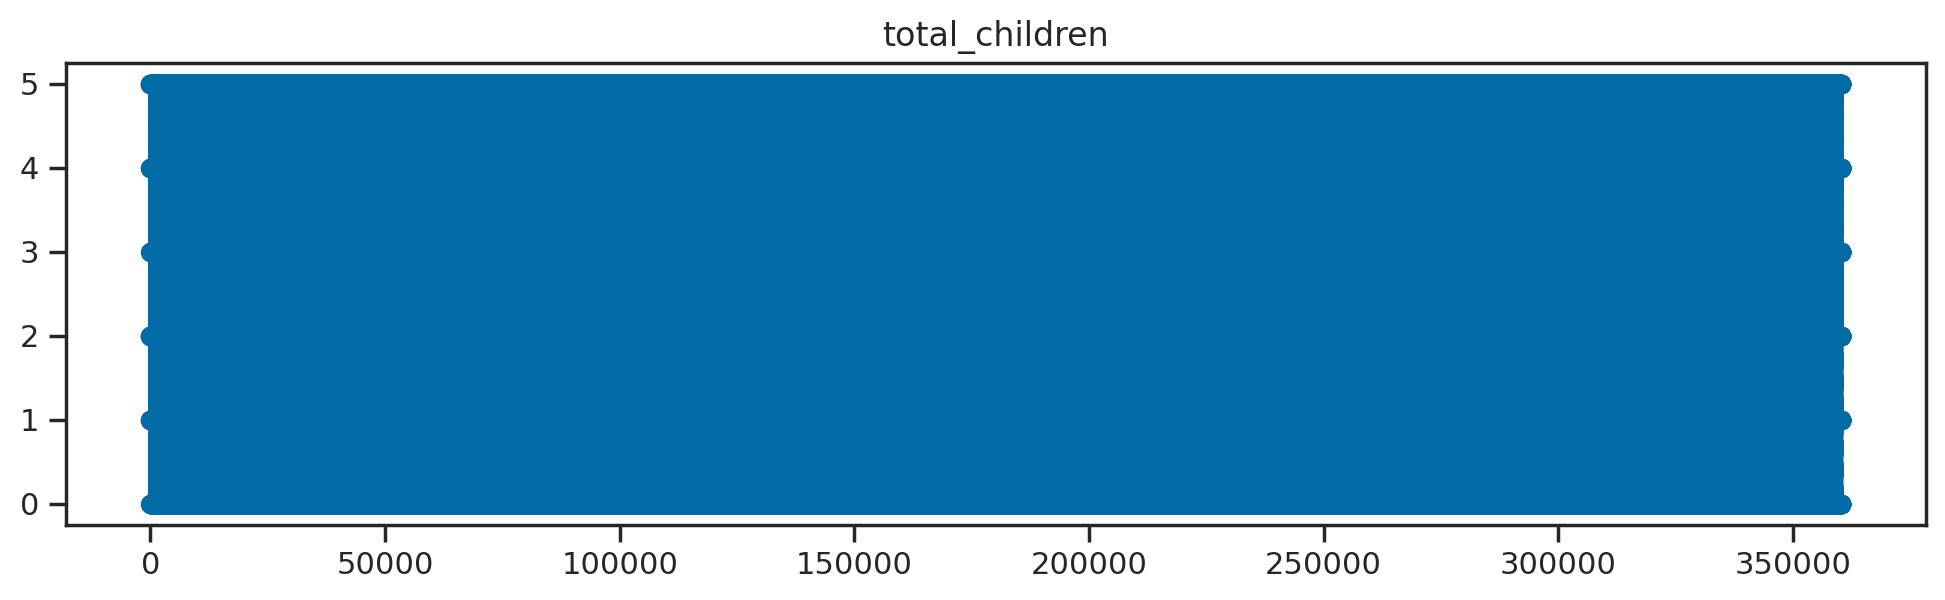

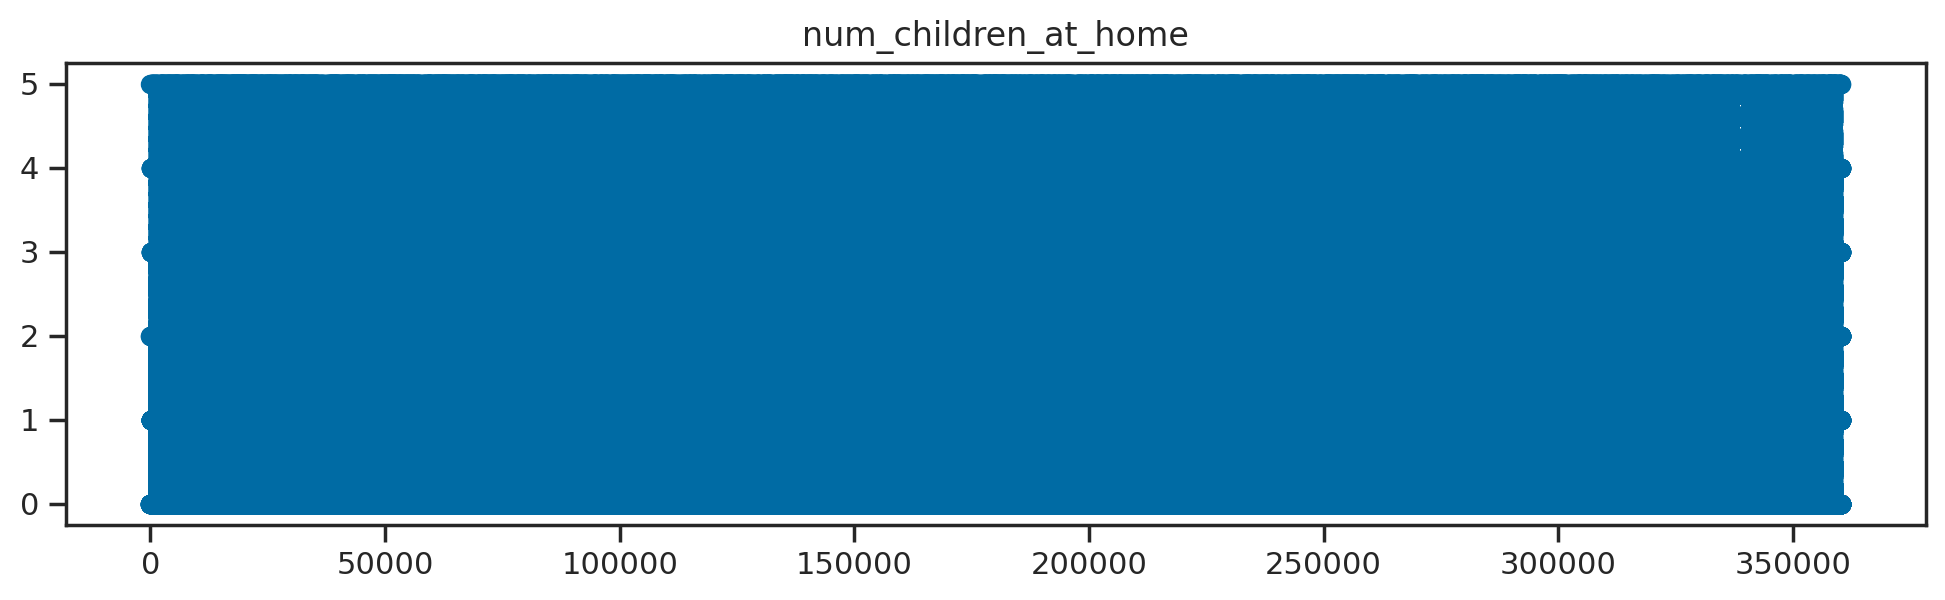

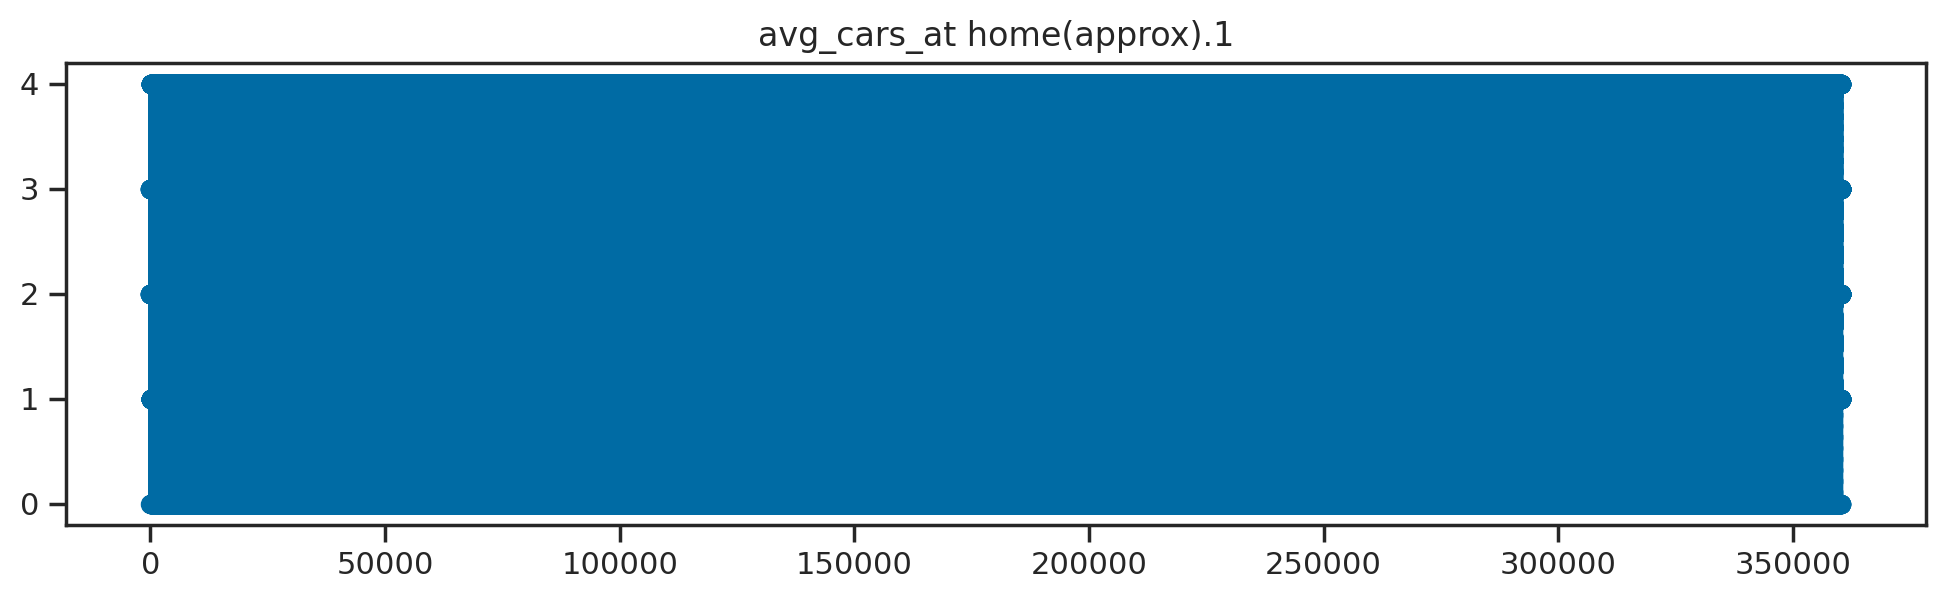

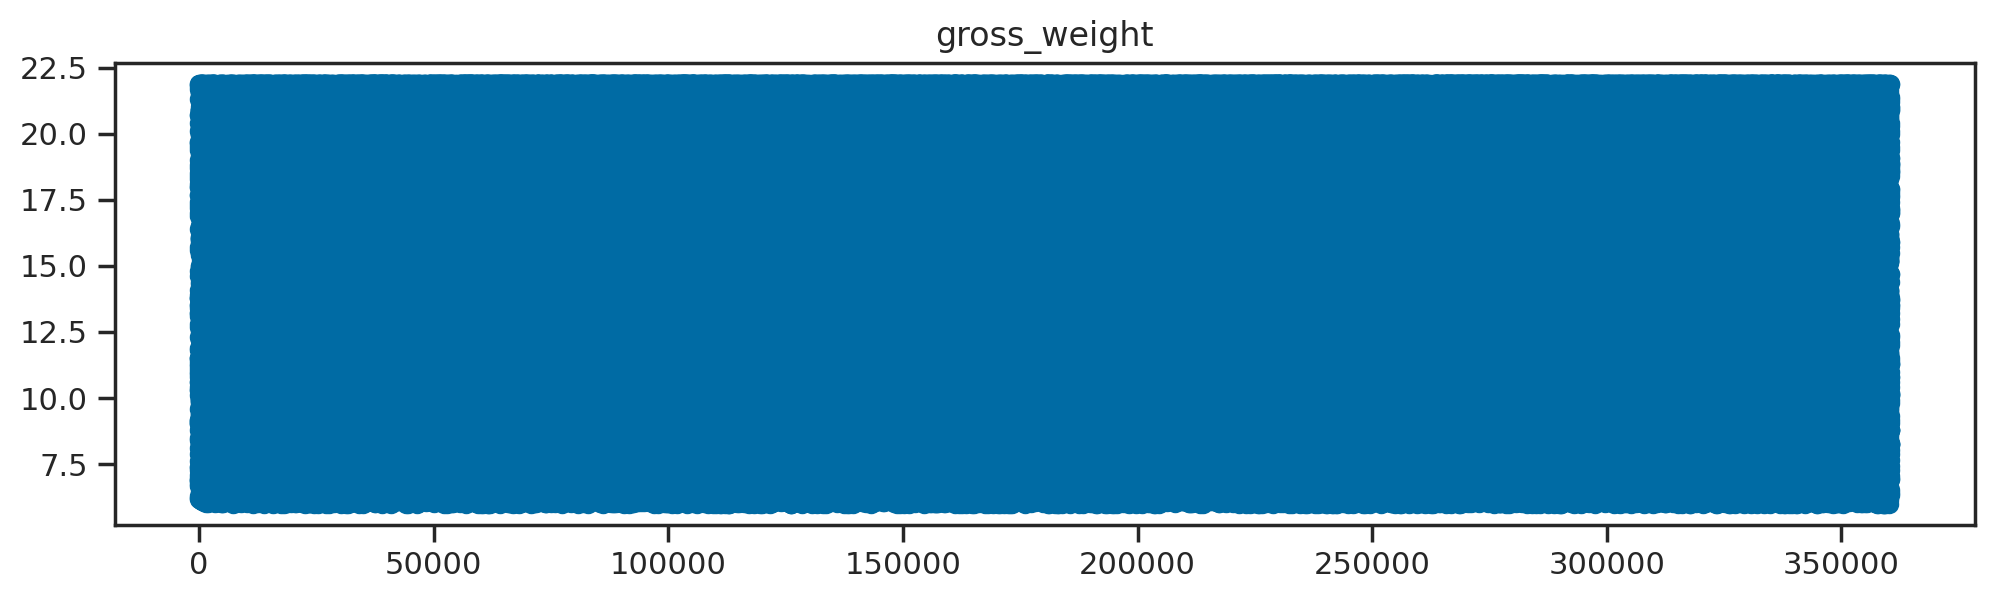

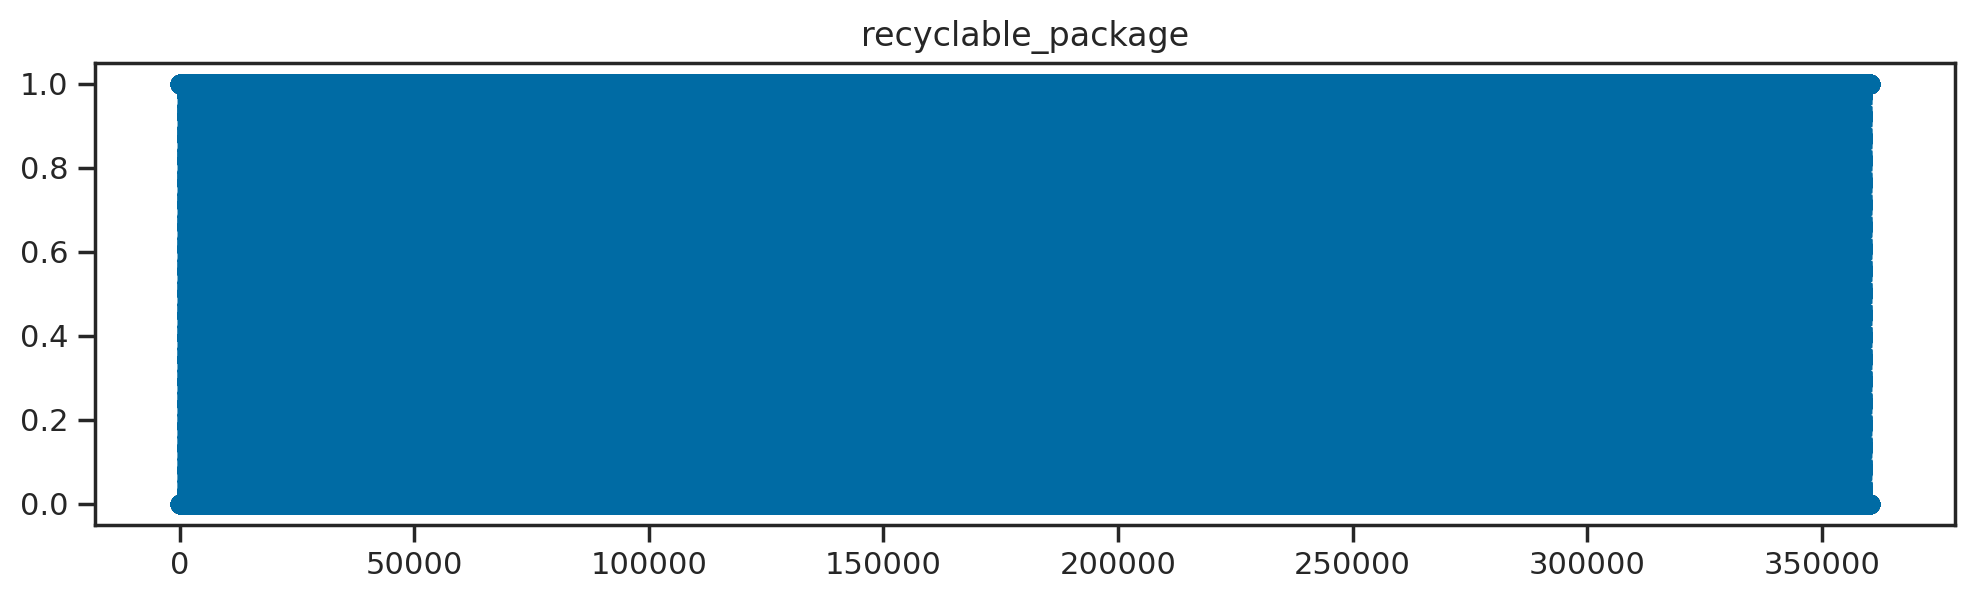

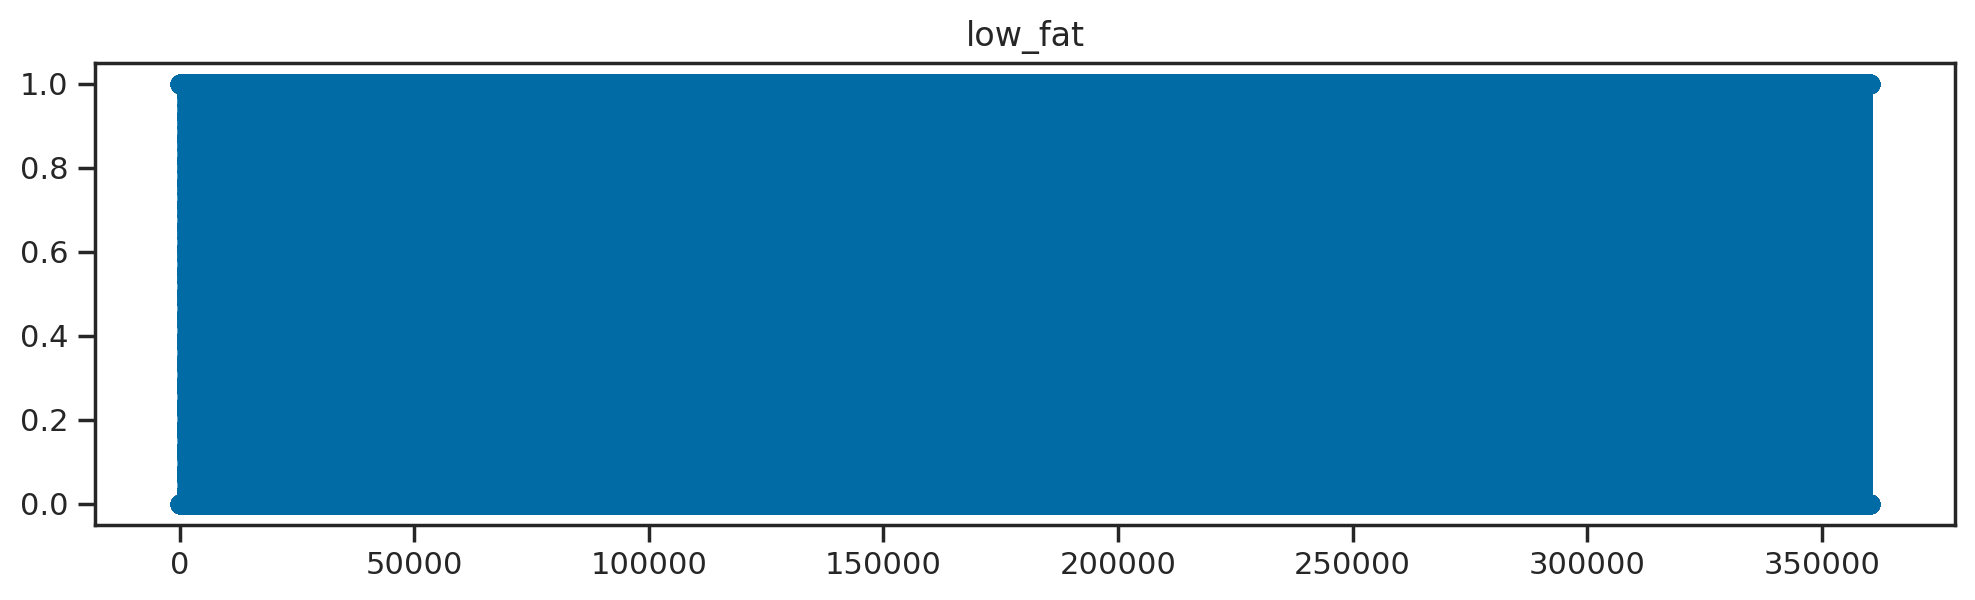

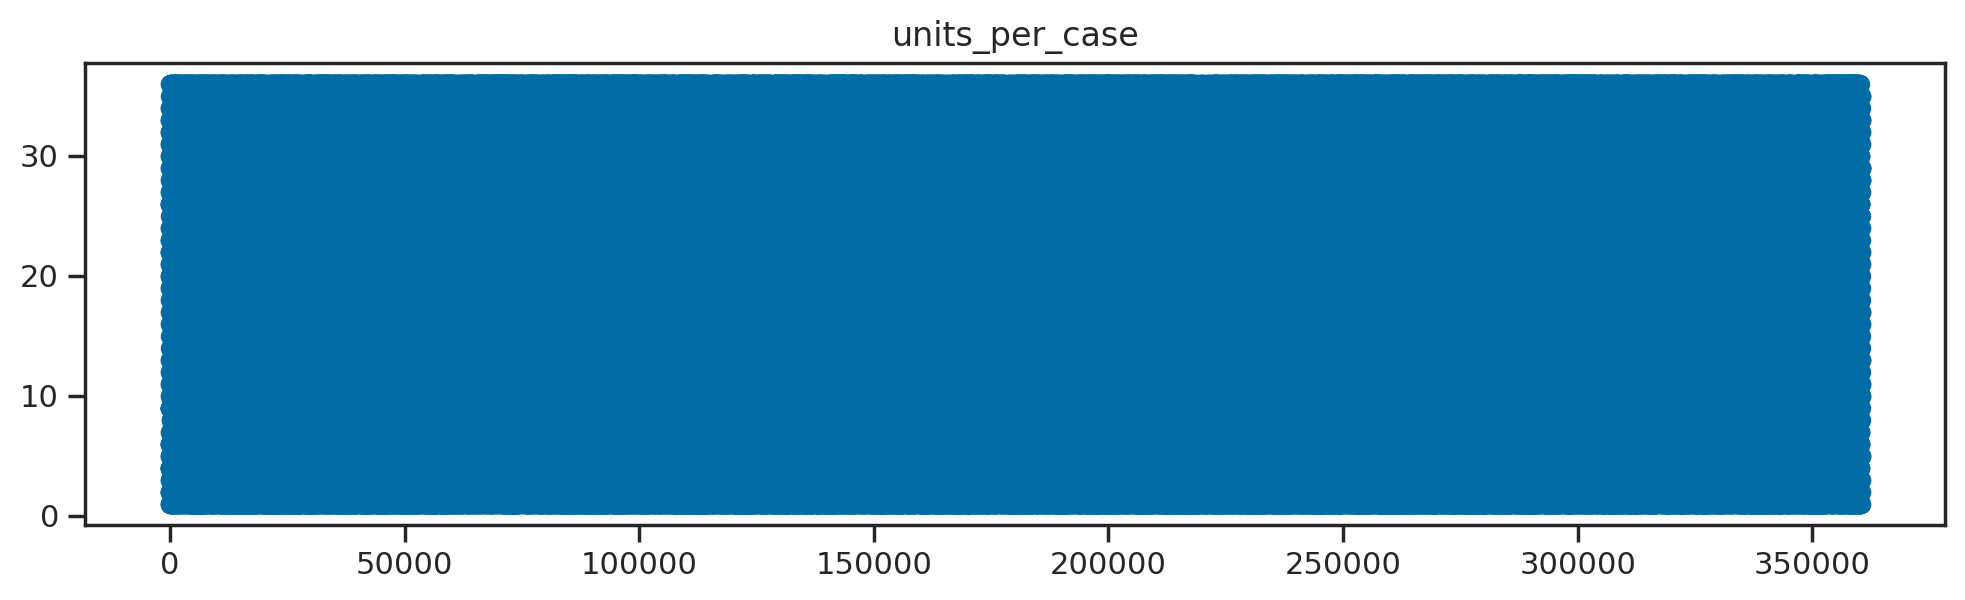

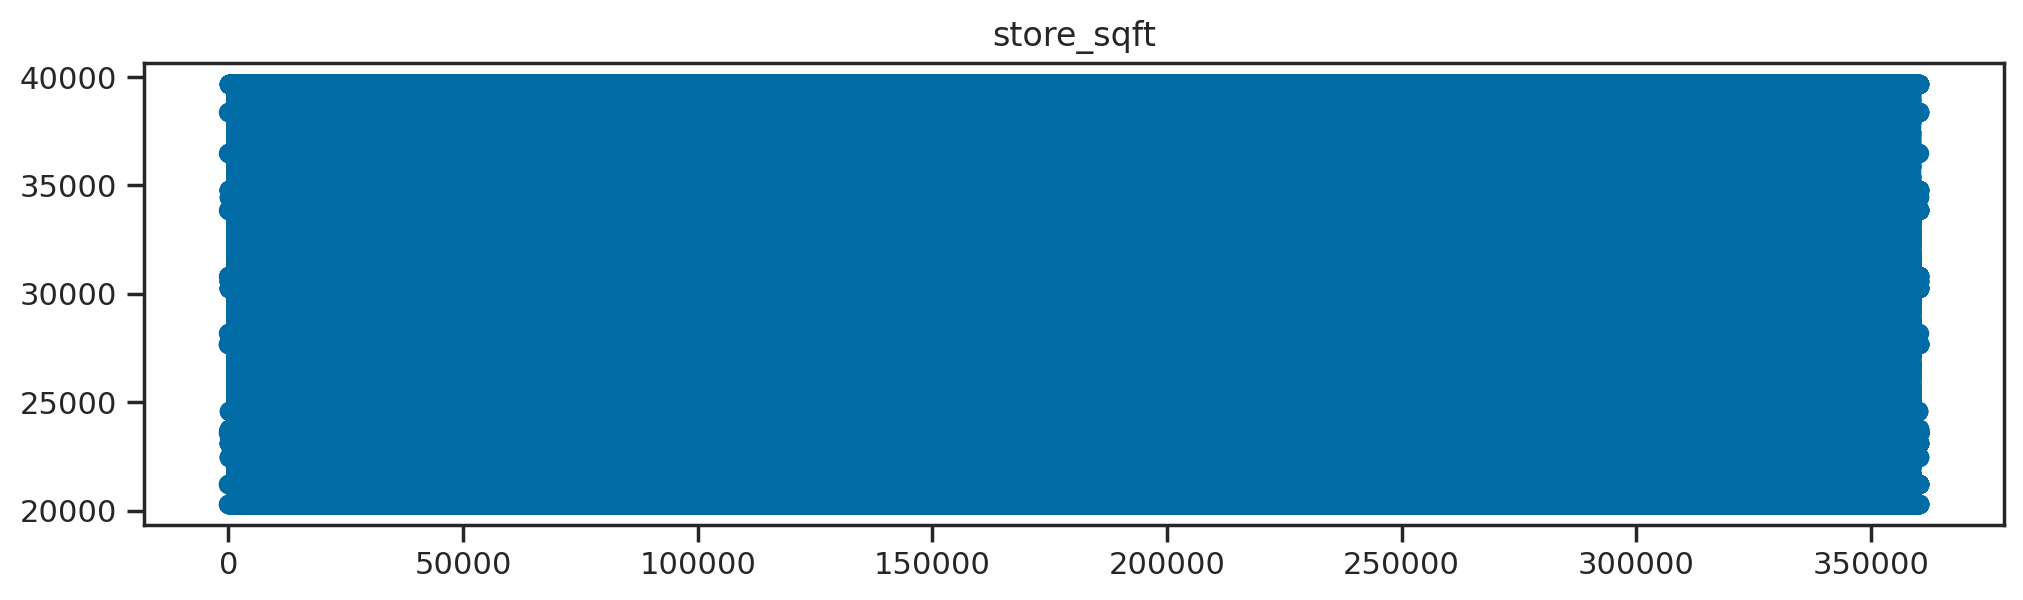

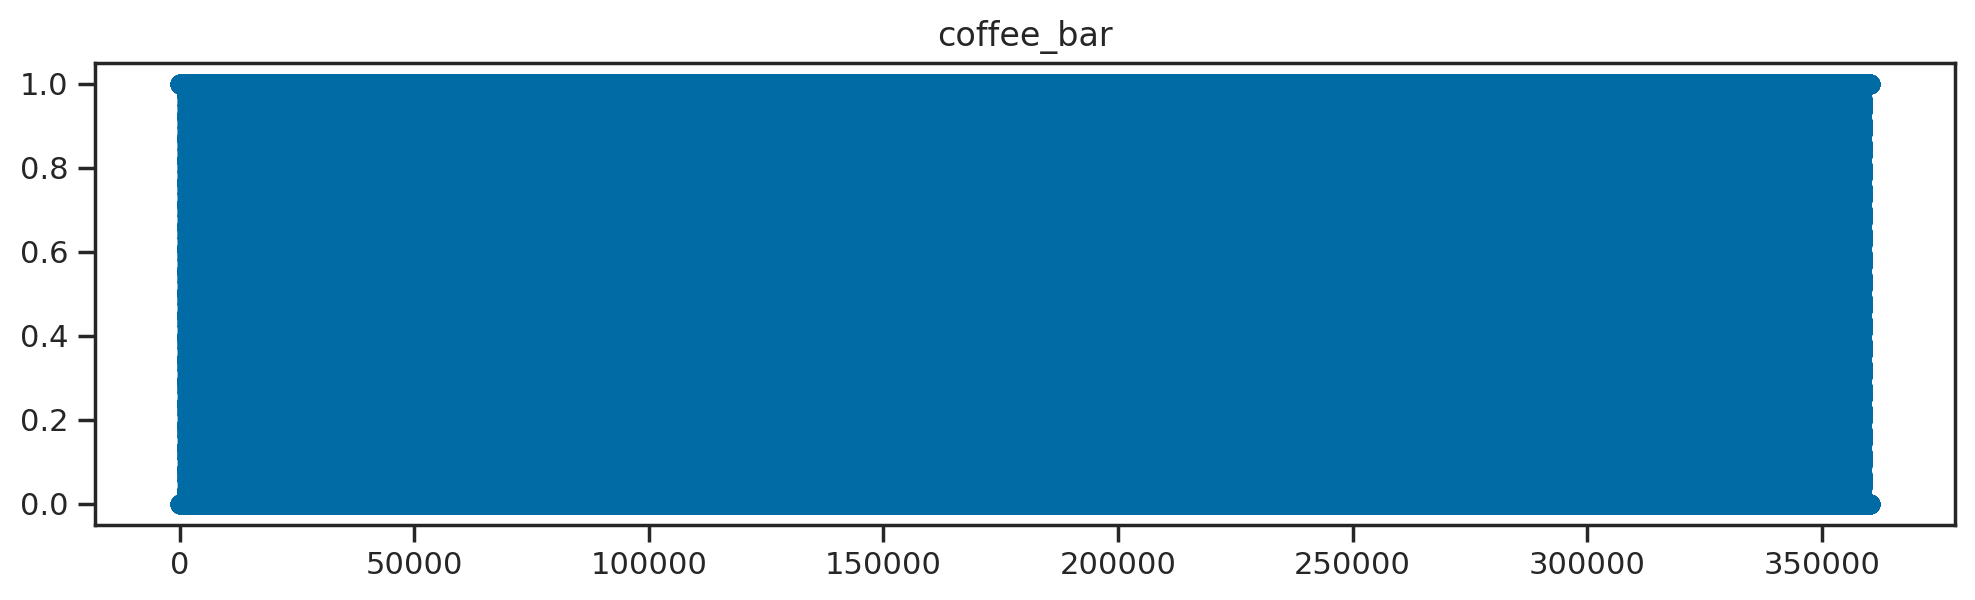

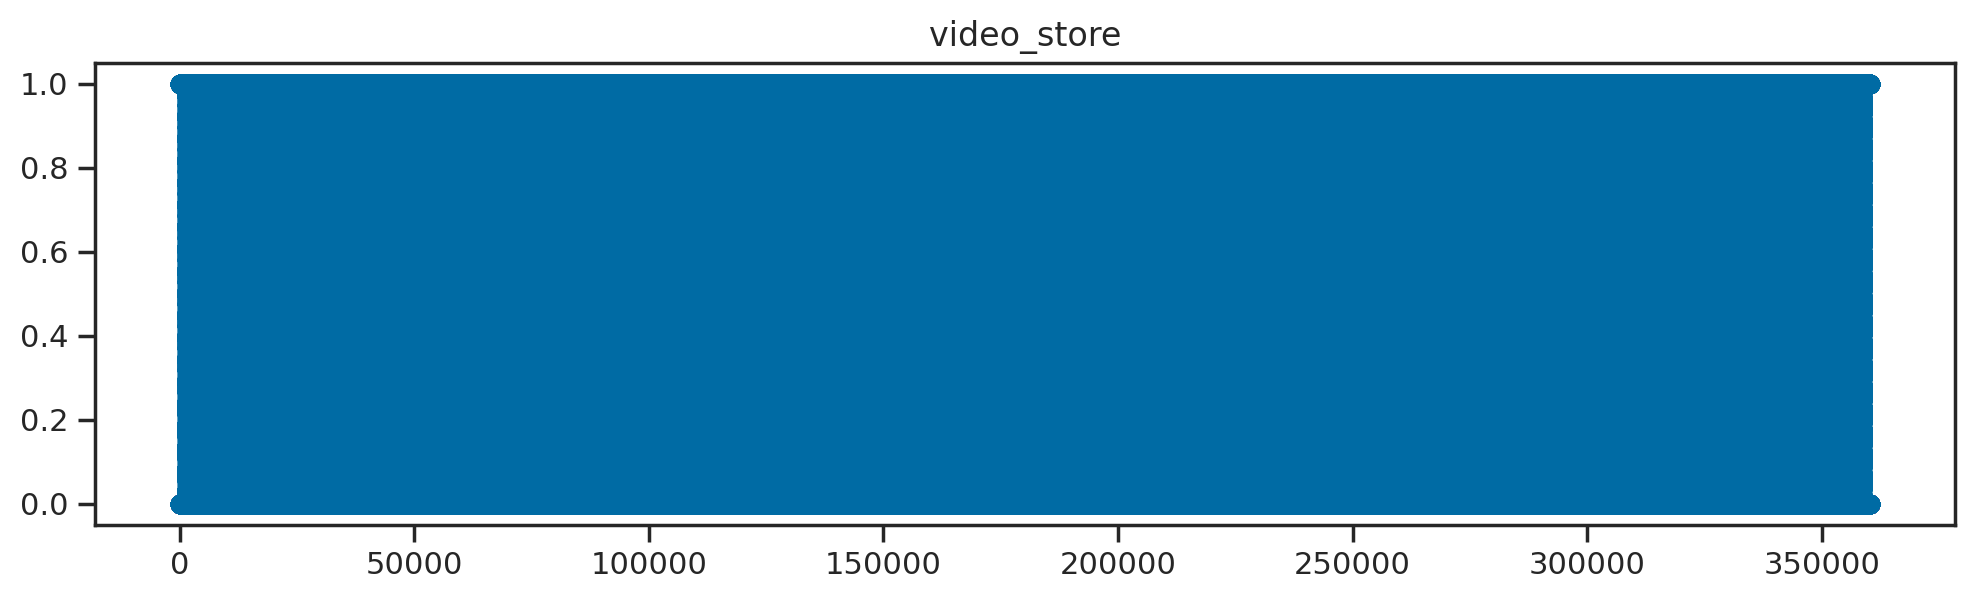

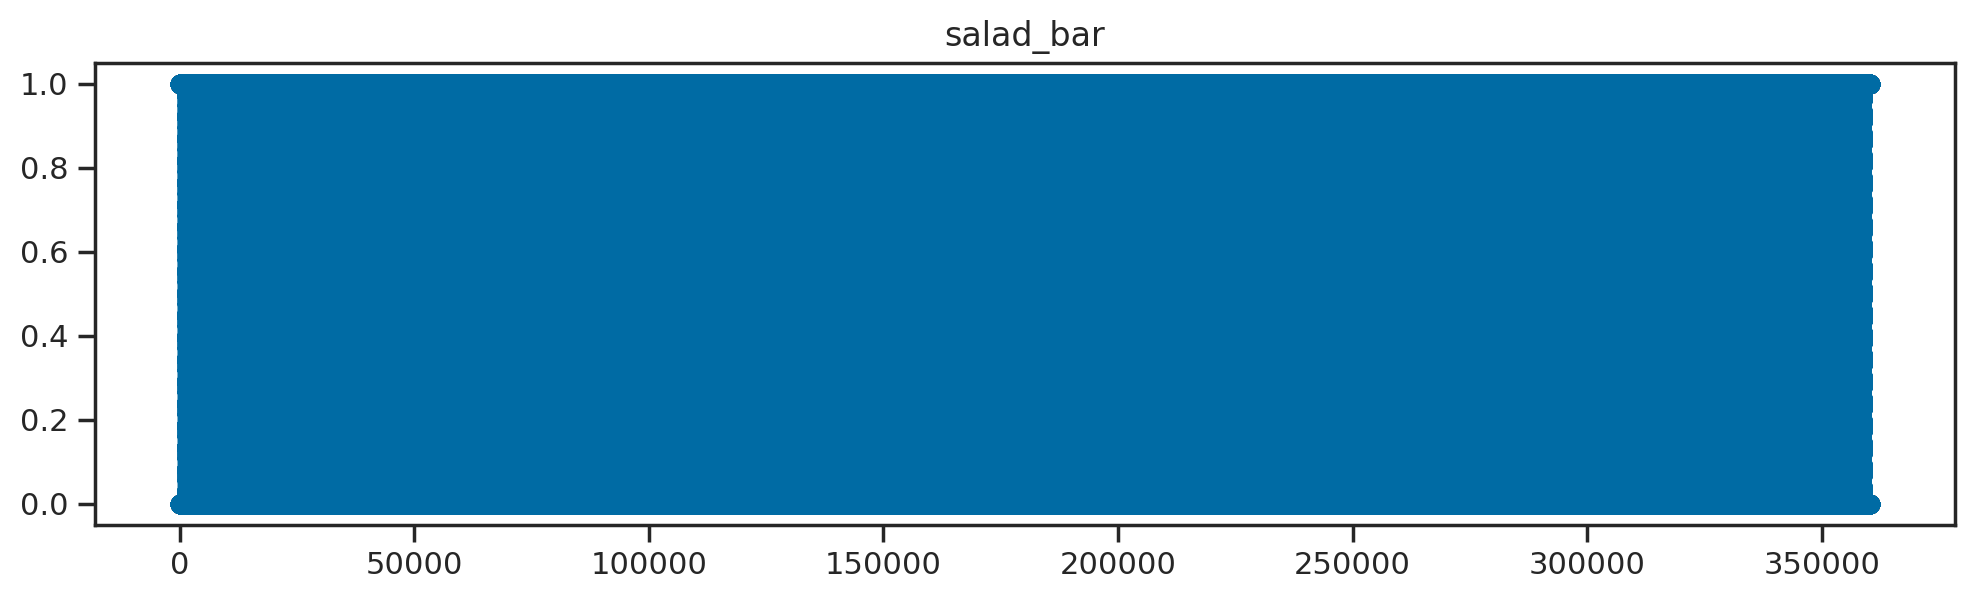

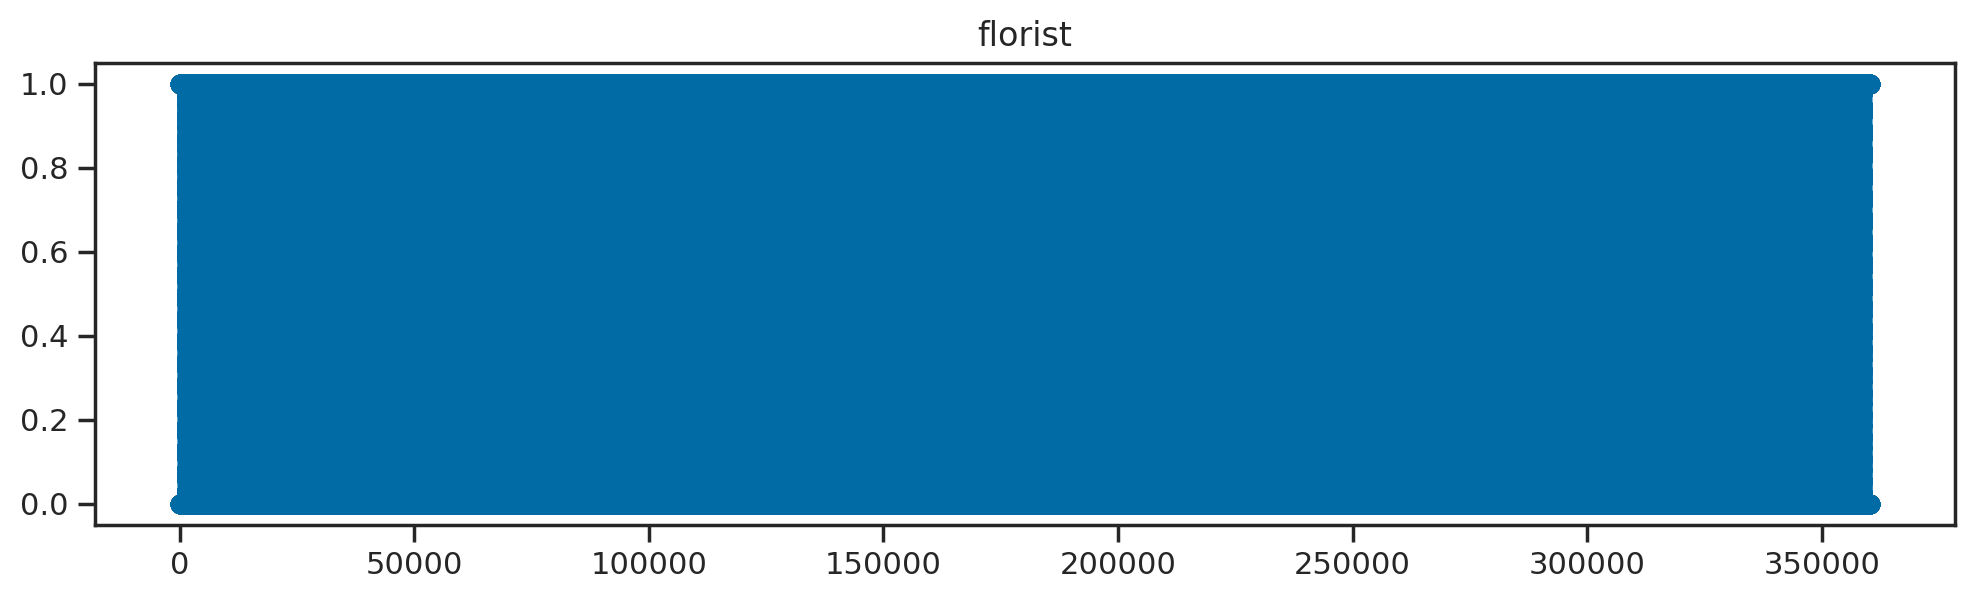

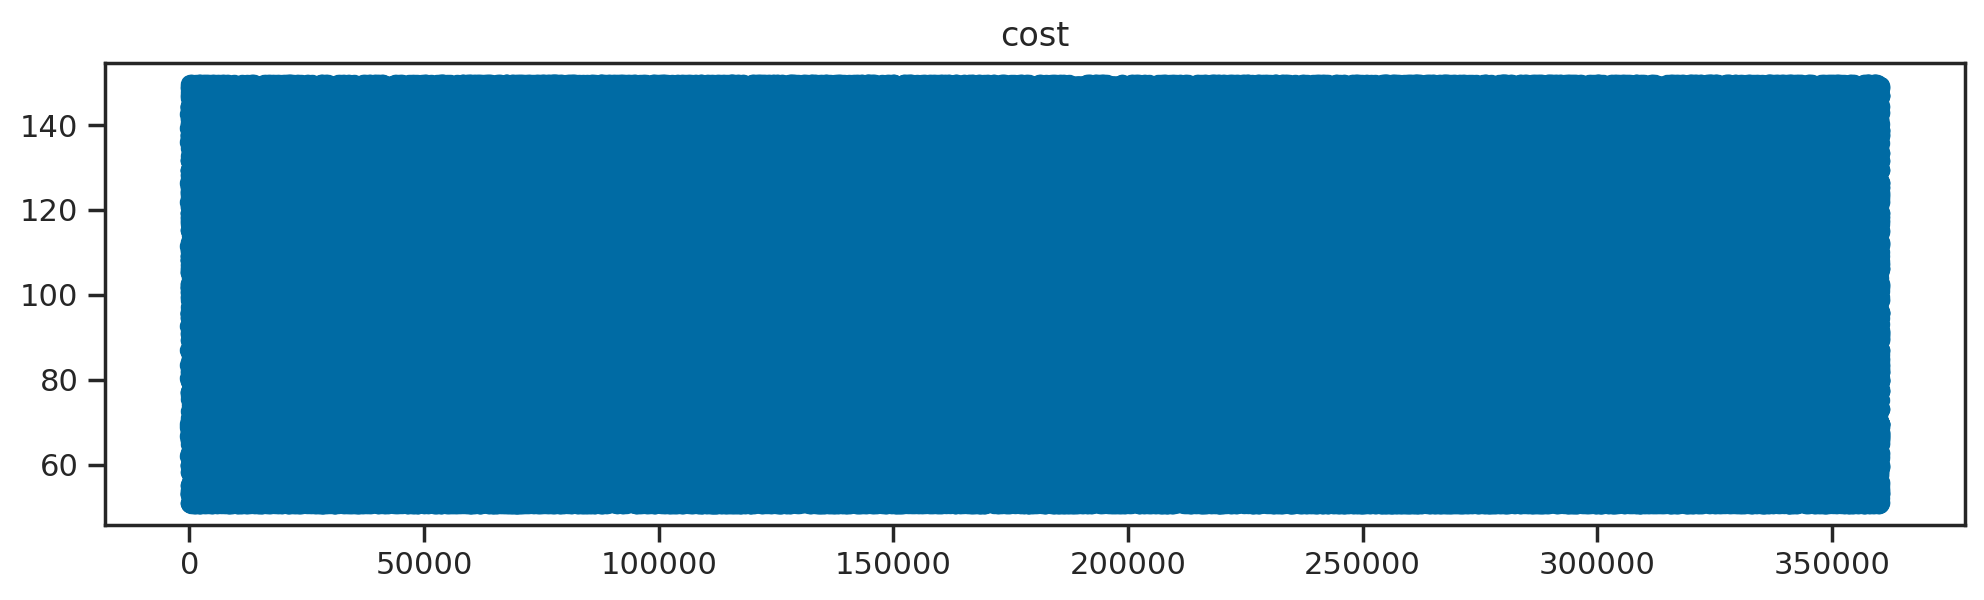

In [102]:
for i in df_train.columns:
    plt.figure(figsize=(12,3))
    plt.plot(df_train[i],'--o')
    plt.title(i)

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'florist', 'cost'],
      dtype='object')

<AxesSubplot:xlabel='store_sales(in millions)', ylabel='Count'>

[Text(0.5, 0, 'store_sales(in millions)')]

<AxesSubplot:>

[Text(0.5, 0, 'store_sales(in millions)')]

<AxesSubplot:xlabel='unit_sales(in millions)', ylabel='Count'>

[Text(0.5, 0, 'unit_sales(in millions)')]

<AxesSubplot:>

[Text(0.5, 0, 'unit_sales(in millions)')]

<AxesSubplot:xlabel='total_children', ylabel='Count'>

[Text(0.5, 0, 'total_children')]

<AxesSubplot:>

[Text(0.5, 0, 'total_children')]

<AxesSubplot:xlabel='num_children_at_home', ylabel='Count'>

[Text(0.5, 0, 'num_children_at_home')]

<AxesSubplot:>

[Text(0.5, 0, 'num_children_at_home')]

<AxesSubplot:xlabel='avg_cars_at home(approx).1', ylabel='Count'>

[Text(0.5, 0, 'avg_cars_at home(approx).1')]

<AxesSubplot:>

[Text(0.5, 0, 'avg_cars_at home(approx).1')]

<AxesSubplot:xlabel='gross_weight', ylabel='Count'>

[Text(0.5, 0, 'gross_weight')]

<AxesSubplot:>

[Text(0.5, 0, 'gross_weight')]

<AxesSubplot:xlabel='recyclable_package', ylabel='Count'>

[Text(0.5, 0, 'recyclable_package')]

<AxesSubplot:>

[Text(0.5, 0, 'recyclable_package')]

<AxesSubplot:xlabel='low_fat', ylabel='Count'>

[Text(0.5, 0, 'low_fat')]

<AxesSubplot:>

[Text(0.5, 0, 'low_fat')]

<AxesSubplot:xlabel='units_per_case', ylabel='Count'>

[Text(0.5, 0, 'units_per_case')]

<AxesSubplot:>

[Text(0.5, 0, 'units_per_case')]

<AxesSubplot:xlabel='store_sqft', ylabel='Count'>

[Text(0.5, 0, 'store_sqft')]

<AxesSubplot:>

[Text(0.5, 0, 'store_sqft')]

<AxesSubplot:xlabel='coffee_bar', ylabel='Count'>

[Text(0.5, 0, 'coffee_bar')]

<AxesSubplot:>

[Text(0.5, 0, 'coffee_bar')]

<AxesSubplot:xlabel='video_store', ylabel='Count'>

[Text(0.5, 0, 'video_store')]

<AxesSubplot:>

[Text(0.5, 0, 'video_store')]

<AxesSubplot:xlabel='salad_bar', ylabel='Count'>

[Text(0.5, 0, 'salad_bar')]

<AxesSubplot:>

[Text(0.5, 0, 'salad_bar')]

<AxesSubplot:xlabel='florist', ylabel='Count'>

[Text(0.5, 0, 'florist')]

<AxesSubplot:>

[Text(0.5, 0, 'florist')]

<AxesSubplot:xlabel='cost', ylabel='Count'>

[Text(0.5, 0, 'cost')]

<AxesSubplot:>

[Text(0.5, 0, 'cost')]

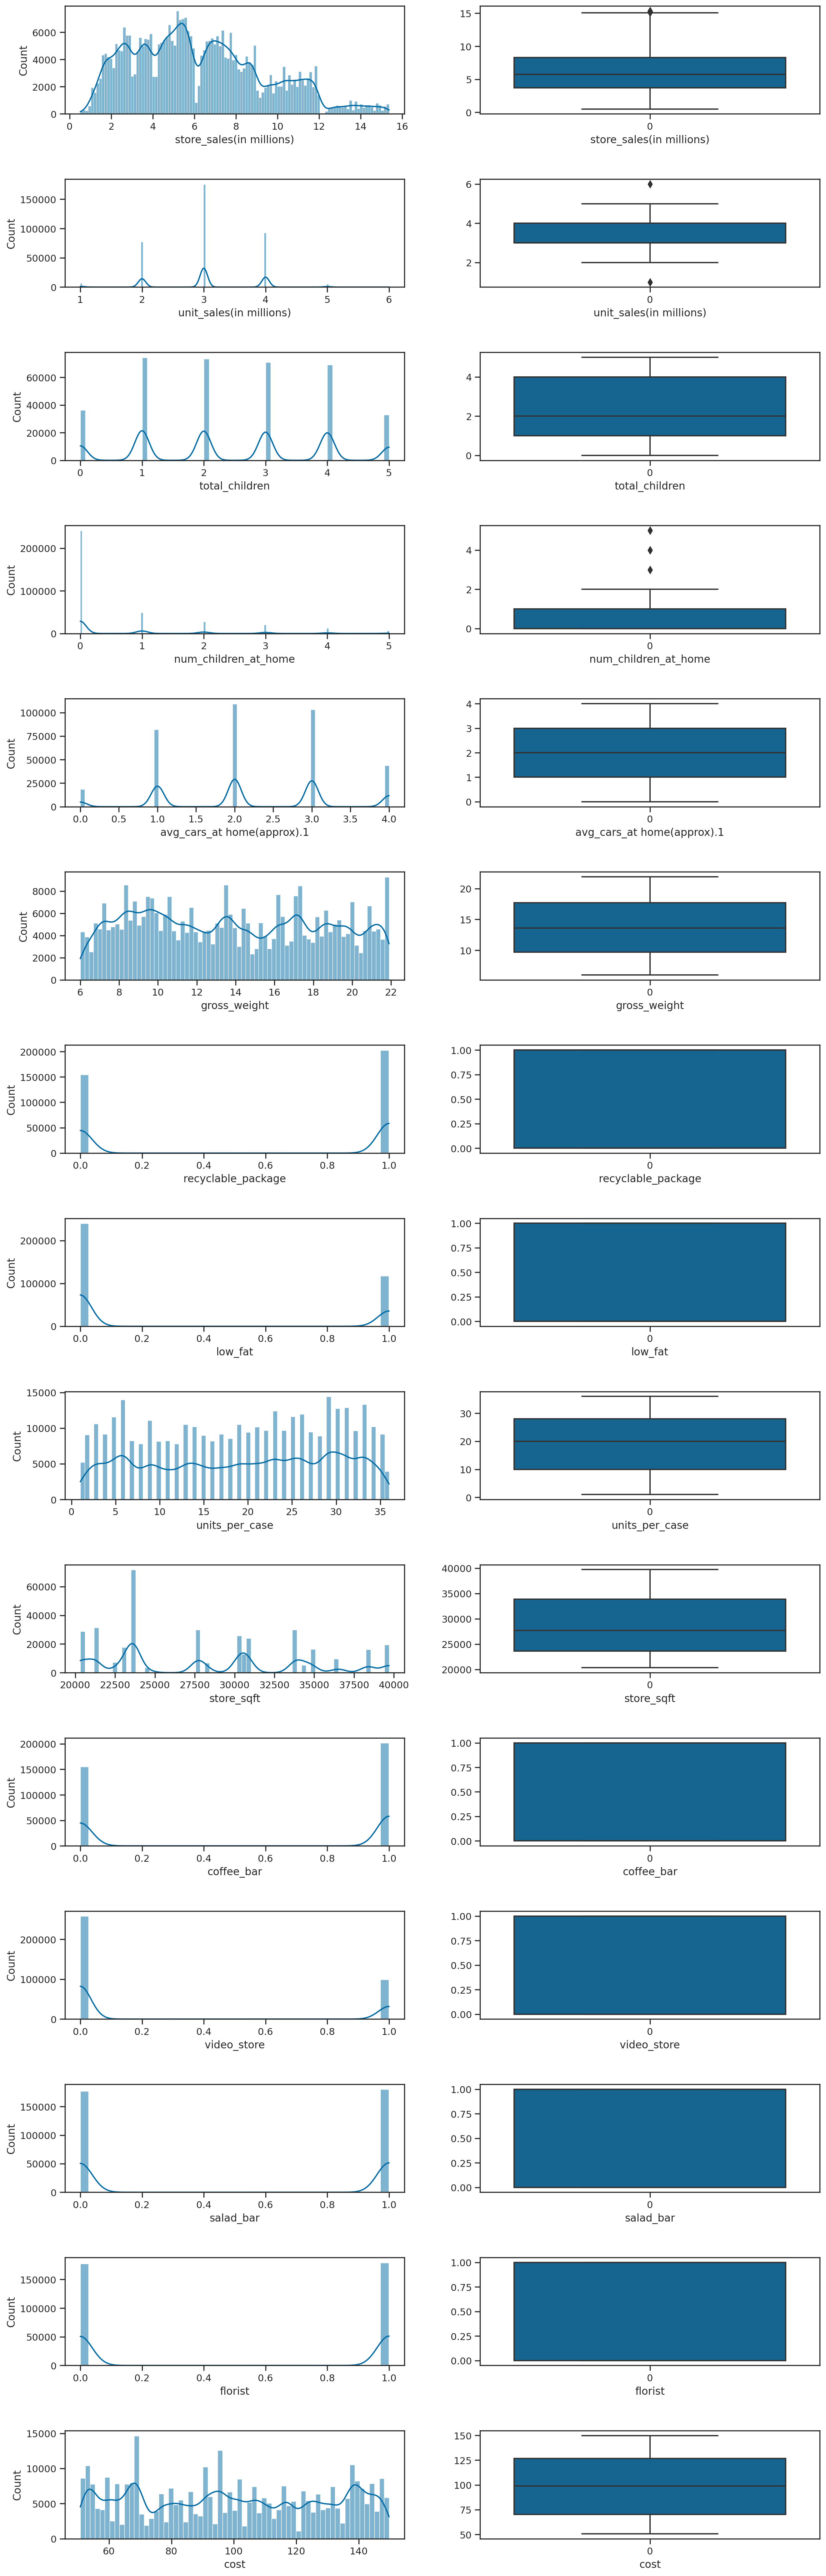

In [103]:
fig, ax = plt.subplots(nrows = len(df_train.columns), ncols = 2, figsize = (14,42))
cols = df_train.columns
cols
for col in range(len(df_train.columns)):
    sns.histplot(data = df_train.iloc[:, col], kde = True, ax = ax[col][0])
    ax[col][0].set(xlabel = df_train.columns[col])
    
    sns.boxplot(data = df_train.iloc[:, col], ax = ax[col][1])
    ax[col][1].set(xlabel = df_train.columns[col])
plt.tight_layout(pad = 3)

### Modelling

LinearRegression()
score(X_test, y_test)  0.021308520775325634
Average cv score  -878.5092248894649
mean_squared_log_error  0.31729876928755557

DecisionTreeRegressor()
score(X_test, y_test)  -0.7543952877587297
Average cv score  -1582.673320991187
mean_squared_log_error  0.4192263102308189

RandomForestRegressor()
score(X_test, y_test)  0.052265334182957424
Average cv score  -847.6859865519696
mean_squared_log_error  0.31017786298736516

AdaBoostRegressor()
score(X_test, y_test)  0.04208076601403288
Average cv score  -860.8525628753619
mean_squared_log_error  0.31304828181553707

BaggingRegressor()
score(X_test, y_test)  -0.022007359000840054
Average cv score  -917.1091772070596
mean_squared_log_error  0.3208588994509852



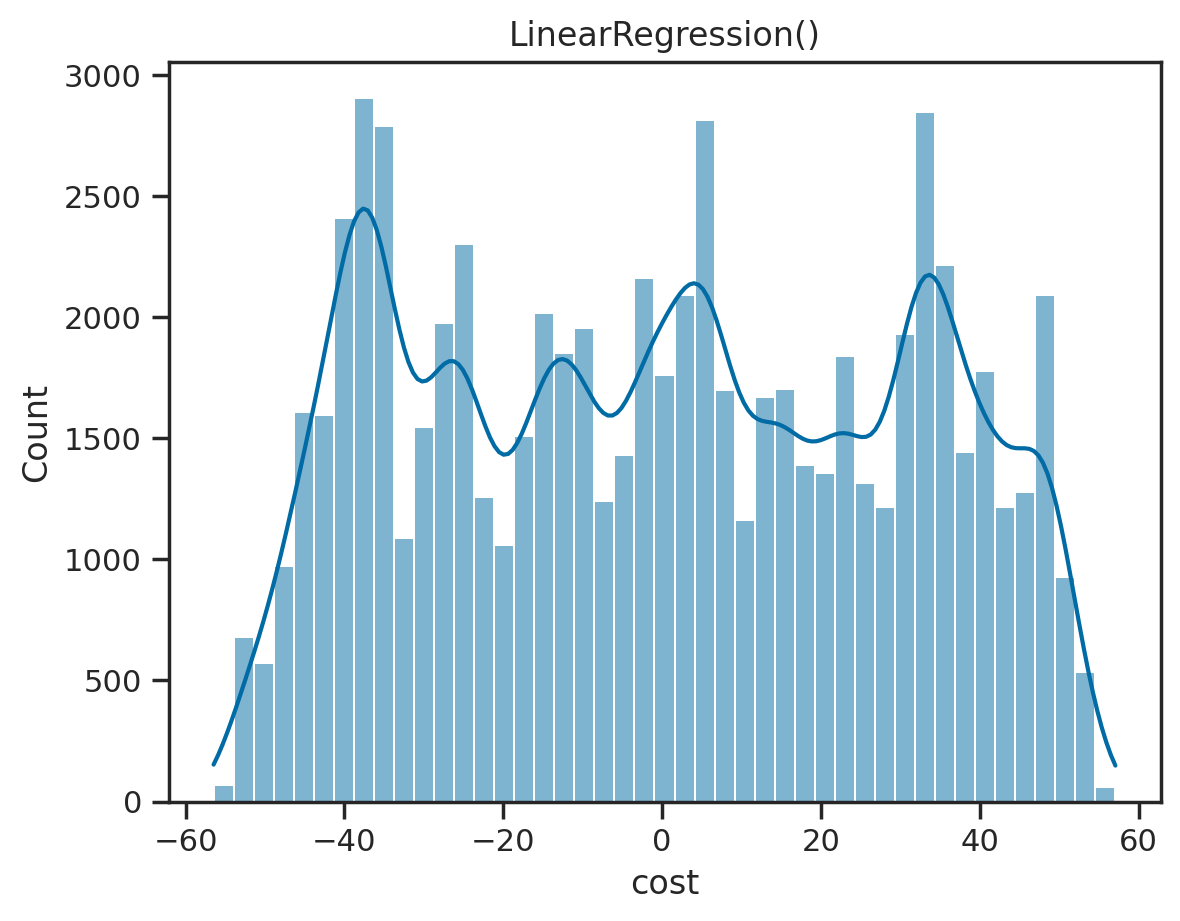

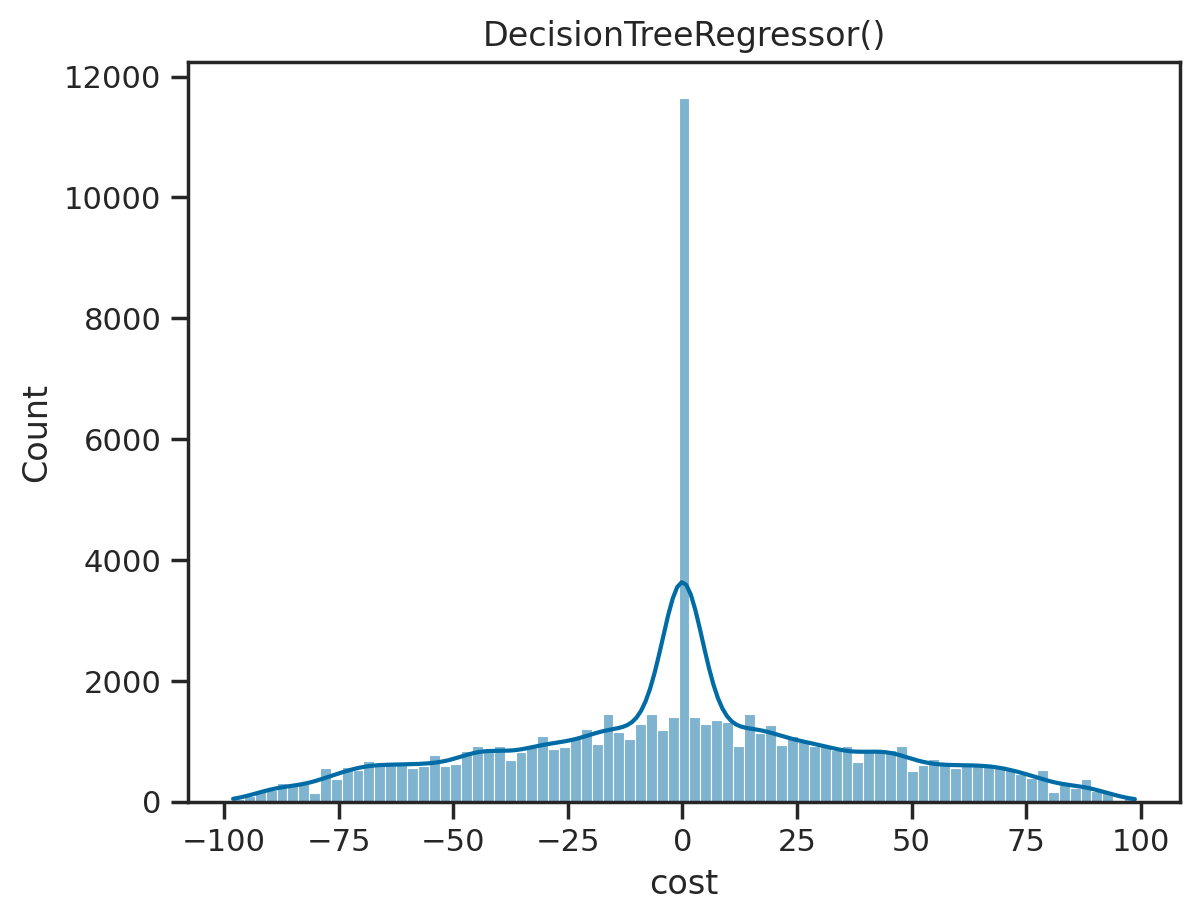

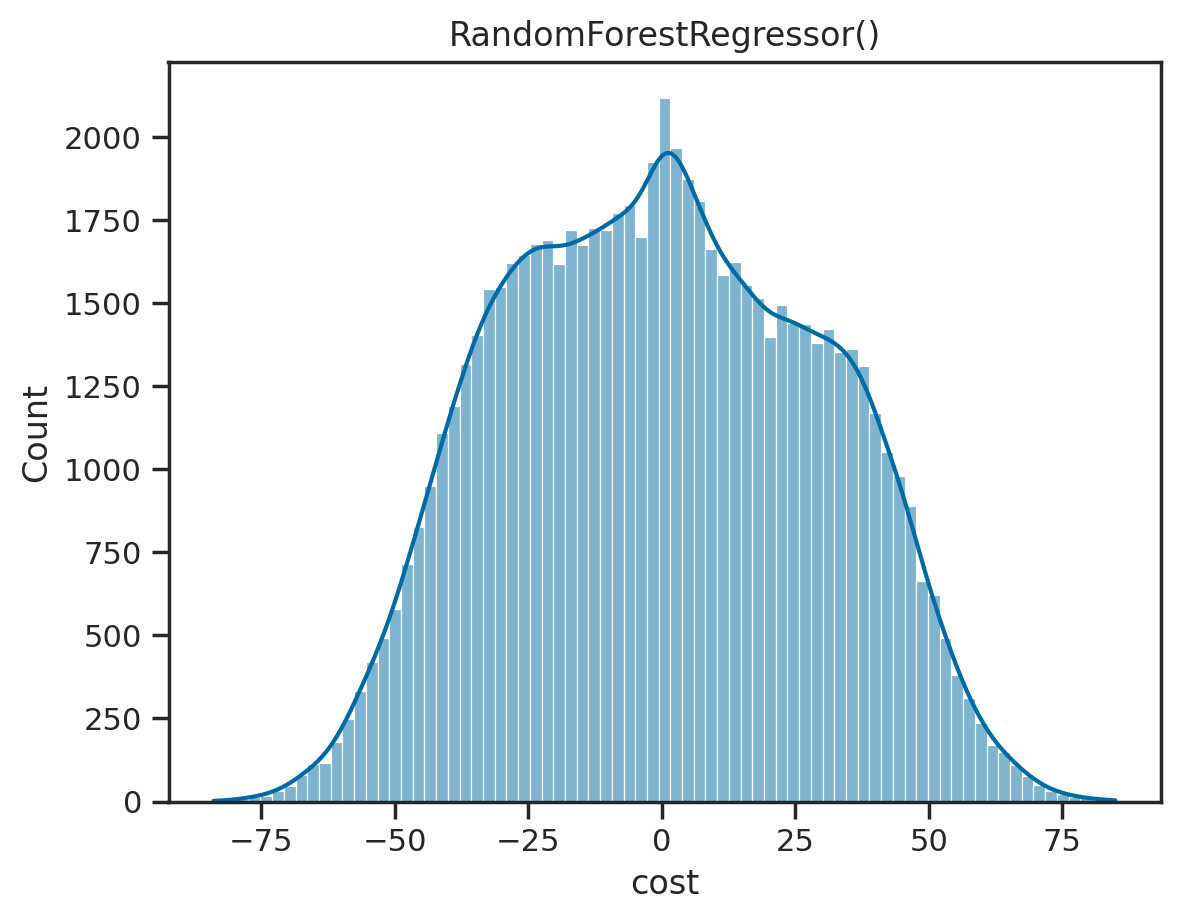

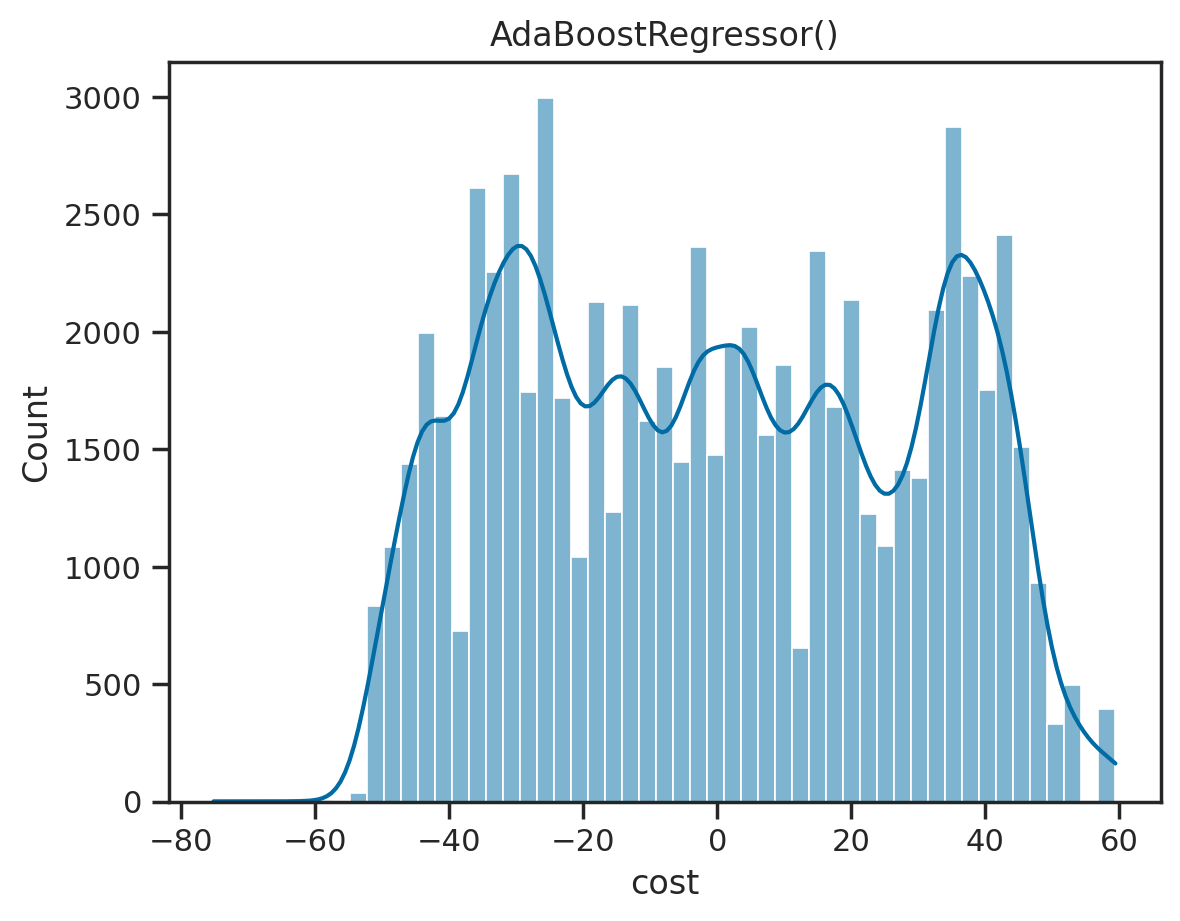

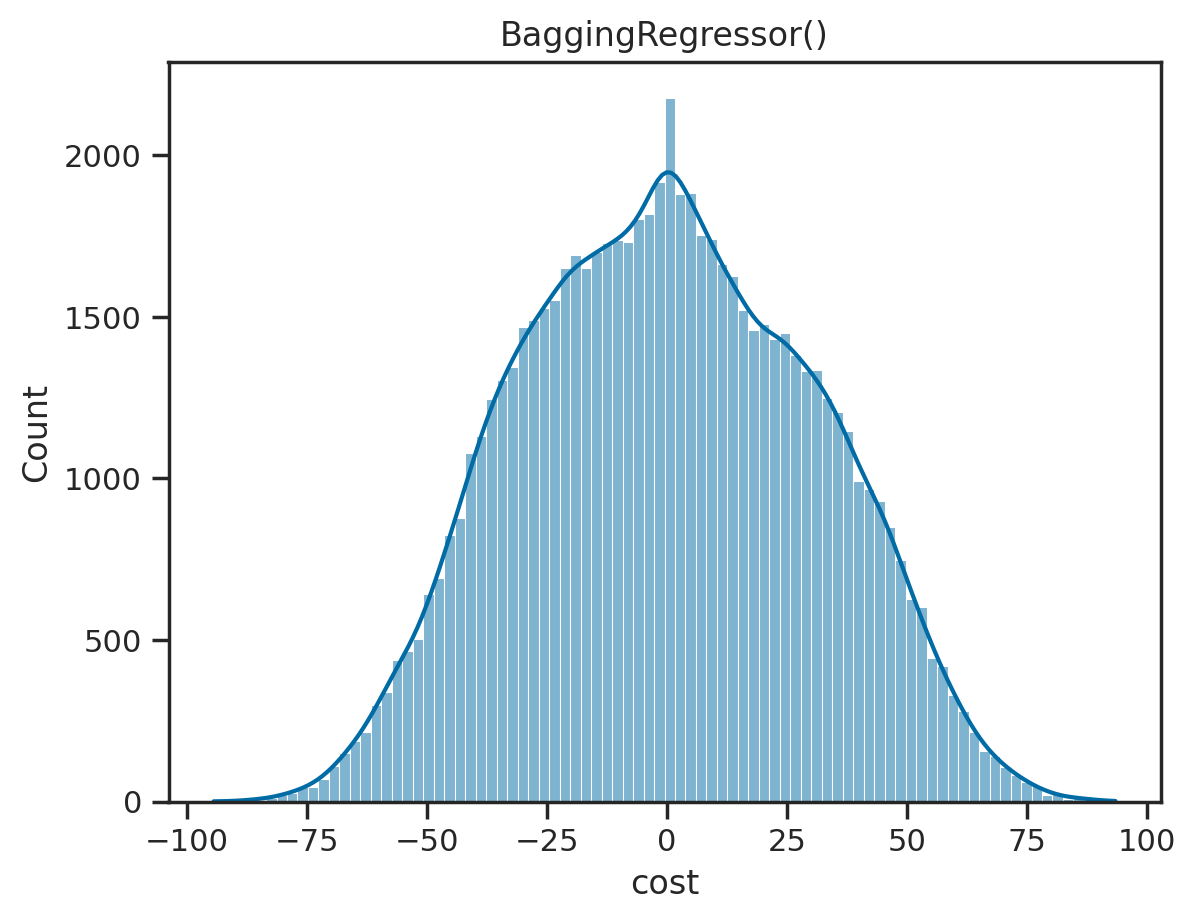

In [108]:
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['cost'], axis = 1), df_train['cost'], train_size=0.8)

def helper(model):
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.figure()
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(model)
    print("score(X_test, y_test) ", model.score(X_test, y_test))
    s = cross_val_score(estimator = model, X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 3)
    print("Average cv score ",np.mean(s))
    print("mean_squared_log_error ", mean_squared_log_error(y_test, y_pred, squared=False))
    print()

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
br = BaggingRegressor()
for i in [lr, tree, rf, ab, br]:
    helper(i)

In [110]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e11/test.csv')
df_sample = pd.read_csv('/kaggle/input/playground-series-s3e11/sample_submission.csv')
df_sample

id    cost
0       360336  99.615
1       360337  99.615
2       360338  99.615
3       360339  99.615
4       360340  99.615
...        ...     ...
240219  600555  99.615
240220  600556  99.615
240221  600557  99.615
240222  600558  99.615
240223  600559  99.615

[240224 rows x 2 columns]

In [112]:
submission = pd.DataFrame(
    {
        'id': df_test['id'],
        'cost': rf.predict(df_test.drop(['id', 'prepared_food'], axis = 1))
    }
)
submission

id      cost
0       360336  100.3642
1       360337   87.3633
2       360338   92.0579
3       360339  109.9516
4       360340   86.8442
...        ...       ...
240219  600555  105.9587
240220  600556   90.1122
240221  600557  103.5031
240222  600558  122.5065
240223  600559  128.2668

[240224 rows x 2 columns]

In [113]:
submission.to_csv('submission.csv', index=None)